In [23]:
import os
import pandas as pd
import time
from tqdm import tqdm
tqdm.pandas()
import json5 as json
import re

In [24]:
curr_path = '/Users/ritamupadhyay/Documents/Coral/table_gen'
os.chdir(curr_path)

In [25]:
table_path = os.path.join(curr_path,"data_commentaries/odi/odi_complete.csv")

In [26]:
df = pd.read_csv(table_path)

In [27]:
df.columns

Index(['commentaries', 'batsman_gnd_truth', 'bowler_gnd_truth', 'ref_table',
       'gemini_2_f_zscot', 'batsman_pred_gemini_2_f',
       'bowler_pred_gemini_2_f'],
      dtype='object')

In [28]:
df

,commentaries,batsman_gnd_truth,bowler_gnd_truth,ref_table,gemini_2_f_zscot,batsman_pred_gemini_2_f,bowler_pred_gemini_2_f
0,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to analyze the commentary and ...",NaN,NaN
1,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",NaN,NaN
2,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",NaN,NaN
3,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",NaN,NaN
4,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"```json\n{\n ""batsman"": [\n ""Tamim Iqbal"",...",NaN,NaN
...,...,...,...,...,...,...,...
1291,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,Here's the breakdown of the cricket commentary...,NaN,NaN
1292,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"```json\n{\n""batsman"": [""Tamim Iqbal"", ""Mohamm...",NaN,NaN
1293,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",NaN,NaN
1294,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to analyze the cricket comment...",NaN,NaN


In [29]:
"""df.rename(columns={'gemini_2_f':'gemini_2_f_zscot'},inplace=True)
df.drop(columns=['batsman_pred','bowler_pred'],inplace=True)
df.sample(5)"""

"df.rename(columns={'gemini_2_f':'gemini_2_f_zscot'},inplace=True)\ndf.drop(columns=['batsman_pred','bowler_pred'],inplace=True)\ndf.sample(5)"

In [30]:
# Your input string
input_text = """
[Paste your entire input string here]
"""
def get_json(input_text):
    # Use regex to extract JSON blocks
    json_blocks = re.findall(r'```json\n(.*?)```', input_text, re.DOTALL)

    # Convert each JSON block into a pandas DataFrame
    batsman_data = json.loads(json_blocks[0])
    bowler_data = json.loads(json_blocks[1])

    df_batsman = pd.DataFrame(batsman_data)
    df_bowler = pd.DataFrame(bowler_data)

    df_batsman['dismissals'] = df_batsman['dismissals'].fillna("not out")
    df_batsman.rename(columns={'dismissals':'dismissal'},inplace=True)

    # Display the DataFrames
    #print("Batsman Scorecard:")
    #print(df_batsman)
    #print("\nBowler Scorecard:")
    #print(df_bowler)
    return df_batsman, df_bowler

In [31]:
get_json(df.iloc[342]['gemini_2_f_zscot'])

(            batsman  Runs  Balls_Faced  Fours  Sixes     S/R  \
 0  Avishka Fernando    76           98      4      1   77.55   
 1           Bhanuka     7           17      1      0   41.17   
 2         Rajapaksa    65           56     12      0  116.07   
 3          Asalanka    24           28      3      0   85.71   
 4           Shanaka     0            1      0      0    0.00   
 5     Ramesh Mendis    14           23      1      0   60.86   
 6     C Karunaratne     3           10      0      0   30.00   
 7         Dananjaya     1            2      1      0   50.00   
 
               dismissal  
 0       c Shaw b Chahar  
 1  c Sakariya b Gowtham  
 2  c Gowtham b Sakariya  
 3          lbw b Pandya  
 4     c Pandey b Chahar  
 5                    NA  
 6   st †Samson b Chahar  
 7        c & b Sakariya  ,
      bowler  Balls  Runs_Given  Wickets  Overs  Maidens
 0     Saini     36          32        0    6.0        0
 1  Sakariya     42          39        3    7.0        

In [32]:
print(df.iloc[342]['gemini_2_f_zscot'])

Okay, I'm ready to process the cricket commentary and generate the requested JSON output. Here's the breakdown of my approach:

**1. Data Extraction:**

*   I'll meticulously scan the commentary, identifying each batsman's score, balls faced, boundaries (4s and 6s), and dismissal information (if any).
*   I'll also track each bowler's deliveries, runs conceded, wickets taken, and identify any maidens bowled.

**2. Calculation:**

*   I will calculate the strike rate for each batsman using the formula: (Runs / Balls Faced) \* 100.
*   Overs bowled will be derived from the balls bowled by each bowler (Balls / 6). This may result in floating-point numbers (e.g., 9.3 for 9 overs and 3 balls).

**3. JSON Formatting:**

*   I will then structure the extracted and calculated data into two JSON dictionaries, one for batsman stats and another for bowler stats, adhering to the exact format you provided.

```json
{
    "batsman": [
        "Avishka Fernando",
        "Bhanuka",
        "Rajapaksa

In [33]:
df.iloc[0]['batsman_gnd_truth'].replace('ground_truth_tables','pred_tables')

'data_commentaries/odi/pred_tables/Ball by Ball Commentary & Live Score - ZIM vs BAN, 2nd ODI_batsman_scorecard_5.csv'

In [34]:
df.isna().sum()

commentaries                  0
batsman_gnd_truth             0
bowler_gnd_truth              0
ref_table                     0
gemini_2_f_zscot              1
batsman_pred_gemini_2_f    1296
bowler_pred_gemini_2_f     1296
dtype: int64

In [35]:
def save_pred_batsman(x):
    if x['gemini_2_f_zscot'] is None:
        return None
    try:
        df,_ = get_json(x['gemini_2_f_zscot'])
    except:
        return None
    fl_name = x['batsman_gnd_truth'].replace('ground_truth_tables','pred_tables_gemini_2_f')
    f_path = os.path.join(curr_path,fl_name)
    df.to_csv(f_path,index=False)
    return fl_name

In [36]:
df['batsman_pred_gemini_2_f'] = df.progress_apply(lambda x: save_pred_batsman(x),axis=1)

100%|██████████| 1296/1296 [00:09<00:00, 136.32it/s]


In [37]:
df['batsman_pred_gemini_2_f'].isna().sum()

1

In [38]:
def save_pred_bowler(x):
    if x['gemini_2_f_zscot'] is None:
        return None
    try:
        _,df = get_json(x['gemini_2_f_zscot'])
    except:
        return None
    fl_name = x['bowler_gnd_truth'].replace('ground_truth_tables','pred_tables_gemini_2_f')
    f_path = os.path.join(curr_path,fl_name)
    df.to_csv(f_path,index=False)
    return fl_name

In [39]:
df['bowler_pred_gemini_2_f'] = df.progress_apply(lambda x: save_pred_bowler(x),axis=1)

100%|██████████| 1296/1296 [00:09<00:00, 135.55it/s]


In [40]:
df['bowler_pred_gemini_2_f'].isna().sum()

1

In [41]:
df.to_csv(table_path,index=False)

In [42]:
import pandas as pd
import numpy as np

def compute_rmse_and_er_general(df_true_path, df_pred_path, key_col: str) -> dict:
    """
    Computes RMSE and Error Rate between two DataFrames (e.g., batsman or bowler stats),
    penalizing missing rows/columns in the prediction.

    Parameters:
    - df_true (pd.DataFrame): The ground truth DataFrame.
    - df_pred (pd.DataFrame): The predicted DataFrame.
    - key_col (str): The column name to align the DataFrames on (e.g., 'batsman' or 'bowler').

    Returns:
    - dict: Dictionary with RMSE, Error Rate, and missing row/column stats.
    """
    if df_pred_path is None or df_true_path is None:
        return None

    df_true = pd.read_csv(df_true_path)
    df_pred = pd.read_csv(df_pred_path)

    results = {}

    # Set index using key column
    df_true = df_true.set_index(key_col)
    df_pred = df_pred.set_index(key_col)

    # Track missing rows
    missing_rows = list(set(df_true.index) - set(df_pred.index))
    if missing_rows:
        # Add missing rows to df_pred with zeros
        missing_df = pd.DataFrame(0, index=missing_rows, columns=df_pred.columns)
        df_pred = pd.concat([df_pred, missing_df])

    # Align both DataFrames to df_true index
    df_pred = df_pred.reindex(df_true.index)

    # Add missing columns to df_pred with zeros
    for col in df_true.columns:
        if col not in df_pred.columns:
            df_pred[col] = 0  # zero prediction means a total miss

    # Ensure both have the same column order
    df_pred = df_pred[df_true.columns]

    # Convert all to numeric just in case
    df_true = df_true.apply(pd.to_numeric, errors='coerce')
    df_pred = df_pred.apply(pd.to_numeric, errors='coerce')

    # Compute RMSE
    mse = ((df_true - df_pred) ** 2).mean().mean()
    rmse = np.sqrt(mse)

    # Compute Error Rate (percentage of mismatched cells)
    total_cells = df_true.size
    mismatches = (df_true != df_pred).sum().sum()
    error_rate = (mismatches / total_cells) * 100

    results['RMSE'] = round(rmse, 4)
    results['Error Rate (%)'] = round(error_rate, 2)
    results['Missing Rows'] = len(missing_rows)
    results['Missing Columns'] = len(set(df_true.columns) - set(df_pred.columns))

    return results


In [43]:
compute_rmse_and_er_general(df.iloc[2]['batsman_gnd_truth'],df.iloc[2]['batsman_pred_gemini_2_f'],'batsman')

{'RMSE': 14.3292,
 'Error Rate (%)': 53.33,
 'Missing Rows': 1,
 'Missing Columns': 0}

In [44]:
pd.read_csv(df.iloc[2]['batsman_gnd_truth'])

,batsman,Runs,Balls_Faced,Fours,Sixes,S/R,dismissal
0,Litton Das,21.0,33,4,0,63.64,c Taylor b Ngarava
1,Mithun,2.0,3,0,0,66.67,c Madhevere b Jongwe
2,Mosaddek,1.0,4,0,0,25.00,Not Out
3,Shakib,6.0,16,0,0,37.50,Not Out
4,Tamim,20.0,34,4,0,58.82,c Sikandar Raza b Jongwe


In [45]:
pd.read_csv(df.iloc[2]['batsman_pred_gemini_2_f'])

,batsman,Runs,Balls_Faced,Fours,Sixes,S/R,dismissal
0,Tamim Iqbal,20,34,4,0,58.82,c Sikandar Raza b Jongwe
1,Litton Das,21,33,4,0,63.63,c Taylor b Ngarava
2,Shakib,3,9,0,0,33.33,not out
3,Mithun,2,3,0,0,66.66,c Madhevere b Jongwe
4,Mosaddek,1,5,0,0,20.00,not out


In [ ]:
## TODO:
dismissal_match, 

In [51]:
def classify_dismissal(val):
    if pd.isna(val):
        return np.nan
    return 0 if 'not out' in str(val).lower().strip() else 1

def evaluate_dismissal_classification(merged):
    # Classify dismissals
    merged['dismissal_gt_class'] = merged['dismissal_gt'].apply(classify_dismissal)
    merged['dismissal_pred_class'] = merged['dismissal_pred'].apply(classify_dismissal)

    # Filter valid rows
    valid = merged['dismissal_gt_class'].notna() & merged['dismissal_pred_class'].notna()
    merged_valid = merged[valid].copy()

    # Initialize counters
    tp_0 = fp_0 = fn_0 = tp_1 = fp_1 = fn_1 = 0

    for _, row in merged_valid.iterrows():
        gt_class = row['dismissal_gt_class']
        pred_class = row['dismissal_pred_class']
        gt_val = str(row['dismissal_gt']).lower().strip()
        pred_val = str(row['dismissal_pred']).lower().strip()

        if gt_class == 0:  # Not Out
            if pred_class == 0:
                tp_0 += 1  # correct not out
            else:
                fn_0 += 1  # predicted dismissed, actually not out
                fp_1 += 1
        elif gt_class == 1:  # Dismissed
            if gt_val in pred_val:
                tp_1 += 1  # correct dismissal (match by containment)
            else:
                fn_1 += 1  # missed dismissal
                fp_0 += 1

    # Compute metrics for each class
    def compute_metrics(tp, fp, fn):
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        accuracy = tp / (tp + fp + fn) if tp + fp + fn > 0 else 0
        return {'precision': precision, 'recall': recall, 'accuracy': accuracy}

    return {
        'not_out_metrics': compute_metrics(tp_0, fp_0, fn_0),
        'dismissed_metrics': compute_metrics(tp_1, fp_1, fn_1),
        'support': len(merged_valid)
    }


In [223]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import difflib

def normalize_name(name):
    """Lowercase, remove common suffixes, and strip whitespace."""
    name = name.lower()
    return ' '.join(name.strip().split())

def tokenize_name(name):
    """Convert a name string into a set of meaningful lowercase tokens."""
    return set(normalize_name(name).split())

def best_match(name, candidates):
    """Find the best matching name from candidates using token overlap, then fallback to difflib."""
    name_tokens = tokenize_name(name)
    candidates_tokens = {candidate: tokenize_name(candidate) for candidate in candidates}
    # Try matching by token overlap
    best = None
    max_overlap = 0
    for candidate, tokens in candidates_tokens.items():
        overlap = len(name_tokens & tokens)
        if overlap > max_overlap:
            best = candidate
            max_overlap = overlap
    
    # If no token overlap, fallback to difflib
    if not best or max_overlap == 0:
        matches = difflib.get_close_matches(normalize_name(name), [normalize_name(c) for c in candidates], n=1, cutoff=0.6)
        best = matches[0] if matches else None
    
    return best

"""def best_match(name, candidates):
    matches = difflib.get_close_matches(name, candidates, n=1, cutoff=0.4)
    return matches[0] if matches else None"""

def compare_scorecards(gt_df_loc, pred_df_loc, id_col='batsman', numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = ['Runs', 'Balls_Faced', 'Fours', 'Sixes', 'S/R']

    if pred_df_loc is None:
        return None

    # Normalize names
    gt_df = pd.read_csv(gt_df_loc)
    pred_df = pd.read_csv(pred_df_loc)
    

    pred_df.rename(columns={'S_R':'S/R'},inplace=True)
    pred_df.replace(['',' '],np.nan,inplace=True)
    #print(pred_df)


    gt_df['name_norm'] = gt_df[id_col].apply(normalize_name)
    pred_df['name_norm'] = pred_df[id_col].apply(normalize_name)

    # Fuzzy match predicted names to ground truth
    pred_df['matched_name'] = pred_df['name_norm'].apply(
        lambda name: best_match(name, gt_df['name_norm'].tolist())
    )
    pred_matched = pred_df.dropna(subset=['matched_name'])

    # Merge
    merged = pd.merge(
        gt_df, pred_matched,
        left_on='name_norm', right_on='matched_name',
        suffixes=('_gt', '_pred')
    )
    dismissal_metrics = evaluate_dismissal_classification(merged)

    for col in numeric_cols:
        merged[f"{col}_gt"] = pd.to_numeric(merged[f"{col}_gt"], errors='coerce')
        merged[f"{col}_pred"] = pd.to_numeric(merged[f"{col}_pred"], errors='coerce')

    # Mark missing predicted values
    nan_rate_per_column = {}
    for col in numeric_cols:
        pred_col = f"{col}_pred"
        merged[f"{pred_col}_missing"] = merged[pred_col].isna()
        nan_rate_per_column[col] = merged[f"{pred_col}_missing"].mean()

    # RMSE (NaN-safe)
    rmse_results = {}
    perc_results = {}
    for col in numeric_cols:
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        rmse_results[col] = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid])) if valid.any() else np.nan
        valid_vals = valid & (gt_vals != 0)
        if valid_vals.any():
            perc_results[col] = mean_absolute_percentage_error(gt_vals[valid_vals], pred_vals[valid_vals]) * 100
        else:
            perc_results[col] = np.nan


    dismissal = evaluate_dismissal_classification(merged)
    

    # Error rate (NaN-safe)
    col_error_rates = {}
    for col in numeric_cols:
        tolerance = 0.1 if col == 'S/R' else 0.01
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        if valid.any():
            mismatches = ~np.isclose(gt_vals[valid], pred_vals[valid], atol=tolerance)
            col_error_rates[col] = mismatches.mean()
        else:
            col_error_rates[col] = np.nan

    # Row-wise error
    def row_error(row):
        mismatches = 0
        valid_fields = 0
        for col in numeric_cols:
            val_gt = row[f"{col}_gt"]
            val_pred = row[f"{col}_pred"]
            if pd.notna(val_pred) and pd.notna(val_gt):
                tolerance = 0.1 if col == 'S/R' else 0.01
                if not np.isclose(val_gt, val_pred, atol=tolerance):
                    mismatches += 1
                valid_fields += 1
        return mismatches / valid_fields if valid_fields > 0 else np.nan

    # Assign dismissal class
    merged['dismissal_gt_class'] = merged['dismissal_gt'].apply(
        lambda val: 0 if isinstance(val, str) and 'not out' in val.lower().strip() else 1
    )
    merged['row_error'] = merged.apply(row_error, axis=1)
    # Row error by class
    row_error_not_out = merged.loc[merged['dismissal_gt_class'] == 0, 'row_error'].mean()
    row_error_dismissed = merged.loc[merged['dismissal_gt_class'] == 1, 'row_error'].mean()

    #avg_row_error = merged['row_error'].mean()

    # Player match stats
    gt_names = set(gt_df['name_norm'])
    matched_names = set(pred_matched['matched_name'])
    pred_names_all = set(pred_df['name_norm'])

    missing_players = list(gt_names - matched_names)
    extra_players = list(pred_names_all - matched_names)

    # Build final table
    output_columns = (
        [f"{id_col}_gt", f"{id_col}_pred"] +
        [f"{col}_gt" for col in numeric_cols] +
        [f"{col}_pred" for col in numeric_cols] +
        [f"{col}_pred_missing" for col in numeric_cols] +
        ['row_error']
    )

    return {
        'rmse_per_column': rmse_results,
        'percentage_error': perc_results,
        'dismissal_results_not_out':dismissal['not_out_metrics'],
        'dismissal_results_out':dismissal['dismissed_metrics'],
        'error_rate_per_column': col_error_rates,
        'nan_rate_per_column': nan_rate_per_column,
        'row_error_not_out': row_error_not_out,
        'row_error_out': row_error_dismissed,
        'missing_players_in_pred': missing_players,
        'extra_players_in_pred': extra_players,
        'matched_df': merged[output_columns]
    }

In [392]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from difflib import SequenceMatcher
from scipy.optimize import linear_sum_assignment

from difflib import SequenceMatcher
from scipy.optimize import linear_sum_assignment

def name_similarity_token_overlap(gt_name, pred_name):
    gt_tokens = set(normalize_name(gt_name).split())
    pred_tokens = set(normalize_name(pred_name).split())
    token_overlap = len(gt_tokens & pred_tokens) / max(len(gt_tokens | pred_tokens), 1)
    fuzzy_sim = SequenceMatcher(None, gt_name.lower(), pred_name.lower()).ratio()
    return 0.6 * token_overlap + 0.4 * fuzzy_sim  # weighted score


def normalize_name(name):
    """Lowercase and strip whitespace."""
    name = name.lower()
    return ' '.join(name.strip().split())

def name_similarity(a, b):
    return SequenceMatcher(None, a.lower(), b.lower()).ratio()

def generate_name_alignment(gt_names, pred_names):
    sim_matrix = np.zeros((len(gt_names), len(pred_names)))
    for i, gt in enumerate(gt_names):
        for j, pred in enumerate(pred_names):
            sim_matrix[i, j] = name_similarity_token_overlap(gt, pred)

    gt_idx = [x for x in range(len(sim_matrix))]
    pred_idx = [x for x in range(len(sim_matrix))]
    for c,r in enumerate(sim_matrix):
        #print(max(sim_matrix[c]))
        pred_idx[c] = [np.argmax(sim_matrix[c]), max(sim_matrix[c])]

    matches = []
    for i,j in zip(gt_idx, pred_idx):
        if j[1]>=0.4:
            matches.append((gt_names[i],pred_names[j[0]]))

    """cost_matrix = 1 - sim_matrix
    #gt_idx, pred_idx = linear_sum_assignment(cost_matrix)
    gt_idx, pred_idx = linear_sum_assignment(sim_matrix)
    print(sim_matrix)

    # Return matched DataFrame directly (ground_truth, predicted)
    print(linear_sum_assignment(cost_matrix))"""
    #matches = [(gt_names[i], pred_names[j]) for i, j in zip(gt_idx, pred_idx)]
    return matches


def evaluate_dismissal_classification(merged):
    merged['dismissal_gt_class'] = merged['dismissal_gt'].apply(
        lambda val: 0 if isinstance(val, str) and 'not out' in val.lower().strip() else 1
    )
    merged['dismissal_pred_class'] = merged['dismissal_pred'].apply(
        lambda val: 0 if isinstance(val, str) and 'not out' in val.lower().strip() else 1
    )

    tp_0 = fp_0 = fn_0 = tp_1 = fp_1 = fn_1 = 0

    for _, row in merged.iterrows():
        gt_class = row['dismissal_gt_class']
        pred_class = row['dismissal_pred_class']
        gt_val = str(row['dismissal_gt']).lower().strip()
        pred_val = str(row['dismissal_pred']).lower().strip()

        if gt_class == 0:
            if pred_class == 0:
                tp_0 += 1
            else:
                fn_0 += 1
                fp_1 += 1
        elif gt_class == 1:
            if gt_val in pred_val:
                tp_1 += 1
            else:
                fn_1 += 1
                fp_0 += 1

    def compute_metrics(tp, fp, fn):
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        accuracy = tp / (tp + fp + fn) if tp + fp + fn > 0 else 0
        return {'precision': precision, 'recall': recall, 'accuracy': accuracy}

    return {
        'not_out_metrics': compute_metrics(tp_0, fp_0, fn_0),
        'dismissed_metrics': compute_metrics(tp_1, fp_1, fn_1)
    }


def compare_scorecards(gt_df_loc, pred_df_loc, id_col='batsman', numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = ['Runs', 'Balls_Faced', 'Fours', 'Sixes', 'S/R']
    if pred_df_loc is None:
        return None

    gt_df = pd.read_csv(gt_df_loc).copy()
    pred_df = pd.read_csv(pred_df_loc).copy()
    pred_df.rename(columns={'S_R': 'S/R'}, inplace=True)
    pred_df.replace(['', ' '], np.nan, inplace=True)
    gt_df = gt_df.drop_duplicates('batsman')

    # Step 2: Generate optimal one-to-one alignment
    gt_names = gt_df[id_col].tolist()
    pred_names = pred_df[id_col].tolist()
    matches = generate_name_alignment(gt_names, pred_names)  # List of (gt, pred)

    #print(matches)

    # Step 3: Build aligned DataFrames directly from matched names
    aligned_gt = []
    aligned_pred = []
    for gt_name, pred_name in matches:
        gt_row = gt_df[gt_df[id_col] == gt_name]
        pred_row = pred_df[pred_df[id_col] == pred_name]

        if not gt_row.empty and not pred_row.empty:
            gt_row = gt_row.copy()
            pred_row = pred_row.copy()
            gt_row['matched_gt'] = gt_name
            pred_row['matched_pred'] = pred_name
            aligned_gt.append(gt_row)
            aligned_pred.append(pred_row)

    # Step 4: Concatenate and reset index
    gt_aligned_df = pd.concat(aligned_gt).reset_index(drop=True)
    pred_aligned_df = pd.concat(aligned_pred).reset_index(drop=True)

    # Step 5: Final aligned merge using position, not names
    merged = pd.concat([gt_aligned_df.add_suffix('_gt'), pred_aligned_df.add_suffix('_pred')], axis=1)
    # Normalize dismissals
    dismissal_metrics = evaluate_dismissal_classification(merged)

    # Numeric conversion
    for col in numeric_cols:
        merged[f"{col}_gt"] = pd.to_numeric(merged[f"{col}_gt"], errors='coerce')
        merged[f"{col}_pred"] = pd.to_numeric(merged[f"{col}_pred"], errors='coerce')

    # NaN tracking
    nan_rate_per_column = {}
    for col in numeric_cols:
        merged[f"{col}_pred_missing"] = merged[f"{col}_pred"].isna()
        nan_rate_per_column[col] = merged[f"{col}_pred_missing"].mean()

    # RMSE + MAPE
    rmse_results = {}
    perc_results = {}
    for col in numeric_cols:
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        rmse_results[col] = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid])) if valid.any() else np.nan
        valid_vals = valid & (gt_vals != 0)
        perc_results[col] = mean_absolute_percentage_error(gt_vals[valid_vals], pred_vals[valid_vals]) * 100 if valid_vals.any() else np.nan

    # Error rate per column
    col_error_rates = {}
    for col in numeric_cols:
        tolerance = 0.1 if col == 'S/R' else 0.01
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        col_error_rates[col] = (~np.isclose(gt_vals[valid], pred_vals[valid], atol=tolerance)).mean() if valid.any() else np.nan

    # Row-wise error
    def row_error(row):
        mismatches = 0
        valid_fields = 0
        for col in numeric_cols:
            val_gt = row[f"{col}_gt"]
            val_pred = row[f"{col}_pred"]
            if pd.notna(val_gt) and pd.notna(val_pred):
                if col in exact_match_cols:
                    if val_gt != val_pred:
                        mismatches += 1
                else:
                    tolerance = 0.1 if col == 'S/R' else 0.01
                    if not np.isclose(val_gt, val_pred, atol=tolerance):
                        mismatches += 1
                valid_fields += 1
        return mismatches / valid_fields if valid_fields > 0 else np.nan

    """merged['dismissal_gt_class'] = merged['dismissal_gt'].apply(
        lambda val: 0 if isinstance(val, str) and 'not out' in val.lower().strip() else 1
    )"""
    merged['row_error'] = merged.apply(row_error, axis=1)
    row_error_not_out = merged.loc[merged['dismissal_gt_class'] == 0, 'row_error'].mean()
    row_error_dismissed = merged.loc[merged['dismissal_gt_class'] == 1, 'row_error'].mean()

    # Match stats
    missing_players = list(set(gt_df[id_col]) - set(pred_df[id_col]))
    extra_players = list(set(pred_df[id_col]) - set(gt_df[id_col]))

    output_columns = (
        [f"{id_col}_gt", f"{id_col}_pred"] +
        [f"{col}_gt" for col in numeric_cols] +
        [f"{col}_pred" for col in numeric_cols] +
        [f"{col}_pred_missing" for col in numeric_cols] +
        ['row_error']
    )

    return {
        'rmse_per_column': rmse_results,
        'percentage_error': perc_results,
        'dismissal_results_not_out': dismissal_metrics['not_out_metrics'],
        'dismissal_results_out': dismissal_metrics['dismissed_metrics'],
        'error_rate_per_column': col_error_rates,
        'nan_rate_per_column': nan_rate_per_column,
        'row_error': merged['row_error'].mean(),
        'missing_players_in_pred': missing_players,
        'extra_players_in_pred': extra_players,
        'matched_df': merged[output_columns]
    }


In [393]:
compare_scorecards(df.iloc[192]['batsman_gnd_truth'],df.iloc[192]['batsman_pred_gemini_2_f'])

{'rmse_per_column': {'Runs': 11.313708498984761,
  'Balls_Faced': 5.303300858899107,
  'Fours': 2.1213203435596424,
  'Sixes': 0.0,
  'S/R': 14.074960479518229},
 'percentage_error': {'Runs': 8.16326530612245,
  'Balls_Faced': 6.944444444444445,
  'Fours': 16.666666666666664,
  'Sixes': 0.0,
  'S/R': 2.7420376901035928},
 'dismissal_results_not_out': {'precision': 1.0,
  'recall': 1.0,
  'accuracy': 1.0},
 'dismissal_results_out': {'precision': 1.0, 'recall': 1.0, 'accuracy': 1.0},
 'error_rate_per_column': {'Runs': 0.125,
  'Balls_Faced': 0.125,
  'Fours': 0.125,
  'Sixes': 0.0,
  'S/R': 0.125},
 'nan_rate_per_column': {'Runs': 0.0,
  'Balls_Faced': 0.0,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.0},
 'row_error': 0.1,
 'missing_players_in_pred': ['Mitchell',
  'Santner',
  'Williamson',
  'Ravindra',
  'Phillips',
  'Latham',
  'Young'],
 'extra_players_in_pred': ['Daryl Mitchell',
  'Kane Williamson',
  'Mitchell Santner',
  'Tom Latham',
  'Rachin Ravindra',
  'Glenn Phillips',
  '

In [394]:
print(df.iloc[100]['commentaries'])

 Markram to Imam-ul-Haq, no run  tossed up on a length outside off, comes forward to defend to cover
 Markram to Imam-ul-Haq, no run  gets some turn first up does Markram. Length ball on middle, Imam goes back and  across to defend
 Markram to Imam-ul-Haq, no run  fuller, fired in on off, defended back to the bowler
 Markram to Imam-ul-Haq, no run  nicely tossed up. Great loop by Markram on that one, brings Iman on the front foot to  defend solidly
 Markram to Imam-ul-Haq, 1 run  length ball, he goes right back and flicks it off his pads through square leg
 Markram to Zaman, no run  tossed up very full, dips on him, ends up as a yorker almost, dug back out to the bowler  great first over from Markram. Got some pleasing loop going there too, and found some  turn. 
 Hendricks to Imam-ul-Haq, 1 run  full, tailing into him, clipped between mid-on and midwicket
 Hendricks to Zaman, no run  back of a length in the channel, he shoulders arms to it
 Hendricks to Zaman, no run  length ball nipp

In [395]:
mapping = {' ':np.nan}
pd.read_csv(df.iloc[192]['batsman_pred_gemini_2_f']).applymap(lambda x: mapping.get(x) if x in mapping else x)

/var/folders/m9/hmk3frsn52x_p8njd0pzf5hr0000gn/T/ipykernel_47025/2411595580.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pd.read_csv(df.iloc[192]['batsman_pred_gemini_2_f']).applymap(lambda x: mapping.get(x) if x in mapping else x)


,batsman,Runs,Balls_Faced,Fours,Sixes,S/R,dismissal
0,Will Young,21,23,3,0,91.30,c Markram b Ngidi
1,Rachin Ravindra,108,101,13,1,106.93,c †Klaasen b Rabada
2,Kane Williamson,102,94,10,2,108.51,c Ngidi b Mulder
3,Daryl Mitchell,49,37,4,1,132.43,c Rabada b Ngidi
4,Tom Latham,4,5,0,0,80.00,b Rabada
5,Glenn Phillips,17,12,0,1,141.67,Not out
6,Michael Bracewell,16,12,2,0,133.33,c Rickelton b Ngidi
7,Mitchell Santner,2,1,0,0,200.00,Not out


In [396]:
pd.read_csv(df.iloc[192]['batsman_gnd_truth'])

,batsman,Runs,Balls_Faced,Fours,Sixes,S/R,dismissal
0,Latham,4.0,5,0,0,80.00,b Rabada
1,Michael Bracewell,16.0,12,2,0,133.33,c Rickelton b Ngidi
2,Mitchell,49.0,37,4,1,132.43,c Rabada b Ngidi
3,Phillips,49.0,27,6,1,181.48,Not Out
4,Ravindra,108.0,101,13,1,106.93,c †Klaasen b Rabada
5,Santner,2.0,1,0,0,200.00,Not Out
6,Williamson,102.0,94,10,2,108.51,c Ngidi b Mulder
7,Young,21.0,23,3,0,91.30,c Markram b Ngidi


In [397]:
df['batsman_error_gemini_2_f'] = df.progress_apply(lambda x: compare_scorecards(x['batsman_gnd_truth'],x['batsman_pred_gemini_2_f']),axis=1)

100%|██████████| 1296/1296 [00:11<00:00, 114.07it/s]


In [398]:
pd.read_csv(df.iloc[63]['bowler_gnd_truth'])

,bowler,Balls,Runs_Given,Wickets,Overs,Maidens
0,Mehidy Hasan Miraz,60,37.0,0,10.0,0
1,Mustafizur,54,62.0,1,9.0,0
2,Rishad Hossain,60,38.0,2,10.0,0
3,Tanzim Hasan Sakib,51,58.0,0,8.3,0
4,Taskin,54,36.0,1,9.0,0


In [399]:
pd.read_csv(df.iloc[63]['bowler_pred_gemini_2_f'])

,bowler,Balls,Runs_Given,Wickets,Overs,Maidens
0,Taskin Ahmed,72,43,1,12.0,1
1,Mustafizur Rahman,60,41,1,10.0,0
2,Tanzim Hasan Sakib,66,32,0,11.0,0
3,Mehidy Hasan Miraz,60,39,0,10.0,0
4,Rishad Hossain,60,38,2,10.0,0


In [400]:
def compare_scorecards_bolwer(gt_df_loc, pred_df_loc, id_col='bowler', numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = ['Balls', 'Runs_Given', 'Wickets']

    if pred_df_loc is None:
        return None

    # Normalize names
    gt_df = pd.read_csv(gt_df_loc)
    pred_df = pd.read_csv(pred_df_loc)
    

    pred_df.rename(columns={'S_R':'S/R'},inplace=True)
    pred_df.replace(['',' '],np.nan,inplace=True)
    #print(pred_df)


    gt_df['name_norm'] = gt_df[id_col].apply(normalize_name)
    pred_df['name_norm'] = pred_df[id_col].apply(normalize_name)

    # Fuzzy match predicted names to ground truth
    pred_df['matched_name'] = pred_df['name_norm'].apply(
        lambda name: best_match(name, gt_df['name_norm'].tolist())
    )
    pred_matched = pred_df.dropna(subset=['matched_name'])

    # Merge
    merged = pd.merge(
        gt_df, pred_matched,
        left_on='name_norm', right_on='matched_name',
        suffixes=('_gt', '_pred')
    )

    for col in numeric_cols:
        merged[f"{col}_gt"] = pd.to_numeric(merged[f"{col}_gt"], errors='coerce')
        merged[f"{col}_pred"] = pd.to_numeric(merged[f"{col}_pred"], errors='coerce')

    # Mark missing predicted values
    nan_rate_per_column = {}
    for col in numeric_cols:
        pred_col = f"{col}_pred"
        merged[f"{pred_col}_missing"] = merged[pred_col].isna()
        nan_rate_per_column[col] = merged[f"{pred_col}_missing"].mean()

    # RMSE (NaN-safe)
    rmse_results = {}
    perc_results = {}
    for col in numeric_cols:
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        rmse_results[col] = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid])) if valid.any() else np.nan
        valid_vals = valid & (gt_vals != 0)
        if valid_vals.any():
            perc_results[col] = mean_absolute_percentage_error(gt_vals[valid_vals], pred_vals[valid_vals]) * 100
        else:
            perc_results[col] = np.nan

    # Group-wise RMSE for Wickets
    wicket_rmse_split = {}

    for condition, label in [
        (merged['Wickets_gt'] == 0, 'wickets_0'),
        (merged['Wickets_gt'] > 0, 'wickets_gt_0'),
    ]:
        gt_vals = merged.loc[condition, 'Wickets_gt']
        pred_vals = merged.loc[condition, 'Wickets_pred']
        valid = gt_vals.notna() & pred_vals.notna()
        if valid.any():
            rmse = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid]))
        else:
            rmse = np.nan
        wicket_rmse_split[label] = rmse



    # Error rate (NaN-safe)
    col_error_rates = {}
    for col in numeric_cols:
        tolerance = 0.1 if col == 'S/R' else 0.01
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        if valid.any():
            mismatches = ~np.isclose(gt_vals[valid], pred_vals[valid], atol=tolerance)
            col_error_rates[col] = mismatches.mean()
        else:
            col_error_rates[col] = np.nan

    # Row-wise error
    def row_error(row):
        mismatches = 0
        valid_fields = 0
        for col in numeric_cols:
            val_gt = row[f"{col}_gt"]
            val_pred = row[f"{col}_pred"]
            if pd.notna(val_pred) and pd.notna(val_gt):
                tolerance = 0.1 if col == 'S/R' else 0.01
                if not np.isclose(val_gt, val_pred, atol=tolerance):
                    mismatches += 1
                valid_fields += 1
        return mismatches / valid_fields if valid_fields > 0 else np.nan

    merged['row_error'] = merged.apply(row_error, axis=1)
    avg_row_error = merged['row_error'].mean()

    # Group-wise RMSE for Maidens
    maiden_rmse_split = {}

    for condition, label in [
        (merged['Maidens_gt'] == 0, 'maiden_0'),
        (merged['Maidens_gt'] == 1, 'maiden_1'),
        (merged['Maidens_gt'] > 1, 'maiden_gt_1'),
    ]:
        gt_vals = merged.loc[condition, 'Maidens_gt']
        pred_vals = merged.loc[condition, 'Maidens_pred']
        valid = gt_vals.notna() & pred_vals.notna()
        if valid.any():
            rmse = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid]))
        else:
            rmse = np.nan
        maiden_rmse_split[label] = rmse
    #print(maiden_rmse_split)


    # Player match stats
    gt_names = set(gt_df['name_norm'])
    matched_names = set(pred_matched['matched_name'])
    pred_names_all = set(pred_df['name_norm'])

    missing_players = list(gt_names - matched_names)
    extra_players = list(pred_names_all - matched_names)

    # Build final table
    output_columns = (
        [f"{id_col}_gt", f"{id_col}_pred"] +
        [f"{col}_gt" for col in numeric_cols] +
        [f"{col}_pred" for col in numeric_cols] +
        [f"{col}_pred_missing" for col in numeric_cols] +
        ['row_error']
    )

    return {
        'rmse_per_column': rmse_results,
        'maiden_rmse':maiden_rmse_split,
        'wicket_rmse_split':wicket_rmse_split,
        'percentage_error': perc_results,
        'error_rate_per_column': col_error_rates,
        'nan_rate_per_column': nan_rate_per_column,
        'avg_row_error_rate': avg_row_error,
        'missing_players_in_pred': missing_players,
        'extra_players_in_pred': extra_players,
        'matched_df': merged[output_columns]
    }

In [401]:
compare_scorecards_bolwer(df.iloc[1098]['bowler_gnd_truth'],df.iloc[1098]['bowler_pred_gemini_2_f'])

{'rmse_per_column': {'Balls': 9.16515138991168,
  'Runs_Given': 12.754084313139327,
  'Wickets': 0.408248290463863},
 'maiden_rmse': {'maiden_0': 0.0, 'maiden_1': 0.0, 'maiden_gt_1': nan},
 'wicket_rmse_split': {'wickets_0': 0.0, 'wickets_gt_0': 0.5},
 'percentage_error': {'Balls': 30.555555555555557,
  'Runs_Given': 38.684901818974396,
  'Wickets': 25.0},
 'error_rate_per_column': {'Balls': 0.5,
  'Runs_Given': 0.8333333333333334,
  'Wickets': 0.16666666666666666},
 'nan_rate_per_column': {'Balls': 0.0, 'Runs_Given': 0.0, 'Wickets': 0.0},
 'avg_row_error_rate': 0.5,
 'missing_players_in_pred': [],
 'extra_players_in_pred': ['faheem ashraf'],
 'matched_df':              bowler_gt          bowler_pred  Balls_gt  Runs_Given_gt  \
 0          Danish Aziz          Danish Aziz        12           11.0   
 1               Faheem        Faheem Ashraf        54           62.0   
 2           Haris Rauf           Haris Rauf        60           54.0   
 3     Mohammad Hasnain     Mohammad Hasnai

In [402]:
df['bowler_error_gemini_2_f'] = df.progress_apply(lambda x: compare_scorecards_bolwer(x['bowler_gnd_truth'],x['bowler_pred_gemini_2_f']),axis=1)

 84%|████████▎ | 1085/1296 [00:06<00:01, 162.73it/s]/var/folders/m9/hmk3frsn52x_p8njd0pzf5hr0000gn/T/ipykernel_47025/977450721.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pred_df.replace(['',' '],np.nan,inplace=True)
100%|██████████| 1296/1296 [00:08<00:00, 154.75it/s]


In [403]:
df.iloc[100]['bowler_error_gemini_2_f']

{'rmse_per_column': {'Balls': 14.162324264449976,
  'Runs_Given': 11.426785574754984,
  'Wickets': 0.3779644730092272},
 'maiden_rmse': {'maiden_0': 0.0, 'maiden_1': 1.0, 'maiden_gt_1': nan},
 'wicket_rmse_split': {'wickets_0': 0.0, 'wickets_gt_0': 0.5},
 'percentage_error': {'Balls': 33.86054421768708,
  'Runs_Given': 19.952108993742932,
  'Wickets': 25.0},
 'error_rate_per_column': {'Balls': 0.7142857142857143,
  'Runs_Given': 0.7142857142857143,
  'Wickets': 0.14285714285714285},
 'nan_rate_per_column': {'Balls': 0.0, 'Runs_Given': 0.0, 'Wickets': 0.0},
 'avg_row_error_rate': 0.5238095238095238,
 'missing_players_in_pred': [],
 'extra_players_in_pred': [],
 'matched_df':      bowler_gt  bowler_pred  Balls_gt  Runs_Given_gt  Wickets_gt  Balls_pred  \
 0   Dupavillon   Dupavillon        30           30.0           0          42   
 1    Hendricks    Hendricks        42           38.0           0          60   
 2      Maharaj      Maharaj        60           45.0           3          

In [404]:
df.iloc[1206]['batsman_error_gemini_2_f']

{'rmse_per_column': {'Runs': 0.0,
  'Balls_Faced': 0.7559289460184544,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.44226688774992035},
 'percentage_error': {'Runs': 0.0,
  'Balls_Faced': 0.22148394241417496,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.22797118894750398},
 'dismissal_results_not_out': {'precision': 0.0,
  'recall': 0.0,
  'accuracy': 0.0},
 'dismissal_results_out': {'precision': 0.6666666666666666,
  'recall': 0.8,
  'accuracy': 0.5714285714285714},
 'error_rate_per_column': {'Runs': 0.0,
  'Balls_Faced': 0.14285714285714285,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.14285714285714285},
 'nan_rate_per_column': {'Runs': 0.0,
  'Balls_Faced': 0.0,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.0},
 'row_error': 0.05714285714285715,
 'missing_players_in_pred': ['Obanda',
  'C Obuya',
  'Mishra',
  'Ouma',
  'Rakep',
  'Odoyo',
  'Obuya'],
 'extra_players_in_pred': ['Rakep Patel',
  'Tanmay Mishra',
  'Collins Obuya',
  'Morris Ouma',
  'Thomas Odoyo',
  'Kamande',
  'Alex Oband

In [405]:
df.sample(1)

,commentaries,batsman_gnd_truth,bowler_gnd_truth,ref_table,gemini_2_f_zscot,batsman_pred_gemini_2_f,bowler_pred_gemini_2_f,batsman_error_gemini_2_f,bowler_error_gemini_2_f,Overs,Last_Over
998,"Ngarava to Sediqullah Atal, no run Length ba...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I've processed the cricket commentary. N...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 11.31370849898476...,{'rmse_per_column': {'Balls': 25.1054917156727...,35.0,0


In [406]:
if str(1.6)[-1]=='6':
    print(math.ceil(49.6))

50


In [407]:
import math
def get_overs(loc):
    df_temp = pd.read_csv(loc)
    overs = np.round(df_temp['Overs'].sum(),1)
    if str(overs)[-1]=='6':
        overs = math.ceil(overs)
    return overs

df['Overs'] = df.progress_apply(lambda x: get_overs(x['bowler_gnd_truth']),axis=1)

100%|██████████| 1296/1296 [00:00<00:00, 2881.93it/s]


In [408]:
df

,commentaries,batsman_gnd_truth,bowler_gnd_truth,ref_table,gemini_2_f_zscot,batsman_pred_gemini_2_f,bowler_pred_gemini_2_f,batsman_error_gemini_2_f,bowler_error_gemini_2_f,Overs,Last_Over
0,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to analyze the commentary and ...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 6.363961030678928...,{'rmse_per_column': {'Balls': 4.24264068711928...,5.0,0
1,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 0.577350269189625...,{'rmse_per_column': {'Balls': 14.9777612924406...,10.0,0
2,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 1.341640786499873...,"{'rmse_per_column': {'Balls': 18.0, 'Runs_Give...",15.0,0
3,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 1.290994448735805...,{'rmse_per_column': {'Balls': 16.9705627484771...,20.0,0
4,"Muzarabani to Tamim, no run fullish ball on ...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"```json\n{\n ""batsman"": [\n ""Tamim Iqbal"",...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 1.471960144387974...,{'rmse_per_column': {'Balls': 26.8328157299974...,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1291,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,Here's the breakdown of the cricket commentary...,data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 7.155417527999327...,{'rmse_per_column': {'Balls': 6.92820323027550...,25.0,0
1292,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"```json\n{\n""batsman"": [""Tamim Iqbal"", ""Mohamm...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 7.884584115009914...,{'rmse_per_column': {'Balls': 16.0623784042090...,30.0,0
1293,"Dhananjaya to Tamim, no run length ball on o...",data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/ground_truth_tables/Ball...,data_commentaries/odi/tables/Ball by Ball Comm...,"Okay, I'm ready to process the cricket comment...",data_commentaries/odi/pred_tables_gemini_2_f/B...,data_commentaries/odi/pred_tables_gemini_2_f/B...,{'rmse_per_column': {'Runs': 4.735881272643079...,{'rmse_per_column': {'Balls': 12.7279220613578...,35.0,0
1294,"Dhananjaya to Tamim, no run length ball on o...",data_com

In [409]:
df['Last_Over'] = (df['Overs'] > df['Overs'].shift(-1)).astype(int)
df.loc[df.index[-1], 'Last_Over'] = 1

In [410]:
df['Last_Over'].value_counts()

Last_Over
0    1156
1     140
Name: count, dtype: int64

In [477]:
# Step 1: Flatten the nested error summary
def flatten_error_summary(row):
    data = row['batsman_error_gemini_2_f']
    flat = {}
    for top_key, nested in data.items():
        if isinstance(nested, dict):
            for sub_key, value in nested.items():
                flat[f'{top_key}_{sub_key}'] = value
        else:
            flat[top_key] = nested
    return pd.Series(flat)

# Step 2: Flatten all rows and join with original
error_flat = df[df['batsman_error_gemini_2_f'].isna()==False].progress_apply(flatten_error_summary, axis=1)
df_combined = pd.concat([df[['Last_Over','Overs']], error_flat], axis=1)

df_combined['Over_Bucket'] = (df_combined['Overs'] // 5) * 5
df_combined['Over_Bucket'] = df_combined['Over_Bucket'].astype(int).astype(str).radd("0-")

# Step 3: Group by Overs and compute mean of each metric
grouped_q1 = df_combined.groupby('Over_Bucket').quantile(0.25, numeric_only=True).reset_index()
grouped_q3 = df_combined.groupby('Over_Bucket').quantile(0.75, numeric_only=True).reset_index()

grouped_q1['Over_Sort'] = grouped_q1['Over_Bucket'].apply(lambda x: int(str(x).split('-')[1]))
grouped_q3['Over_Sort'] = grouped_q3['Over_Bucket'].apply(lambda x: int(str(x).split('-')[1]))

# Sort by Over_Sort and drop helper column
grouped_q1 = grouped_q1.sort_values('Over_Sort').drop(columns=['Over_Sort'])
grouped_q3 = grouped_q3.sort_values('Over_Sort').drop(columns=['Over_Sort'])

100%|██████████| 1295/1295 [00:00<00:00, 7425.58it/s]


In [478]:
df.iloc[1206]['batsman_gnd_truth']

'data_commentaries/odi/ground_truth_tables/Ball by Ball Commentary & Live Score - AUS vs KENYA, 31st Match, Group A_batsman_scorecard_50.csv'

In [479]:
grouped_q1

,Over_Bucket,Last_Over,Overs,rmse_per_column_Runs,rmse_per_column_Balls_Faced,rmse_per_column_Fours,rmse_per_column_Sixes,rmse_per_column_S/R,percentage_error_Runs,percentage_error_Balls_Faced,...,error_rate_per_column_Balls_Faced,error_rate_per_column_Fours,error_rate_per_column_Sixes,error_rate_per_column_S/R,nan_rate_per_column_Runs,nan_rate_per_column_Balls_Faced,nan_rate_per_column_Fours,nan_rate_per_column_Sixes,nan_rate_per_column_S/R,row_error
8,0-5,0.0,5.0,0.577350,1.581139,0.000000,0.0,10.030840,4.375000,8.901515,...,0.333333,0.000000,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.200000
0,0-10,0.0,10.0,1.341641,1.612452,0.000000,0.0,8.018540,8.000000,6.169872,...,0.400000,0.000000,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.200000
1,0-15,0.0,15.0,1.612452,2.280351,0.000000,0.0,4.885426,7.299107,6.139881,...,0.285714,0.000000,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.233333
2,0-20,0.0,20.0,2.922587,3.232618,0.094491,0.0,6.207024,9.513305,7.288024,...,0.333333,0.035714,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.235000
3,0-25,0.0,25.0,1.889822,3.360731,0.000000,0.0,5.275453,6.384418,5.279991,...,0.285714,0.000000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.200000
4,0-30,0.0,30.0,2.202192,3.754740,0.000000,0.0,5.210076,7.095180,6.496360,...,0.285714,0.000000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.200000
5,0-35,0.0,35.0,1.825742,2.598076,0.000000,0.0,4.727519,4.890046,4.473304,...,0.222222,0.000000,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.160000
6,0-40,0.0,40.0,1.290994,2.178694,0.000000,0.0,4.267860,4.140947,4.042610,...,0.200000,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.129167
7,0-45,0.0,45.0,0.894427,1.558387,0.000000,0.0,4.618729,2.678571,3.333333,...,0.125000,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.109091
9,0-50,1.0,50.0,0.308870,0.537214,0.000000,0.0,4.273658,0.093810,2.222222,...,0.111111,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.075000


In [480]:
grouped_q3

,Over_Bucket,Last_Over,Overs,rmse_per_column_Runs,rmse_per_column_Balls_Faced,rmse_per_column_Fours,rmse_per_column_Sixes,rmse_per_column_S/R,percentage_error_Runs,percentage_error_Balls_Faced,...,error_rate_per_column_Balls_Faced,error_rate_per_column_Fours,error_rate_per_column_Sixes,error_rate_per_column_S/R,nan_rate_per_column_Runs,nan_rate_per_column_Balls_Faced,nan_rate_per_column_Fours,nan_rate_per_column_Sixes,nan_rate_per_column_S/R,row_error
8,0-5,0.0,5.0,2.943920,5.419544,0.577350,0.000000,25.866814,22.593583,36.763393,...,1.000000,0.333333,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.600000
0,0-10,0.0,10.0,5.024938,6.757712,0.816497,0.000000,22.335017,21.647510,20.875421,...,0.666667,0.333333,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.500000
1,0-15,0.0,15.0,6.598188,8.344105,1.000000,0.000000,18.095934,19.632937,18.687348,...,0.666667,0.400000,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.466667
2,0-20,0.0,20.0,7.892474,10.221723,0.894427,0.000000,17.195398,21.277778,17.663486,...,0.600000,0.333333,0.000000,0.600000,0.0,0.0,0.0,0.0,0.0,0.400000
3,0-25,0.0,25.0,7.424496,10.908204,0.978218,0.000000,15.124140,15.850087,15.162144,...,0.500000,0.333333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.400000
4,0-30,0.0,30.0,8.588752,11.474449,1.000000,0.000000,14.347228,16.921769,15.170401,...,0.500000,0.333333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.350000
5,0-35,0.0,35.0,7.930952,10.565811,0.845154,0.000000,14.229135,12.806638,13.519164,...,0.400000,0.250000,0.000000,0.400000,0.0,0.0,0.0,0.0,0.0,0.280000
6,0-40,0.0,40.0,6.815265,9.231741,0.707107,0.000000,14.242069,10.164125,12.528928,...,0.333333,0.200000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.247222
7,0-45,1.0,47.1,5.507571,7.260460,0.632456,0.316228,16.065824,10.008741,9.735232,...,0.300000,0.181818,0.090909,0.333333,0.0,0.0,0.0,0.0,0.0,0.228571
9,0-50,1.0,50.0,4.525181,4.128418,0.436808,0.353553,15.519681,9.513889,9.720280,...,0.200000,0.133929,0.105556,0.200000,0.0,0.0,0.0,0.0,0.0,0.150505


In [481]:
grouped_q3.columns

Index(['Over_Bucket', 'Last_Over', 'Overs', 'rmse_per_column_Runs',
       'rmse_per_column_Balls_Faced', 'rmse_per_column_Fours',
       'rmse_per_column_Sixes', 'rmse_per_column_S/R', 'percentage_error_Runs',
       'percentage_error_Balls_Faced', 'percentage_error_Fours',
       'percentage_error_Sixes', 'percentage_error_S/R',
       'dismissal_results_not_out_precision',
       'dismissal_results_not_out_recall',
       'dismissal_results_not_out_accuracy', 'dismissal_results_out_precision',
       'dismissal_results_out_recall', 'dismissal_results_out_accuracy',
       'error_rate_per_column_Runs', 'error_rate_per_column_Balls_Faced',
       'error_rate_per_column_Fours', 'error_rate_per_column_Sixes',
       'error_rate_per_column_S/R', 'nan_rate_per_column_Runs',
       'nan_rate_per_column_Balls_Faced', 'nan_rate_per_column_Fours',
       'nan_rate_per_column_Sixes', 'nan_rate_per_column_S/R', 'row_error'],
      dtype='object')

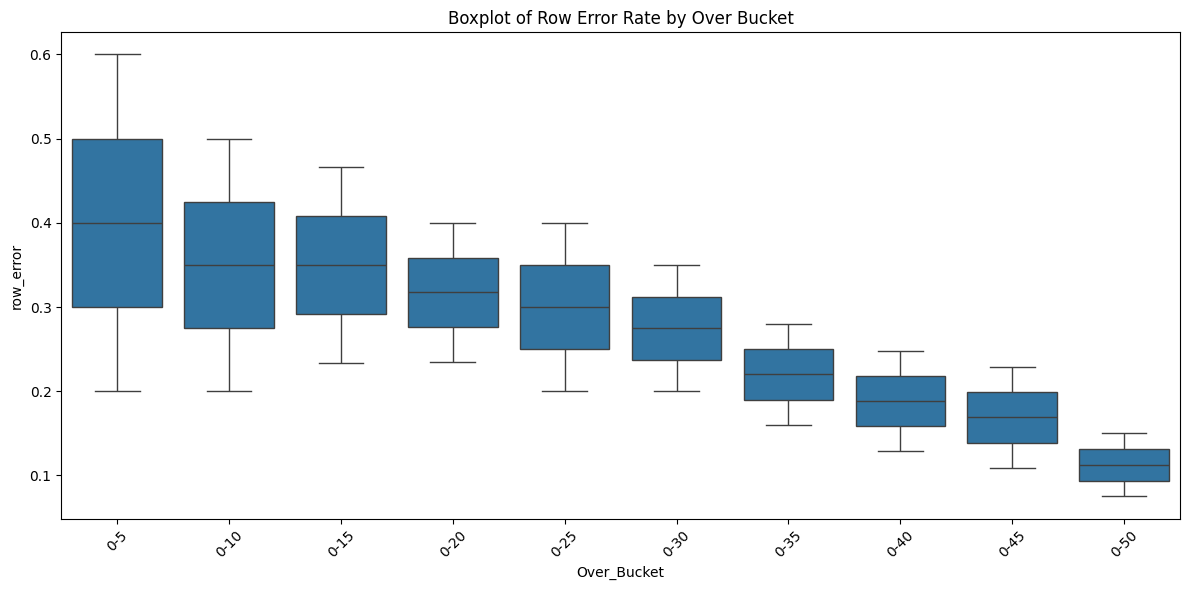

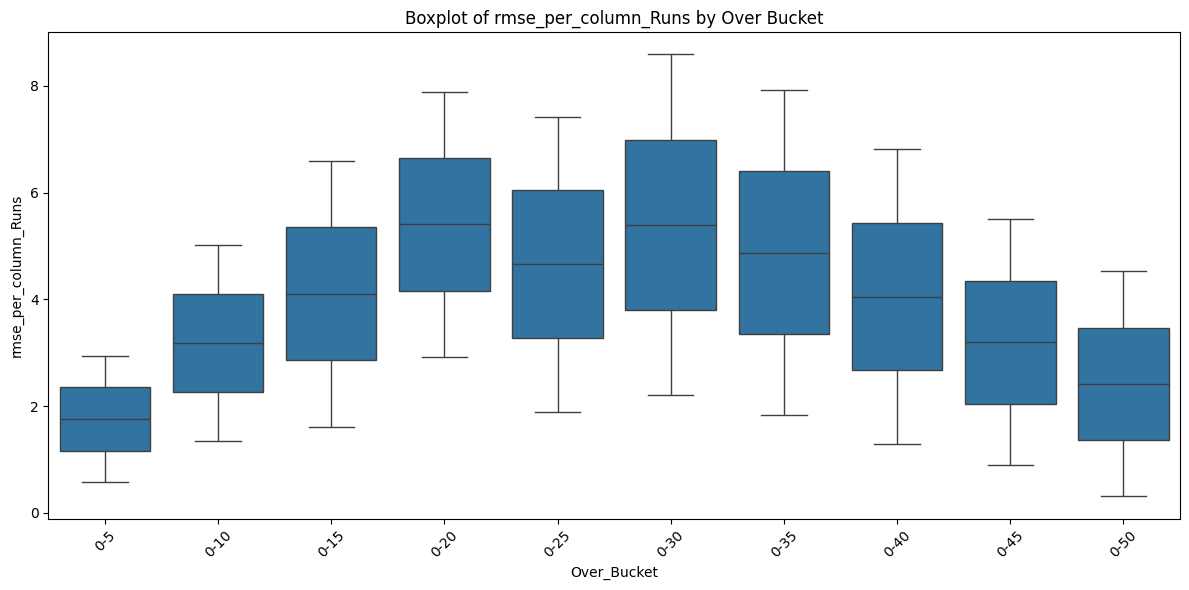

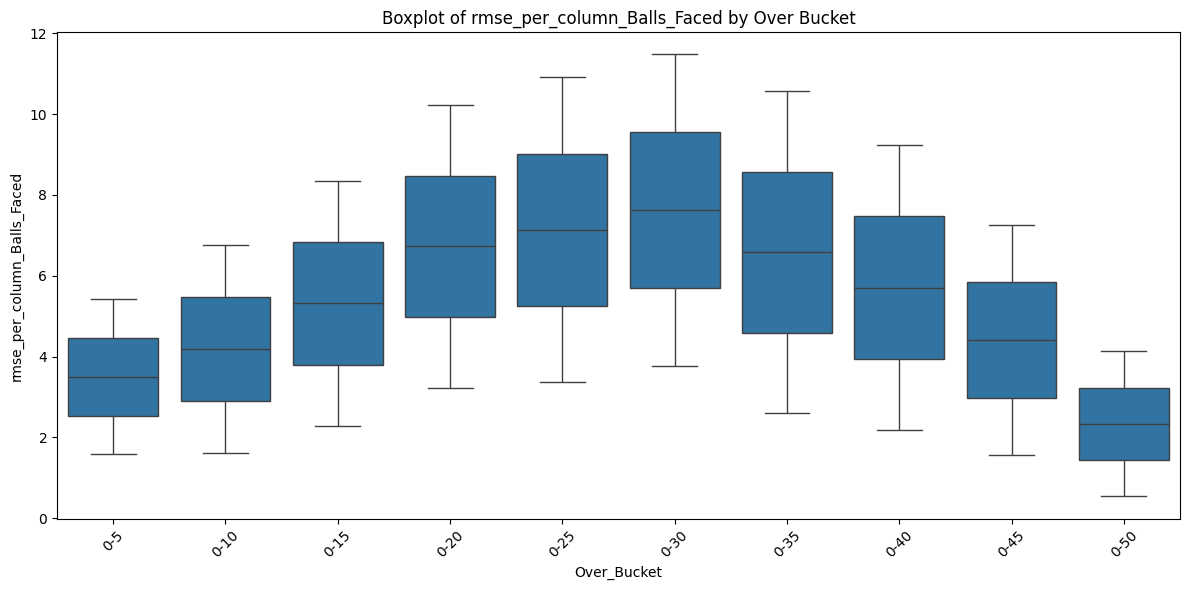

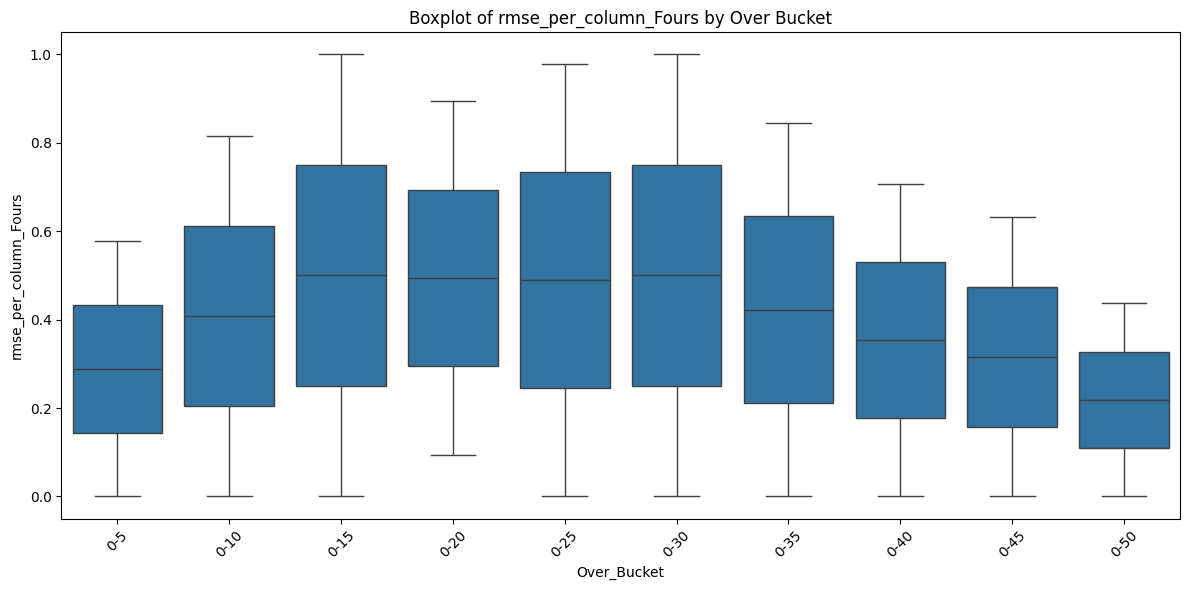

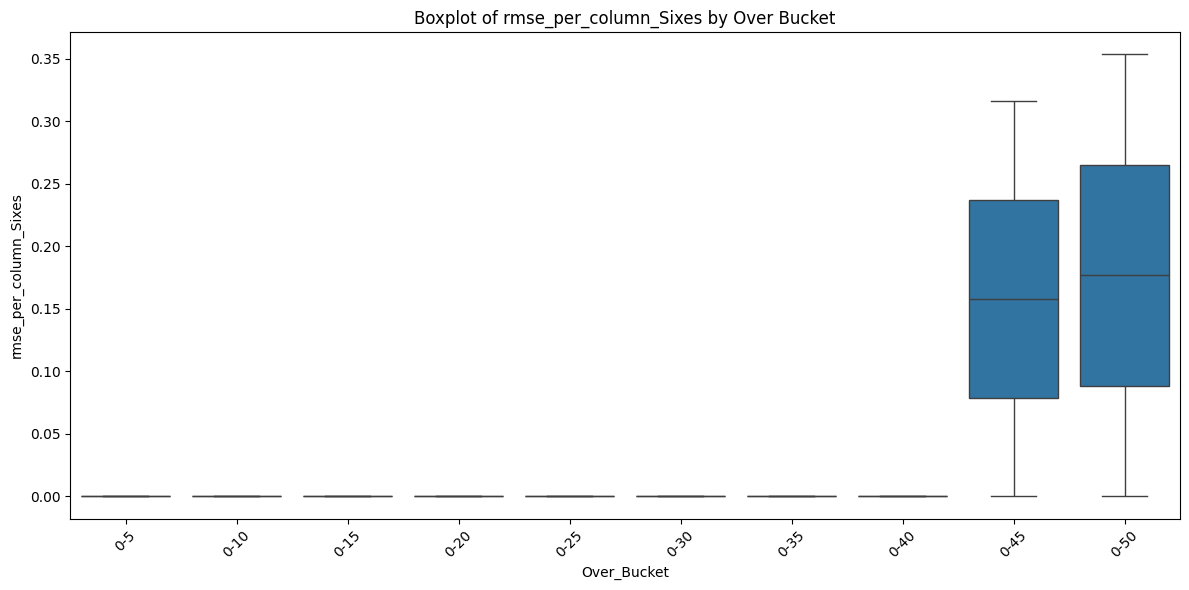

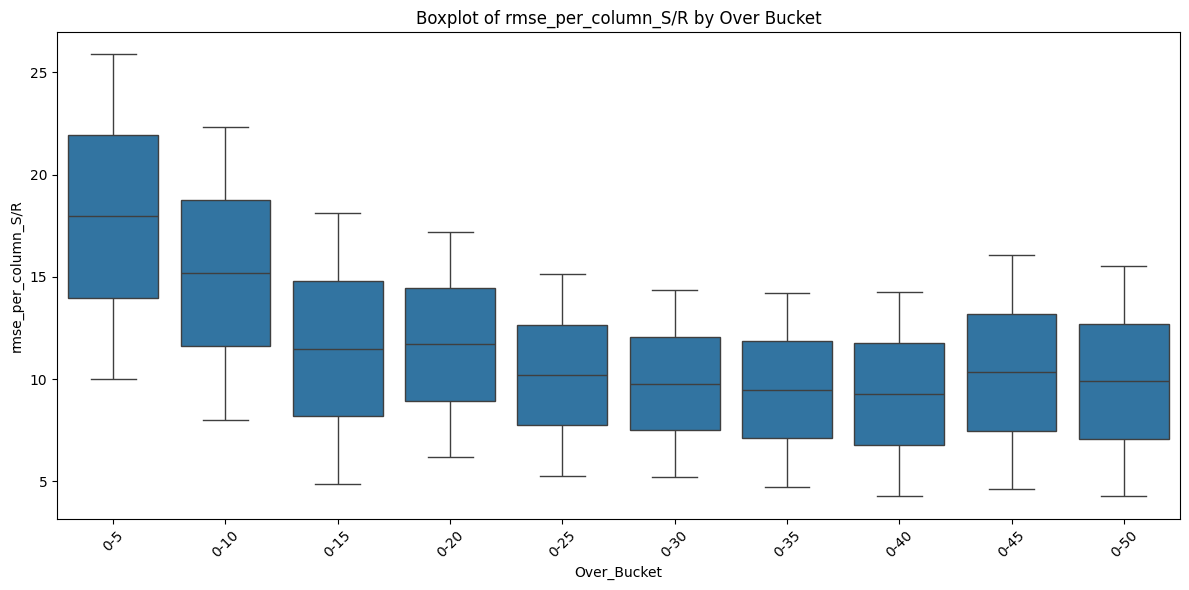

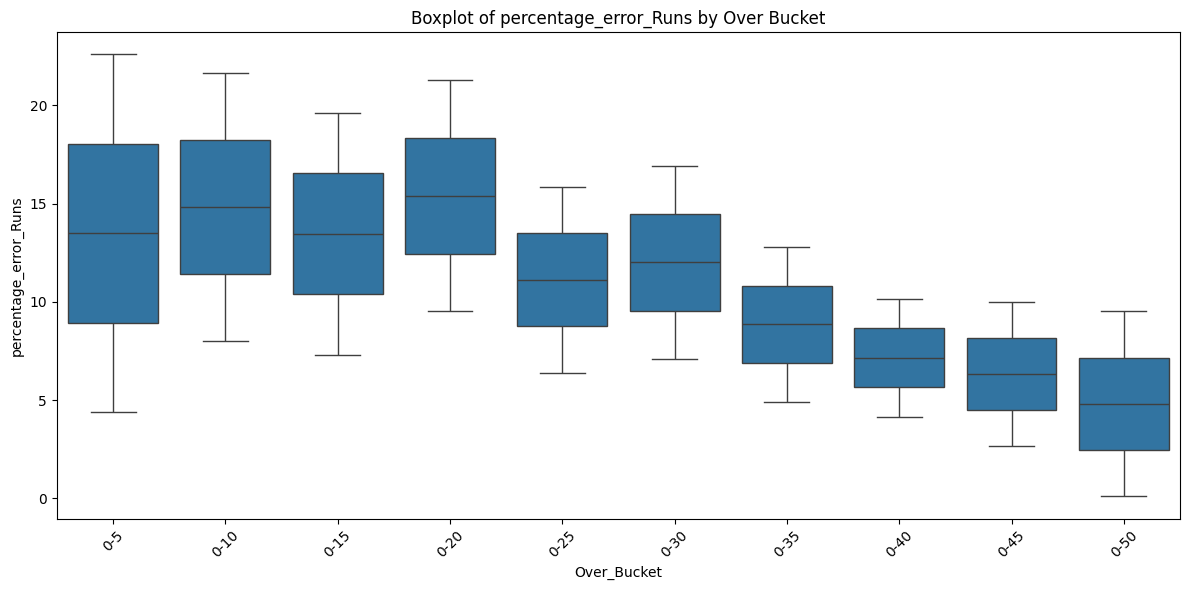

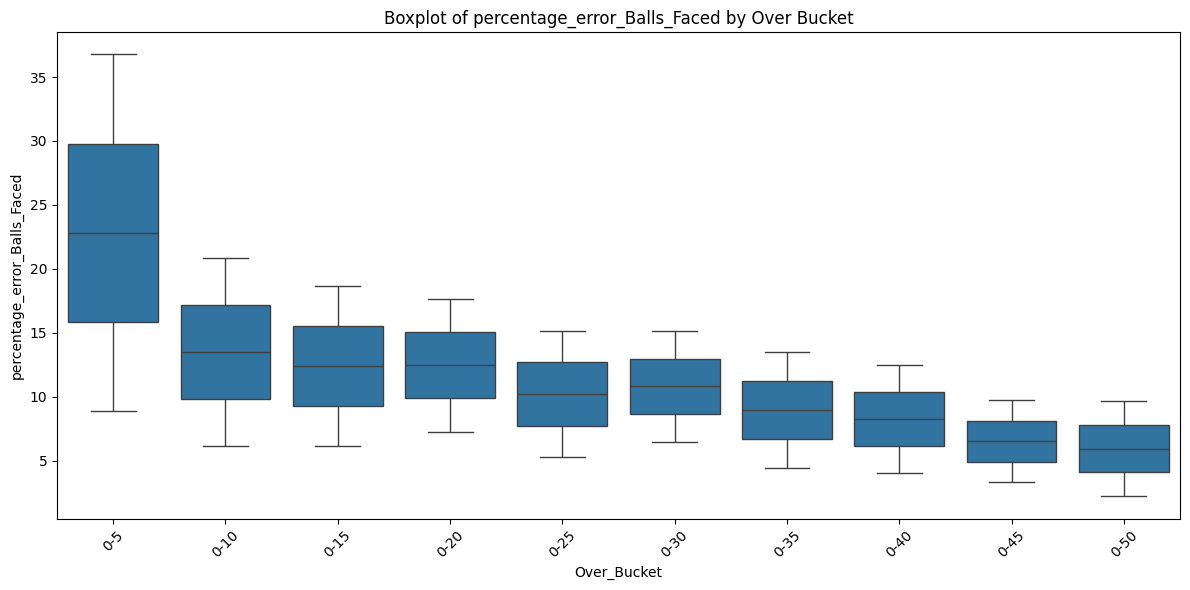

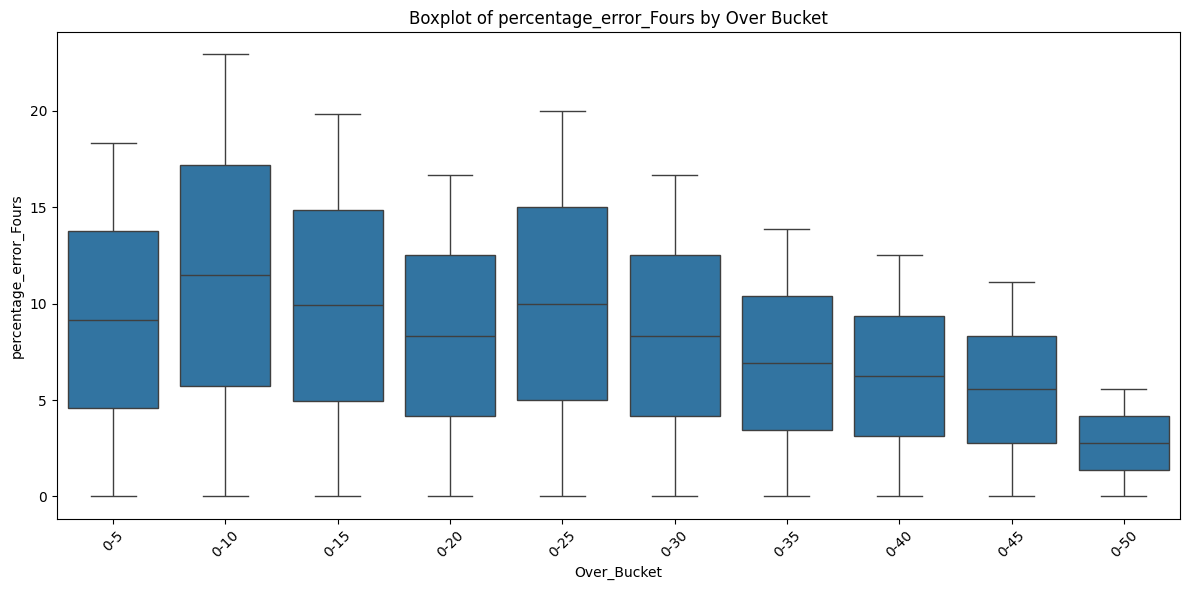

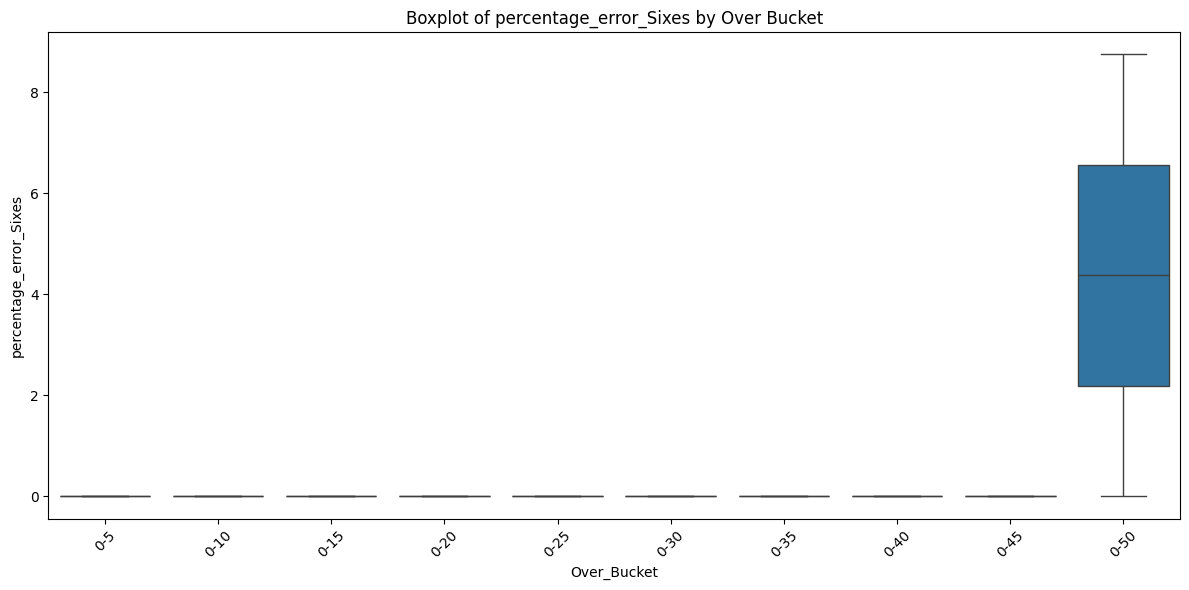

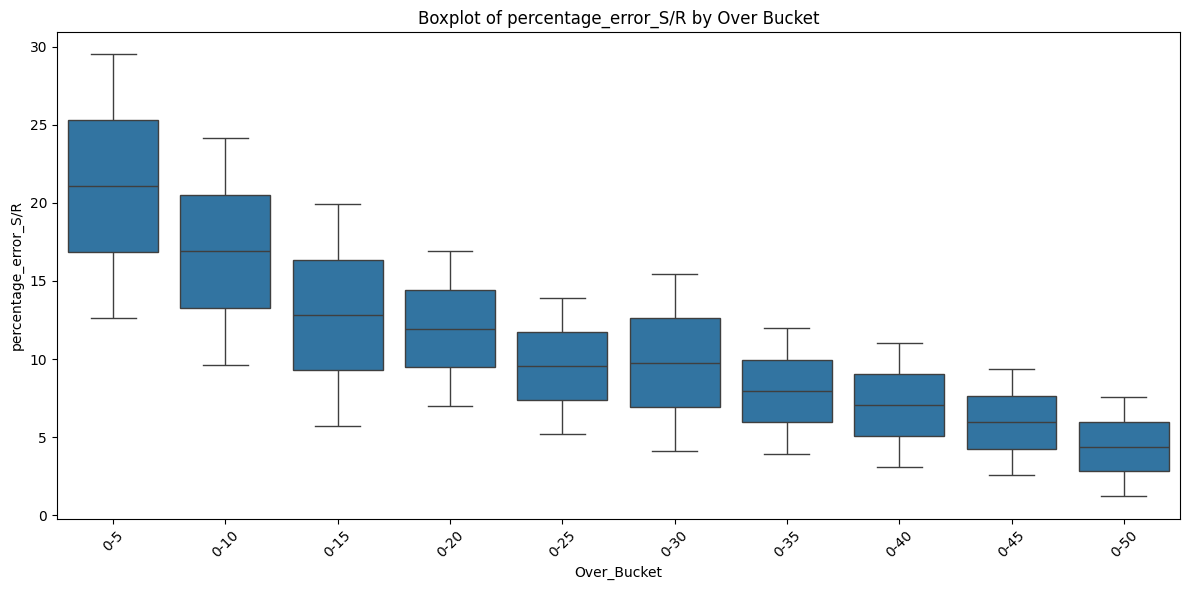

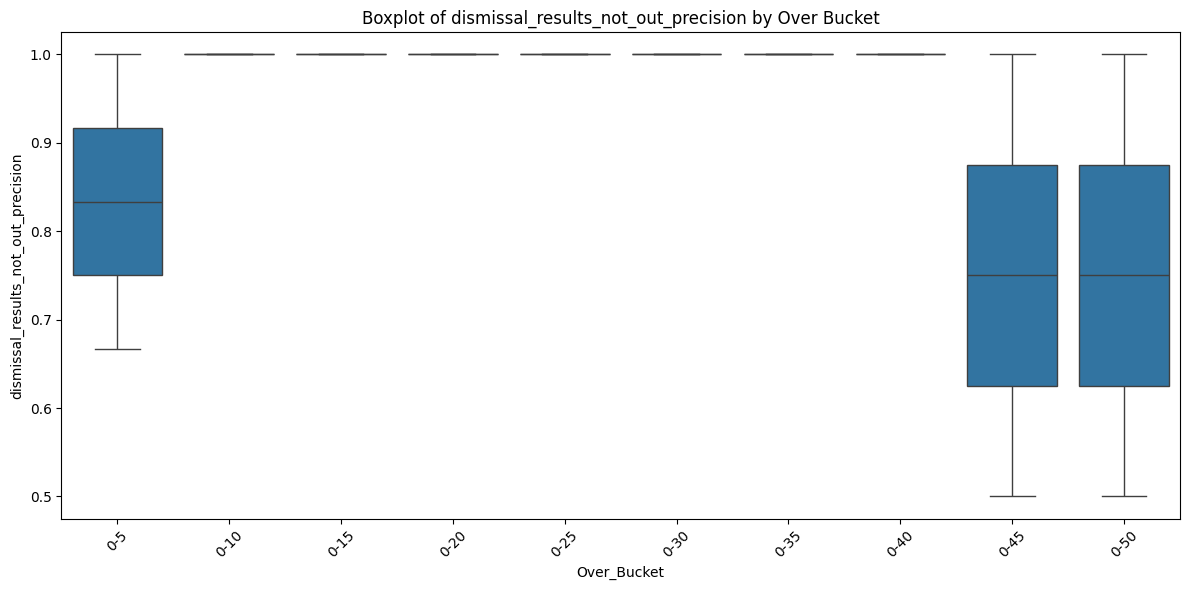

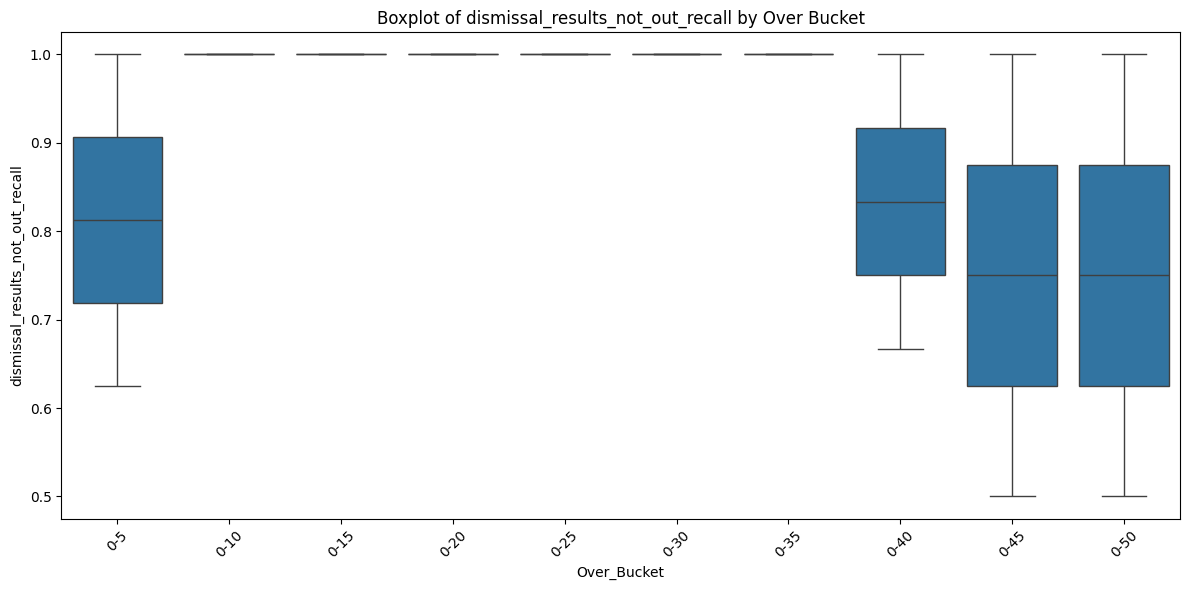

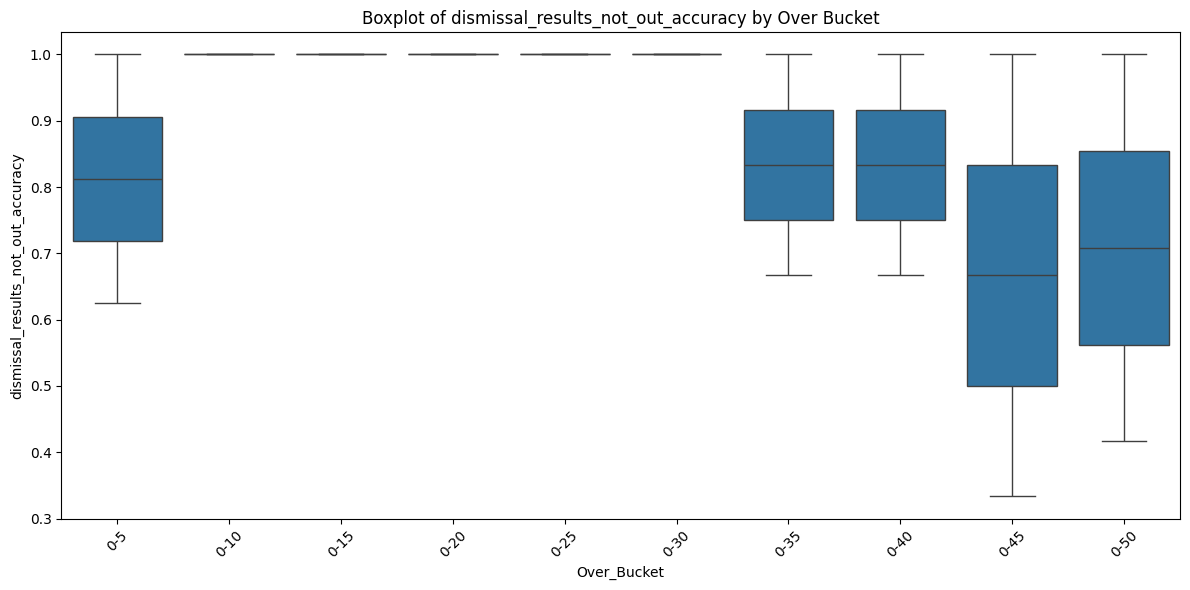

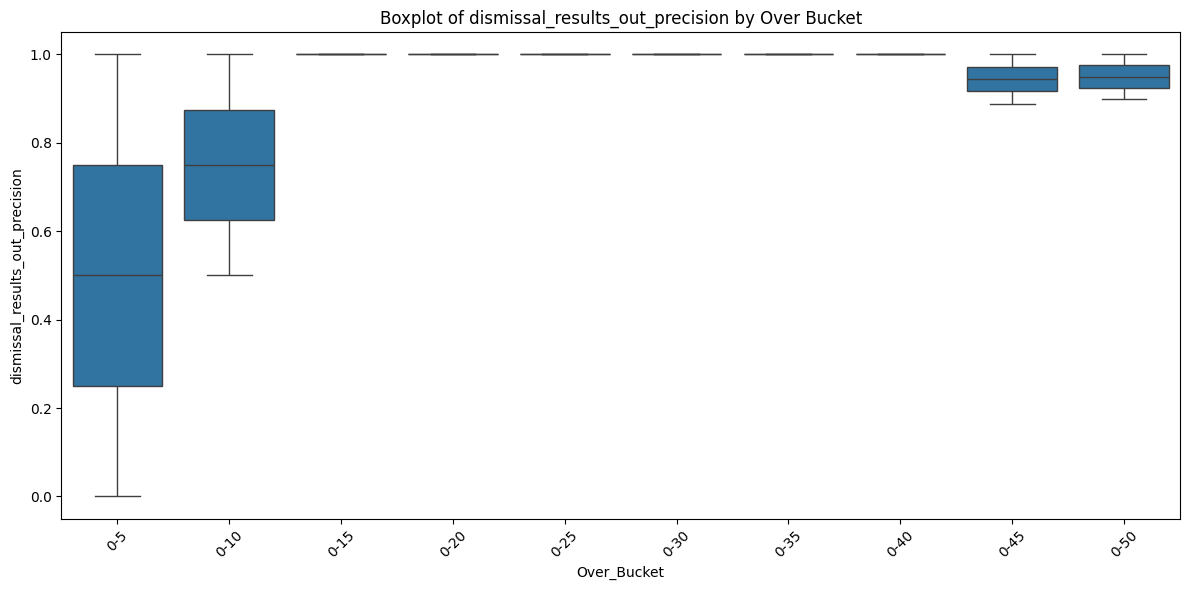

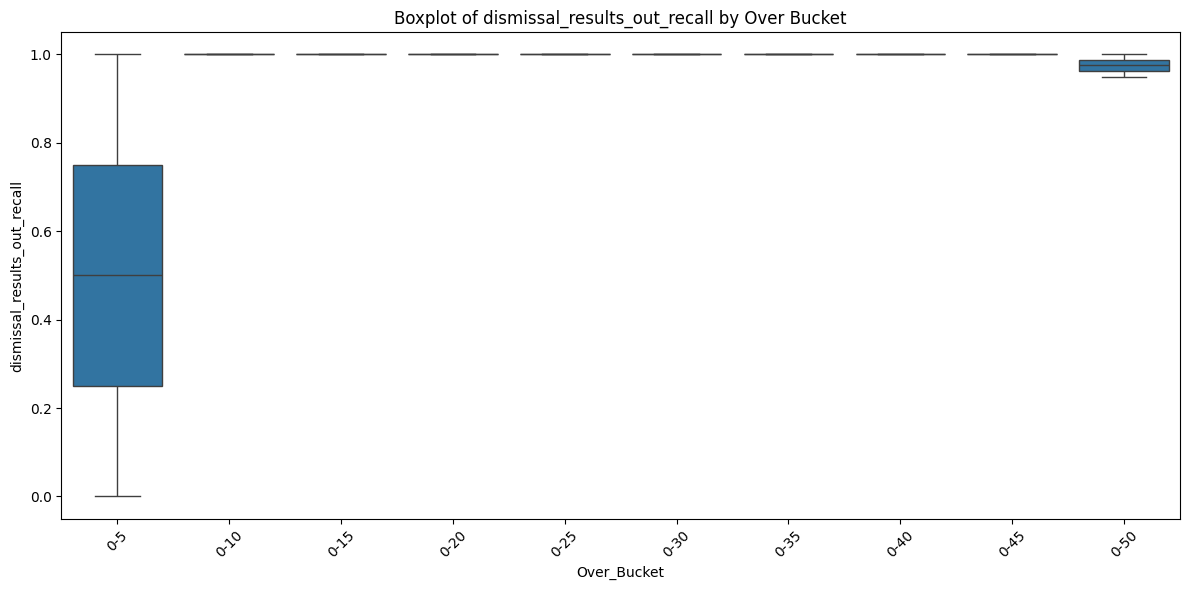

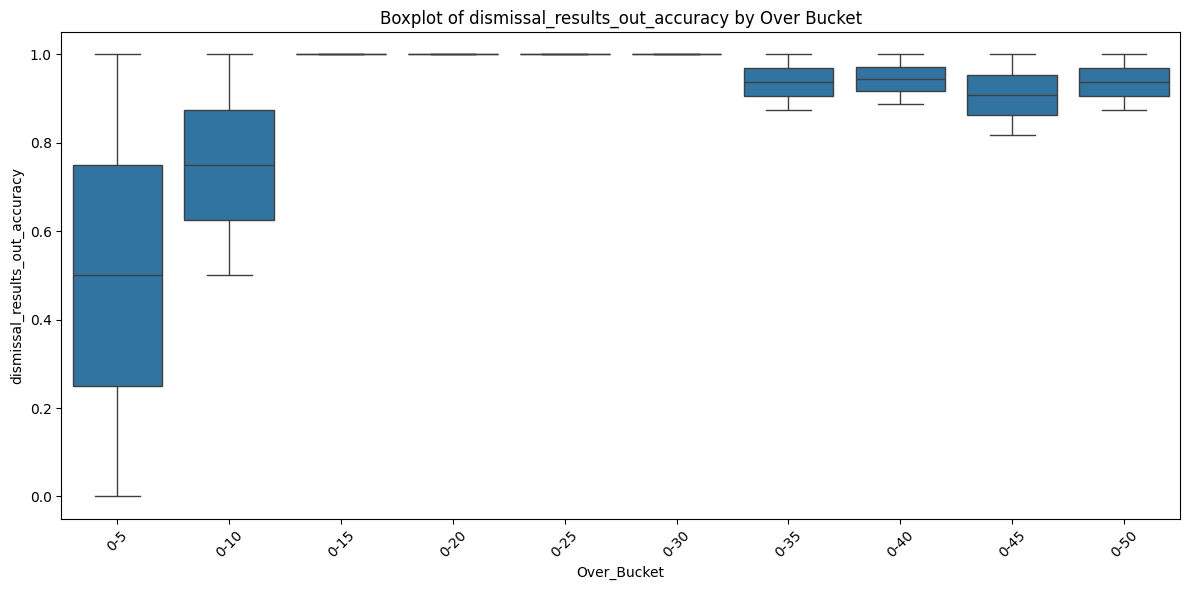

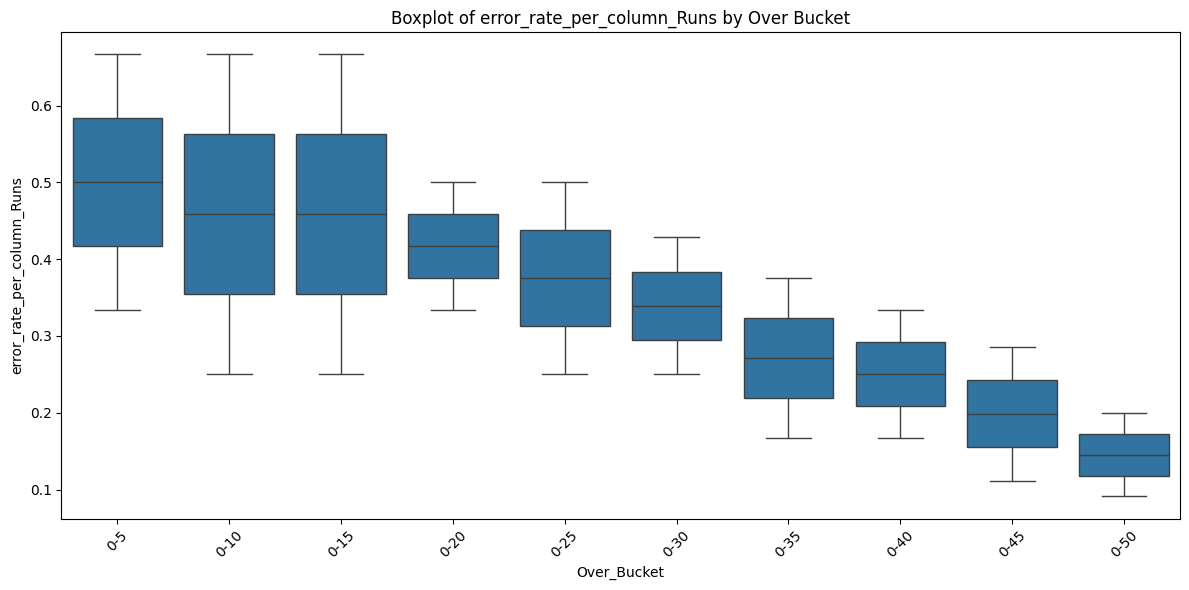

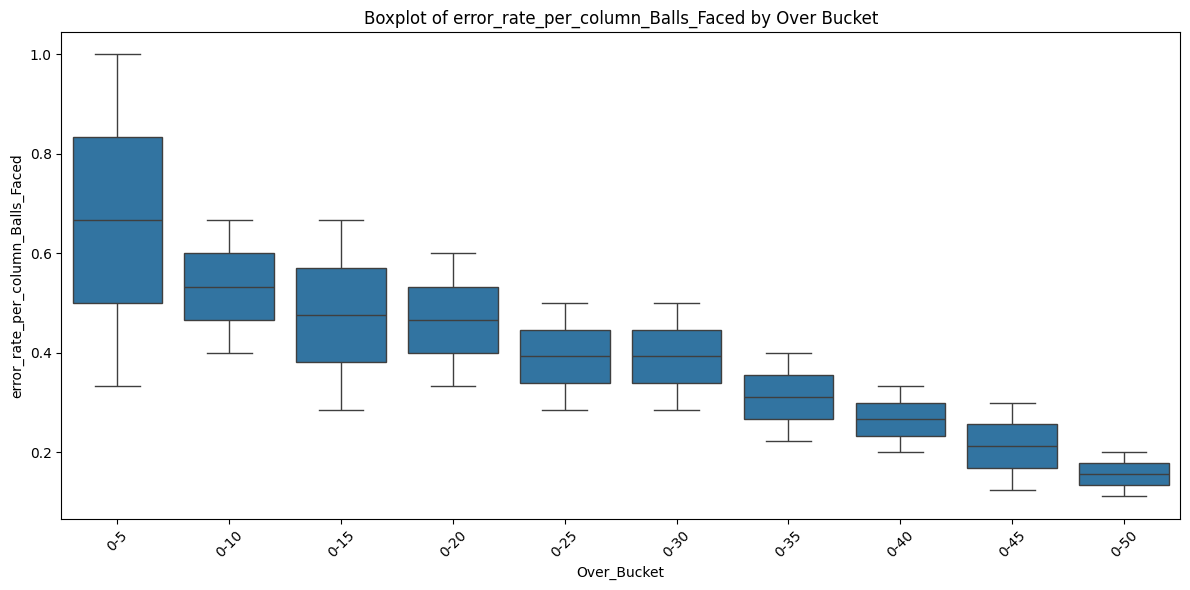

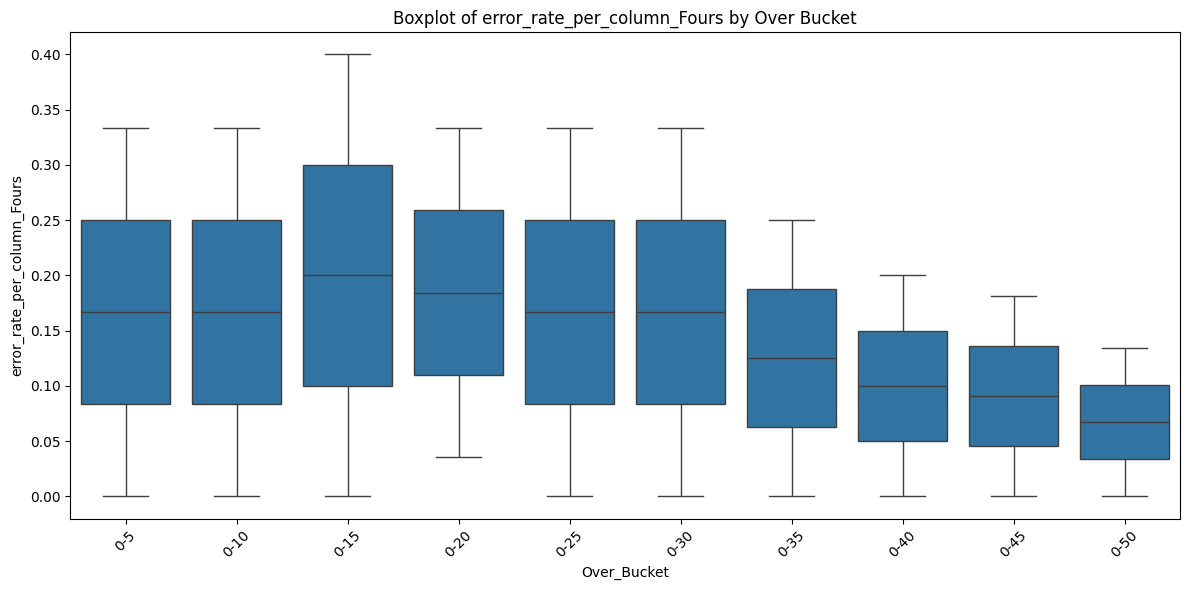

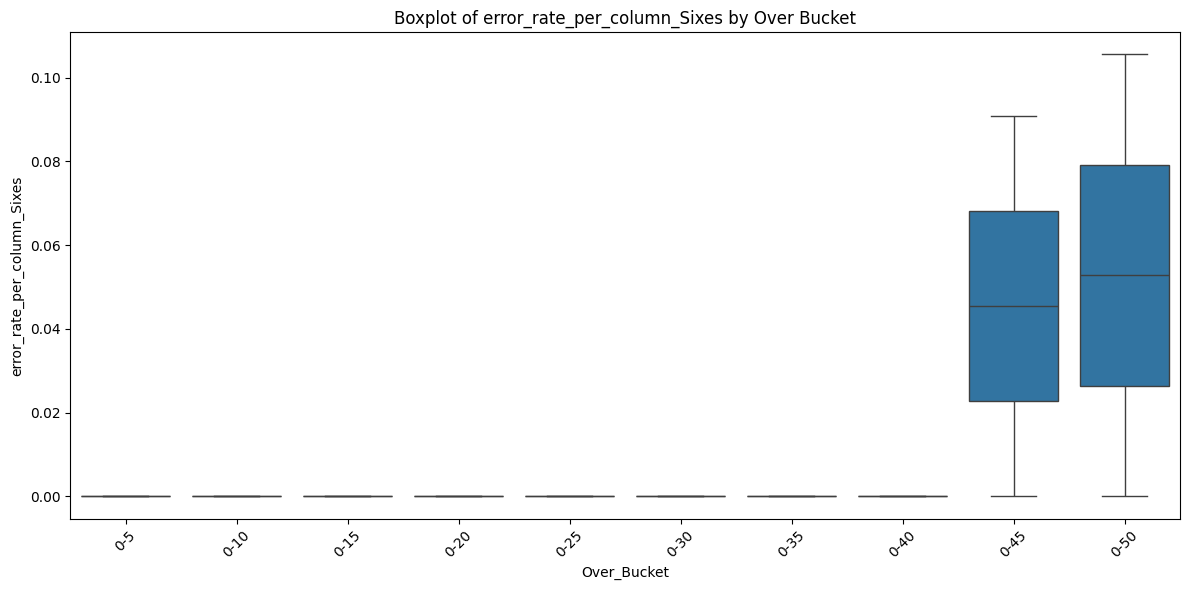

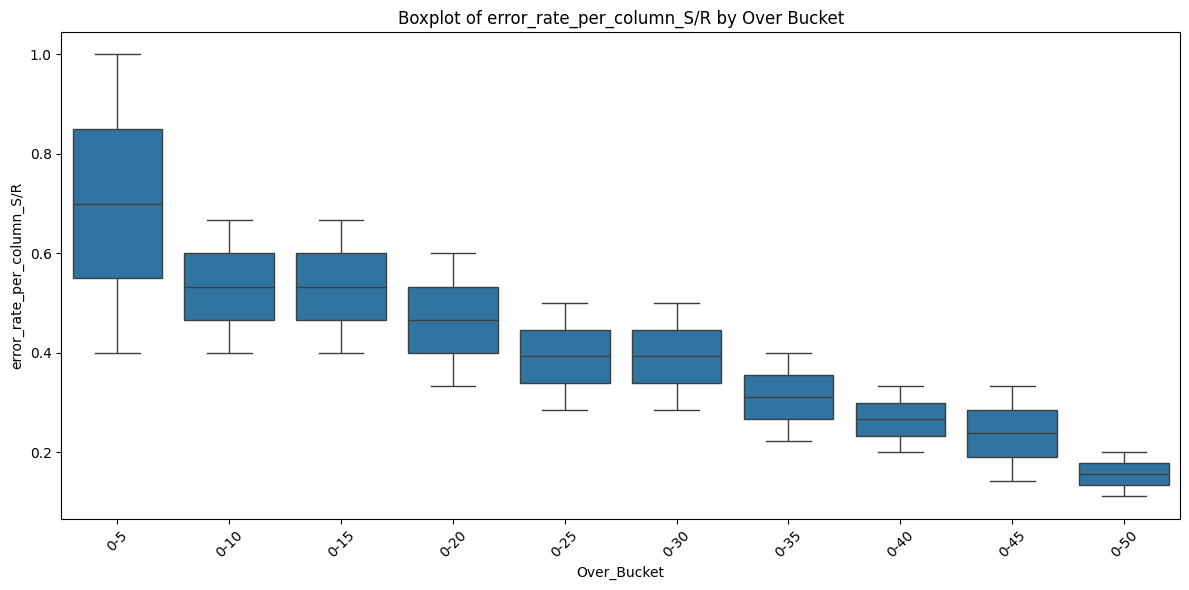

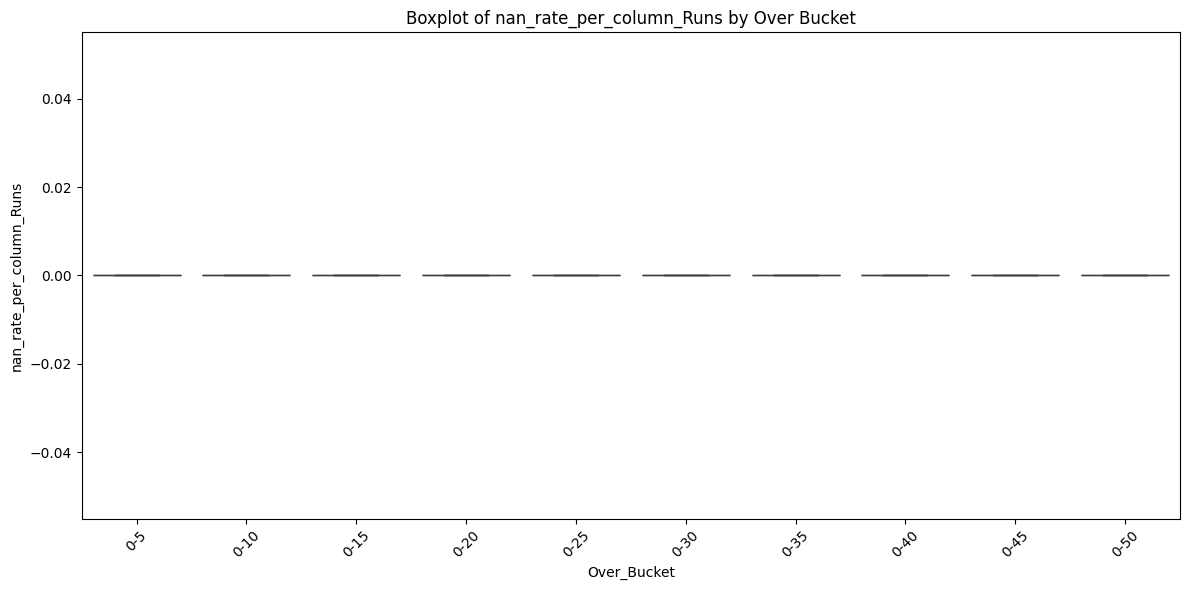

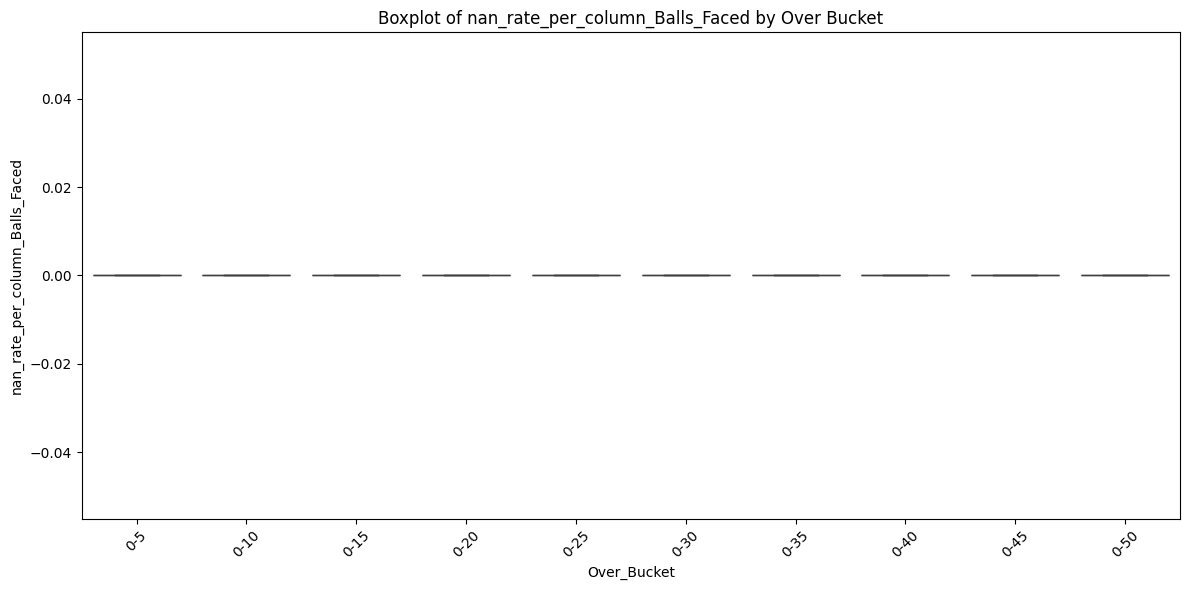

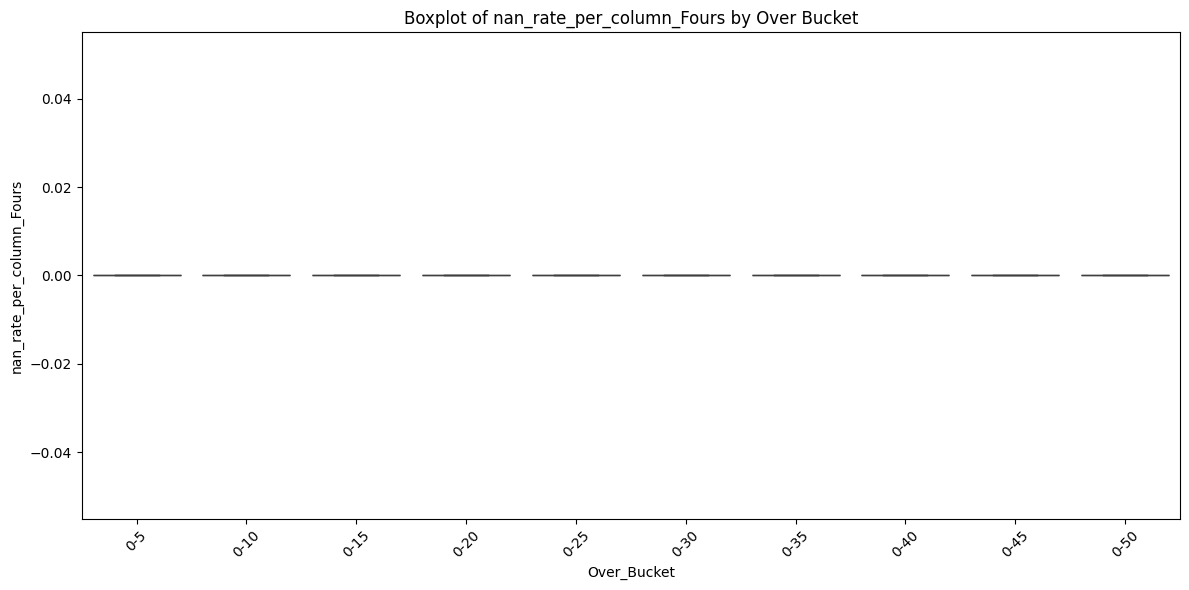

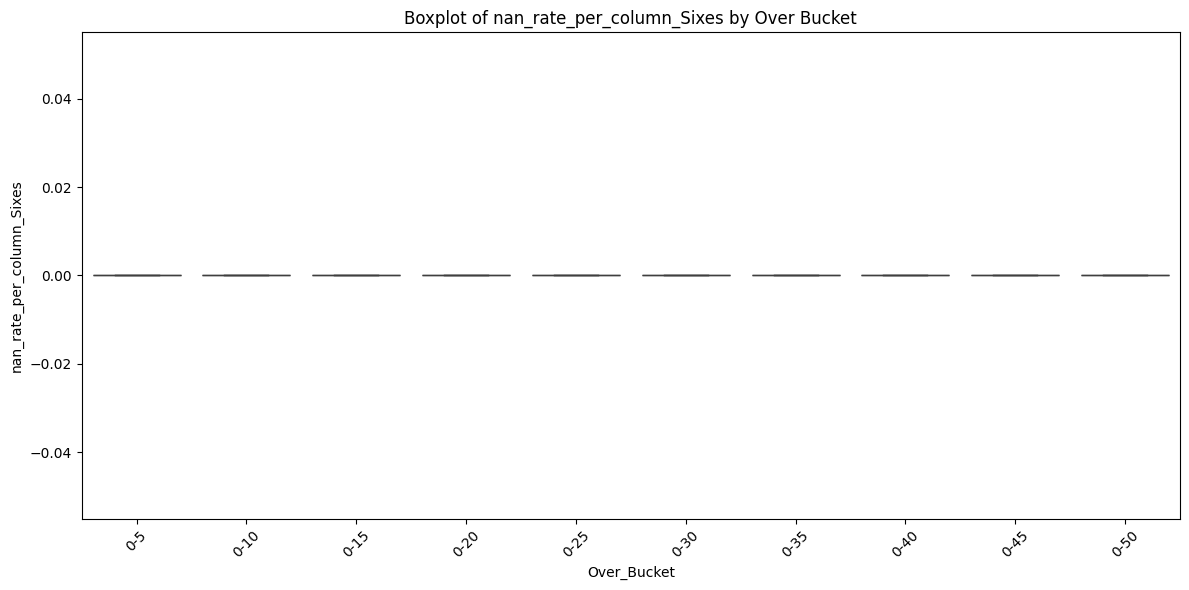

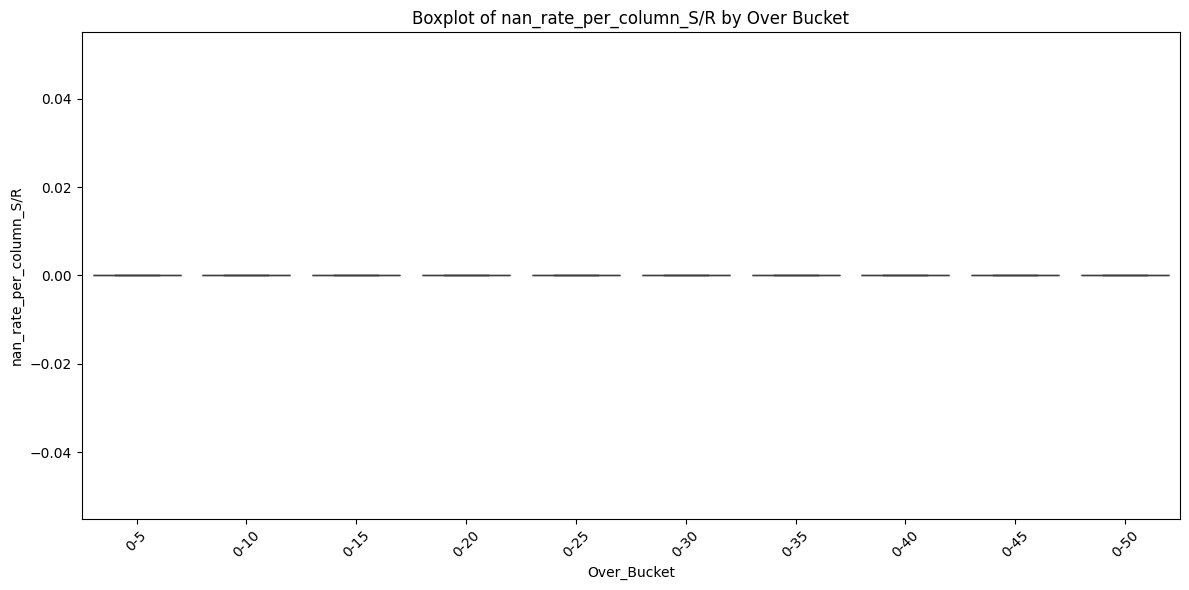

<Figure size 640x480 with 0 Axes>

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume grouped_q1 and grouped_q3 are already loaded in the environment
# We concatenate them first (with a column indicating quantile)
grouped_q1['Quantile'] = 'Q1'
grouped_q3['Quantile'] = 'Q3'
combined = pd.concat([grouped_q1, grouped_q3])

# Convert Over_Bucket to a categorical type to preserve ordering in plots
sorted_buckets = sorted(combined['Over_Bucket'].unique(), key=lambda x: int(str(x).split('-')[1]))


combined['Over_Bucket'] = pd.Categorical(combined['Over_Bucket'], ordered=True, categories=sorted_buckets)

# Plot 1: Boxplot for row_error by Over_Bucket
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined, x='Over_Bucket', y='row_error')
plt.title('Boxplot of Row Error Rate by Over Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Boxplots for other numeric columns (excluding Over_Bucket, row_error, etc.)
exclude_cols = ['Over_Bucket', 'Last_Over', 'Overs', 'row_error', 'Quantile']
numeric_cols = [col for col in combined.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(combined[col])]

# Generate a grid of boxplots
num_cols = len(numeric_cols)
#fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(18, 5 * ((num_cols + 2) // 3)))
#axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    #if col.startswith('percentage') or col.startswith('error'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined, x='Over_Bucket', y=col)
    plt.title(f'Boxplot of {col} by Over Bucket')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plt.tight_layout()
plt.show()


In [447]:
df_combined.groupby('Last_Over').quantile(0.25, numeric_only=True).reset_index()


,Last_Over,Overs,rmse_per_column_Runs,rmse_per_column_Balls_Faced,rmse_per_column_Fours,rmse_per_column_Sixes,rmse_per_column_S/R,percentage_error_Runs,percentage_error_Balls_Faced,percentage_error_Fours,...,error_rate_per_column_Balls_Faced,error_rate_per_column_Fours,error_rate_per_column_Sixes,error_rate_per_column_S/R,nan_rate_per_column_Runs,nan_rate_per_column_Balls_Faced,nan_rate_per_column_Fours,nan_rate_per_column_Sixes,nan_rate_per_column_S/R,row_error
0,0,15.000,1.581139,2.302139,0.0,0.0,5.606252,6.183537,5.874350,0.0,...,0.272727,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.200000
1,1,42.375,0.316228,0.551511,0.0,0.0,2.927709,1.384589,1.262144,0.0,...,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.057143


In [448]:
def compare_scorecards_notout(gt_df_loc, pred_df_loc, id_col='batsman', numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = ['Runs', 'Balls_Faced', 'Fours', 'Sixes', 'S/R']
    if pred_df_loc is None:
        return None

    gt_df = pd.read_csv(gt_df_loc).copy()
    pred_df = pd.read_csv(pred_df_loc).copy()
    pred_df.rename(columns={'S_R': 'S/R'}, inplace=True)
    pred_df.replace(['', ' '], np.nan, inplace=True)
    gt_df = gt_df.drop_duplicates('batsman')

    # Step 2: Generate optimal one-to-one alignment
    gt_names = gt_df[id_col].tolist()
    pred_names = pred_df[id_col].tolist()
    matches = generate_name_alignment(gt_names, pred_names)  # List of (gt, pred)

    #print(matches)

    # Step 3: Build aligned DataFrames directly from matched names
    aligned_gt = []
    aligned_pred = []
    for gt_name, pred_name in matches:
        gt_row = gt_df[gt_df[id_col] == gt_name]
        pred_row = pred_df[pred_df[id_col] == pred_name]

        if not gt_row.empty and not pred_row.empty:
            gt_row = gt_row.copy()
            pred_row = pred_row.copy()
            gt_row['matched_gt'] = gt_name
            pred_row['matched_pred'] = pred_name
            aligned_gt.append(gt_row)
            aligned_pred.append(pred_row)

    # Step 4: Concatenate and reset index
    gt_aligned_df = pd.concat(aligned_gt).reset_index(drop=True)
    pred_aligned_df = pd.concat(aligned_pred).reset_index(drop=True)

    # Step 5: Final aligned merge using position, not names
    merged = pd.concat([gt_aligned_df.add_suffix('_gt'), pred_aligned_df.add_suffix('_pred')], axis=1)
    # Normalize dismissals
    # Normalize predicted dismissal
    merged['dismissal_pred'] = merged['dismissal_pred'].astype(str).str.lower().str.strip()

    # Keep only rows where predicted dismissal is "not out"
    merged = merged[merged['dismissal_pred'] == 'not out'].copy()


    dismissal_metrics = evaluate_dismissal_classification(merged)

    # Numeric conversion
    for col in numeric_cols:
        merged[f"{col}_gt"] = pd.to_numeric(merged[f"{col}_gt"], errors='coerce')
        merged[f"{col}_pred"] = pd.to_numeric(merged[f"{col}_pred"], errors='coerce')

    # NaN tracking
    nan_rate_per_column = {}
    for col in numeric_cols:
        merged[f"{col}_pred_missing"] = merged[f"{col}_pred"].isna()
        nan_rate_per_column[col] = merged[f"{col}_pred_missing"].mean()

    # RMSE + MAPE
    rmse_results = {}
    perc_results = {}
    for col in numeric_cols:
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        rmse_results[col] = np.sqrt(mean_squared_error(gt_vals[valid], pred_vals[valid])) if valid.any() else np.nan
        valid_vals = valid & (gt_vals != 0)
        perc_results[col] = mean_absolute_percentage_error(gt_vals[valid_vals], pred_vals[valid_vals]) * 100 if valid_vals.any() else np.nan

    # Error rate per column
    col_error_rates = {}
    for col in numeric_cols:
        tolerance = 0.1 if col == 'S/R' else 0.01
        gt_vals = merged[f"{col}_gt"]
        pred_vals = merged[f"{col}_pred"]
        valid = gt_vals.notna() & pred_vals.notna()
        col_error_rates[col] = (~np.isclose(gt_vals[valid], pred_vals[valid], atol=tolerance)).mean() if valid.any() else np.nan

    # Row-wise error
    def row_error(row):
        mismatches = 0
        valid_fields = 0
        for col in numeric_cols:
            val_gt = row[f"{col}_gt"]
            val_pred = row[f"{col}_pred"]
            if pd.notna(val_gt) and pd.notna(val_pred):
                if col in exact_match_cols:
                    if val_gt != val_pred:
                        mismatches += 1
                else:
                    tolerance = 0.1 if col == 'S/R' else 0.01
                    if not np.isclose(val_gt, val_pred, atol=tolerance):
                        mismatches += 1
                valid_fields += 1
        return mismatches / valid_fields if valid_fields > 0 else np.nan

    """merged['dismissal_gt_class'] = merged['dismissal_gt'].apply(
        lambda val: 0 if isinstance(val, str) and 'not out' in val.lower().strip() else 1
    )"""
    merged['row_error'] = merged.apply(row_error, axis=1)
    row_error_not_out = merged.loc[merged['dismissal_gt_class'] == 0, 'row_error'].mean()
    row_error_dismissed = merged.loc[merged['dismissal_gt_class'] == 1, 'row_error'].mean()

    # Match stats
    missing_players = list(set(gt_df[id_col]) - set(pred_df[id_col]))
    extra_players = list(set(pred_df[id_col]) - set(gt_df[id_col]))

    output_columns = (
        [f"{id_col}_gt", f"{id_col}_pred"] +
        [f"{col}_gt" for col in numeric_cols] +
        [f"{col}_pred" for col in numeric_cols] +
        [f"{col}_pred_missing" for col in numeric_cols] +
        ['row_error']
    )

    return {
        'rmse_per_column': rmse_results,
        'percentage_error': perc_results,
        'dismissal_results_not_out': dismissal_metrics['not_out_metrics'],
        'dismissal_results_out': dismissal_metrics['dismissed_metrics'],
        'error_rate_per_column': col_error_rates,
        'nan_rate_per_column': nan_rate_per_column,
        'row_error': merged['row_error'].mean(),
        'missing_players_in_pred': missing_players,
        'extra_players_in_pred': extra_players,
        'matched_df': merged[output_columns]
    }


In [455]:
compare_scorecards_notout(df.iloc[19]['batsman_gnd_truth'],df.iloc[19]['batsman_pred_gemini_2_f'])

{'rmse_per_column': {'Runs': 4.0,
  'Balls_Faced': 12.0,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 22.22},
 'percentage_error': {'Runs': 50.0,
  'Balls_Faced': 66.66666666666666,
  'Fours': nan,
  'Sixes': nan,
  'S/R': 50.0},
 'dismissal_results_not_out': {'precision': 1.0,
  'recall': 1.0,
  'accuracy': 1.0},
 'dismissal_results_out': {'precision': 0, 'recall': 0, 'accuracy': 0},
 'error_rate_per_column': {'Runs': 1.0,
  'Balls_Faced': 1.0,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 1.0},
 'nan_rate_per_column': {'Runs': 0.0,
  'Balls_Faced': 0.0,
  'Fours': 0.0,
  'Sixes': 0.0,
  'S/R': 0.0},
 'row_error': 0.6,
 'missing_players_in_pred': ['Obanda',
  'C Obuya',
  'Onyango',
  'Ouma',
  'Rakep',
  'Kamande',
  'Ongondo',
  'Tikolo',
  'Obuya'],
 'extra_players_in_pred': ['Rakep Patel',
  'Collins Obuya',
  'Peter Ongondo',
  'Steve Tikolo',
  'Morris Ouma',
  'Jimmy Kamande',
  'Lameck Onyango',
  'Alex Obanda',
  'David Obuya'],
 'matched_df':   batsman_gt batsman_pred  Runs_gt  Balls

In [457]:
df['batsman_error_gemini_2_f_notout'] = df.progress_apply(lambda x: compare_scorecards_notout(x['batsman_gnd_truth'],x['batsman_pred_gemini_2_f']),axis=1)

100%|██████████| 1296/1296 [00:10<00:00, 119.83it/s]


In [474]:
# Step 1: Flatten the nested error summary
def flatten_error_summary(row):
    data = row['batsman_error_gemini_2_f_notout']
    flat = {}
    for top_key, nested in data.items():
        if isinstance(nested, dict):
            for sub_key, value in nested.items():
                flat[f'{top_key}_{sub_key}'] = value
        else:
            flat[top_key] = nested
    return pd.Series(flat)

# Step 2: Flatten all rows and join with original
error_flat = df[df['batsman_error_gemini_2_f'].isna()==False].progress_apply(flatten_error_summary, axis=1)
df_combined = pd.concat([df[['Last_Over','Overs']], error_flat], axis=1)

df_combined['Over_Bucket'] = (df_combined['Overs'] // 5) * 5
df_combined['Over_Bucket'] = df_combined['Over_Bucket'].astype(int).astype(str).radd("0-")

# Step 3: Group by Overs and compute mean of each metric
grouped_q1 = df_combined.groupby('Over_Bucket').quantile(0.25, numeric_only=True).reset_index()
grouped_q3 = df_combined.groupby('Over_Bucket').quantile(0.75, numeric_only=True).reset_index()

grouped_q1['Over_Sort'] = grouped_q1['Over_Bucket'].apply(lambda x: int(str(x).split('-')[1]))
grouped_q3['Over_Sort'] = grouped_q3['Over_Bucket'].apply(lambda x: int(str(x).split('-')[1]))

# Sort by Over_Sort and drop helper column
grouped_q1 = grouped_q1.sort_values('Over_Sort').drop(columns=['Over_Sort'])
grouped_q3 = grouped_q3.sort_values('Over_Sort').drop(columns=['Over_Sort'])

100%|██████████| 1295/1295 [00:00<00:00, 8493.43it/s]


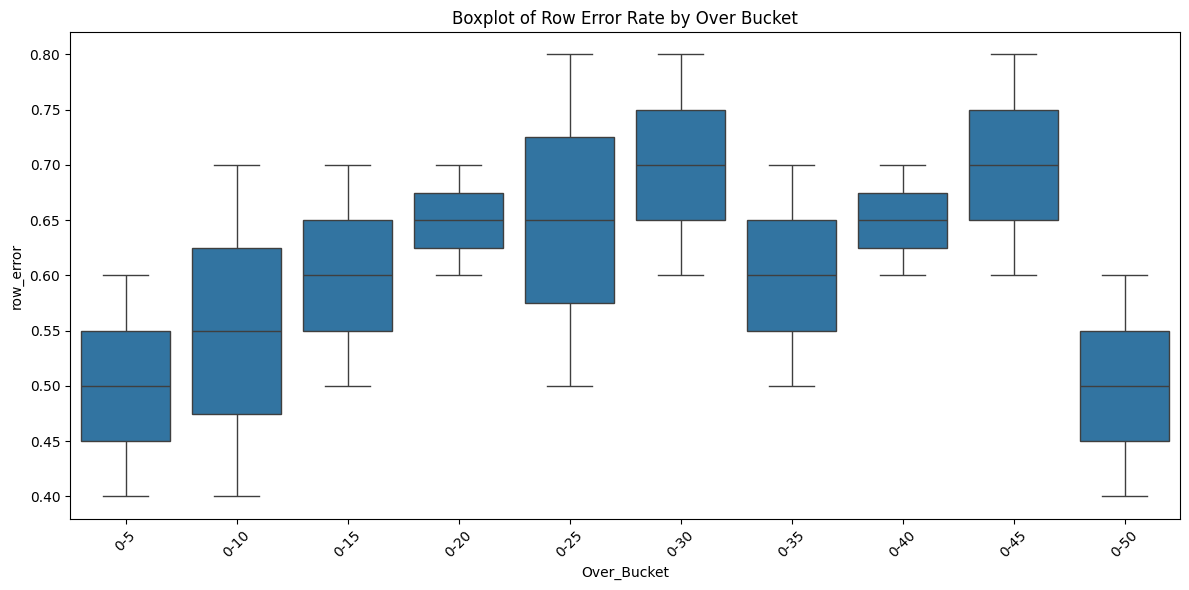

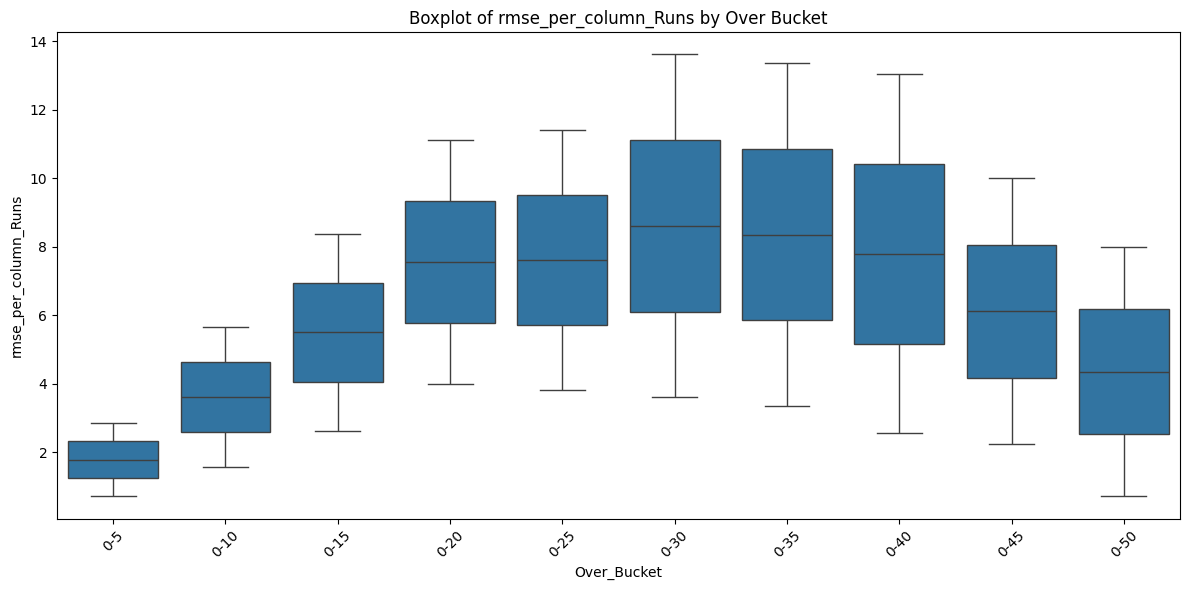

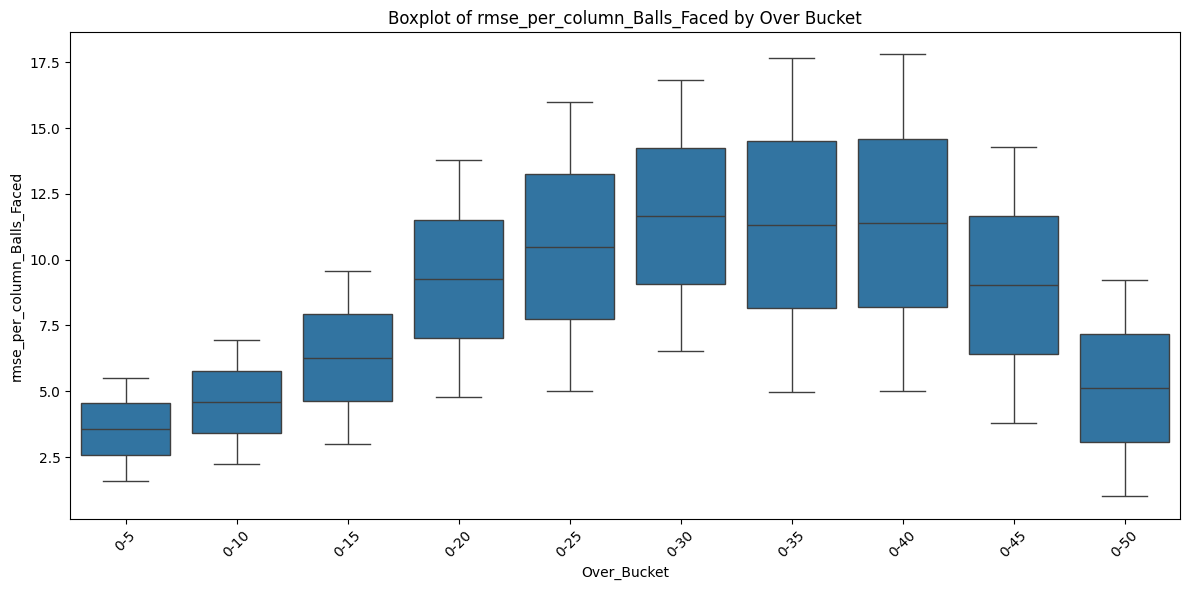

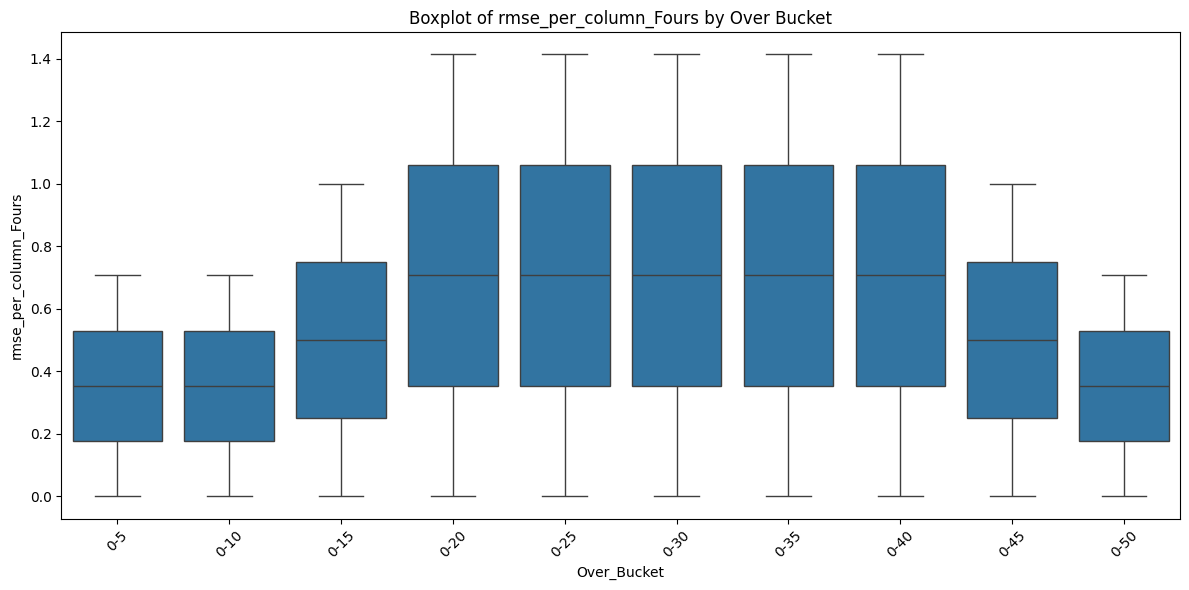

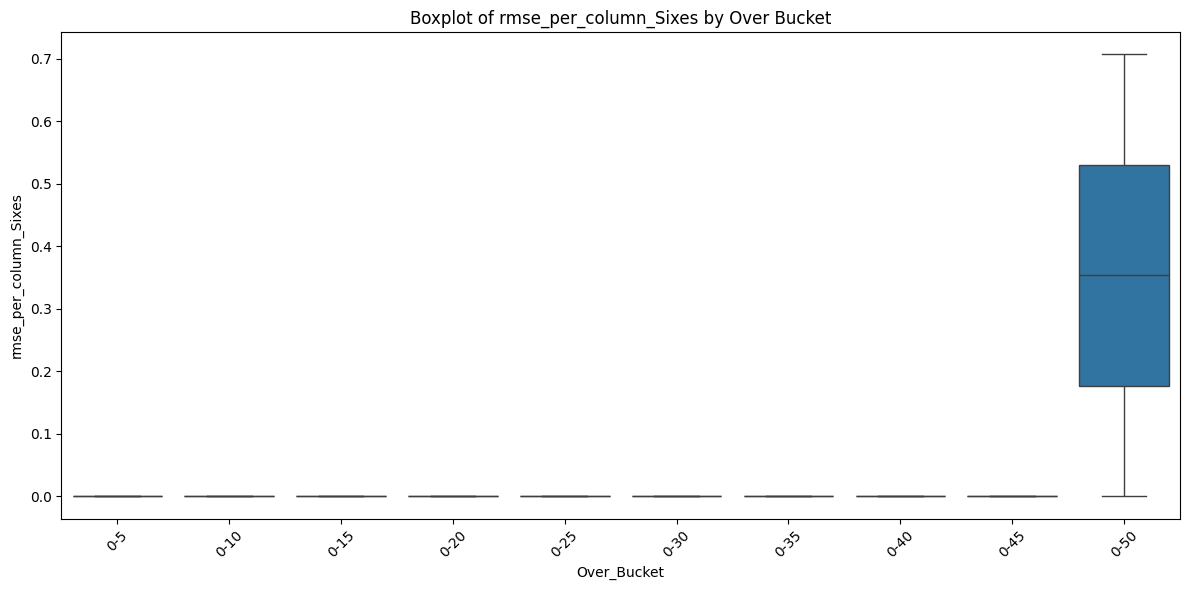

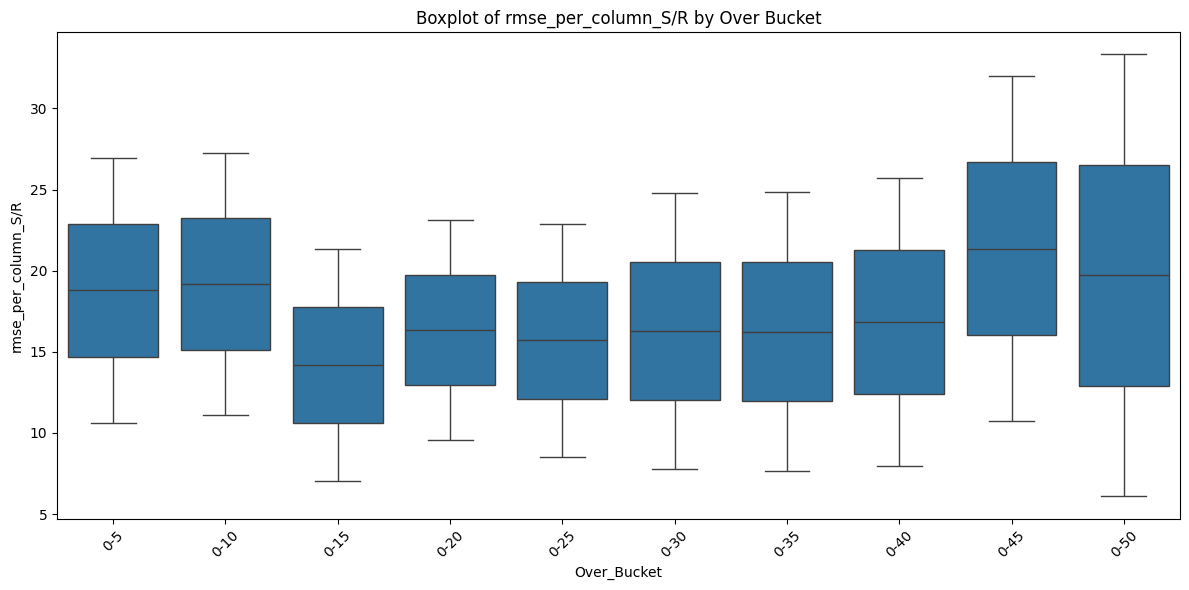

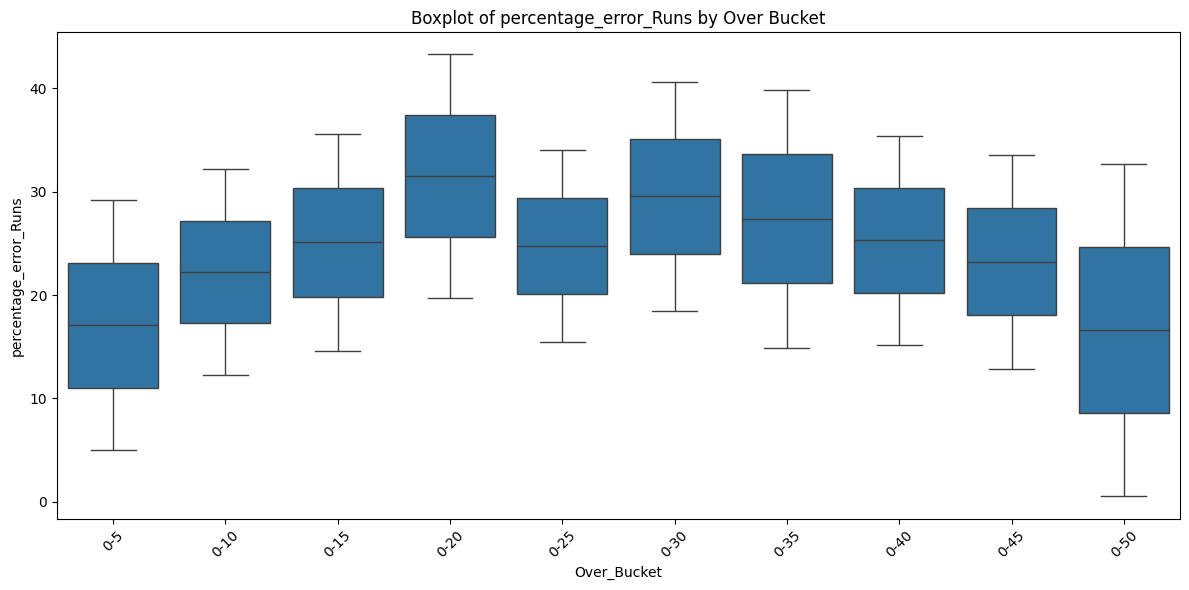

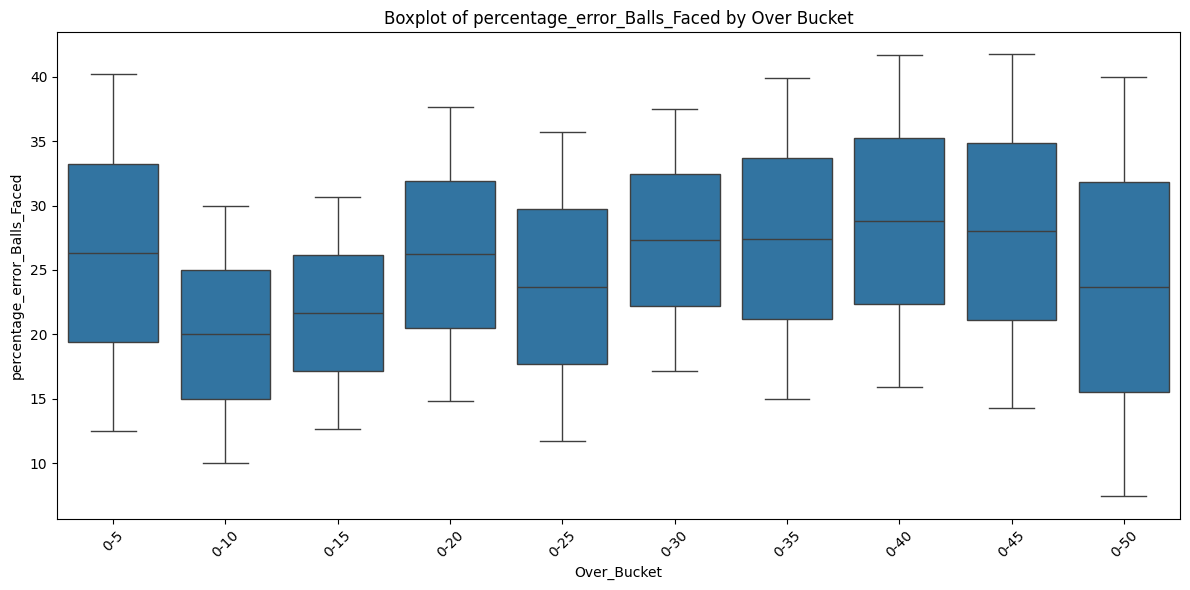

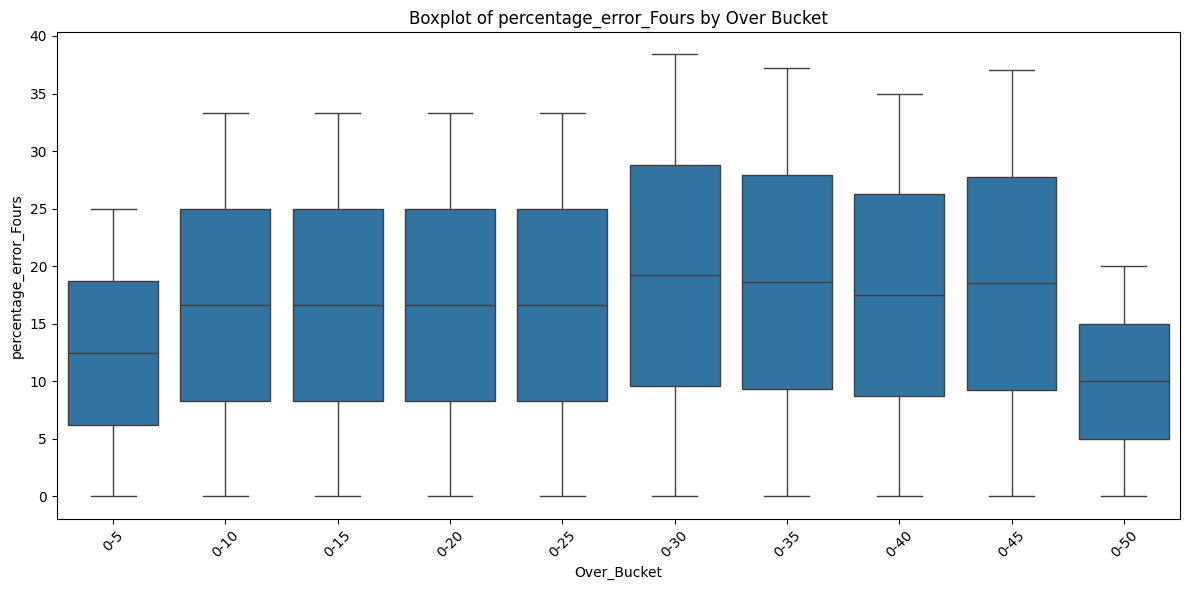

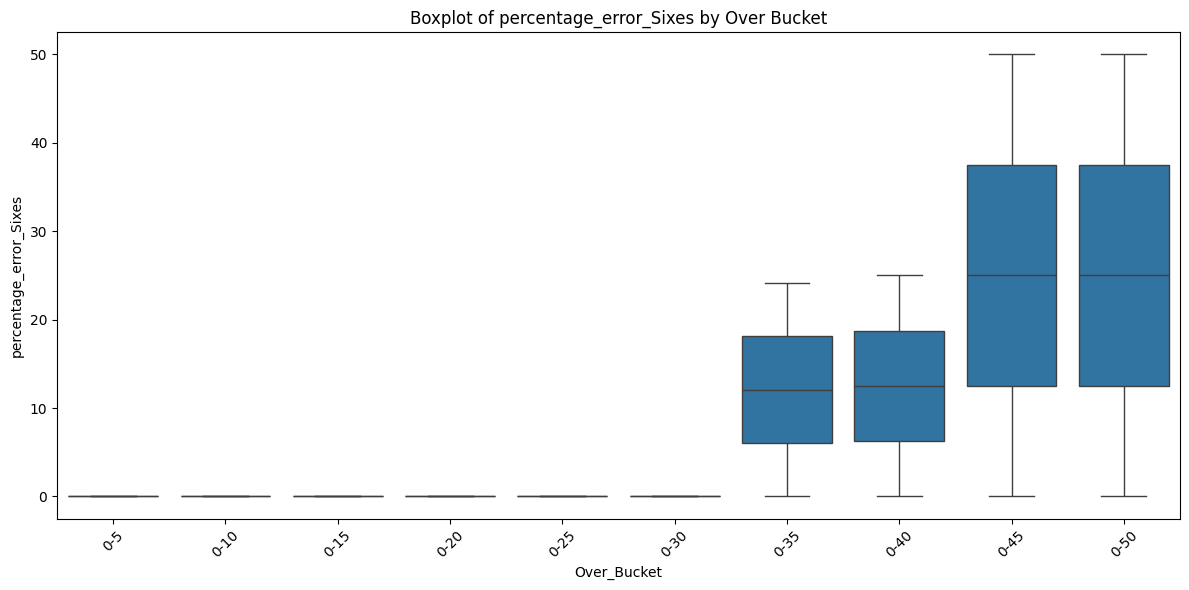

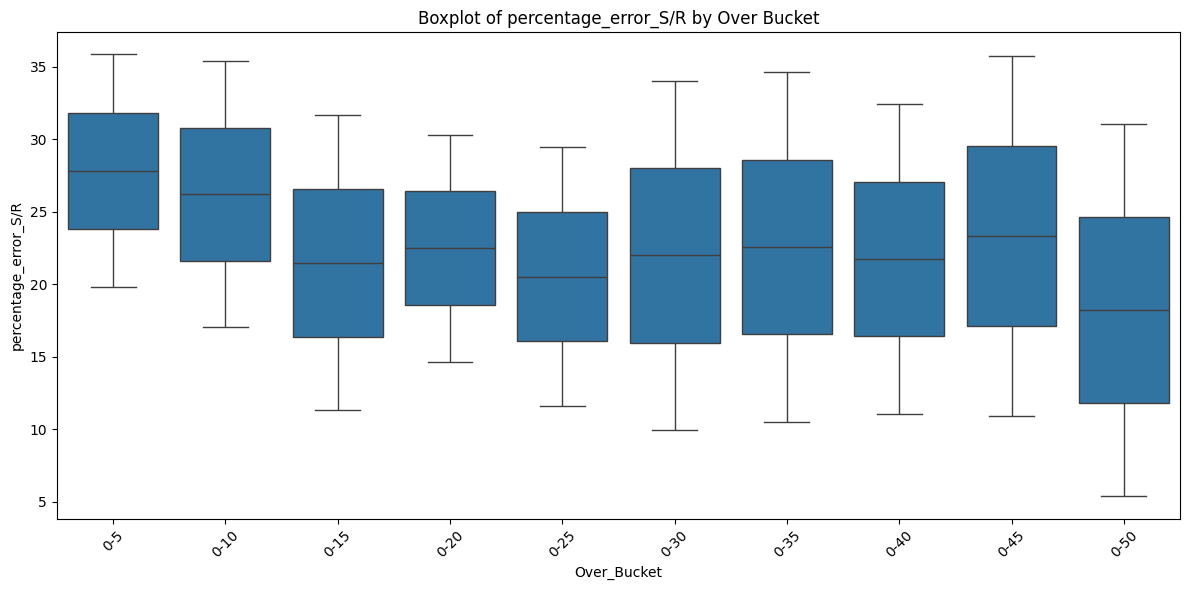

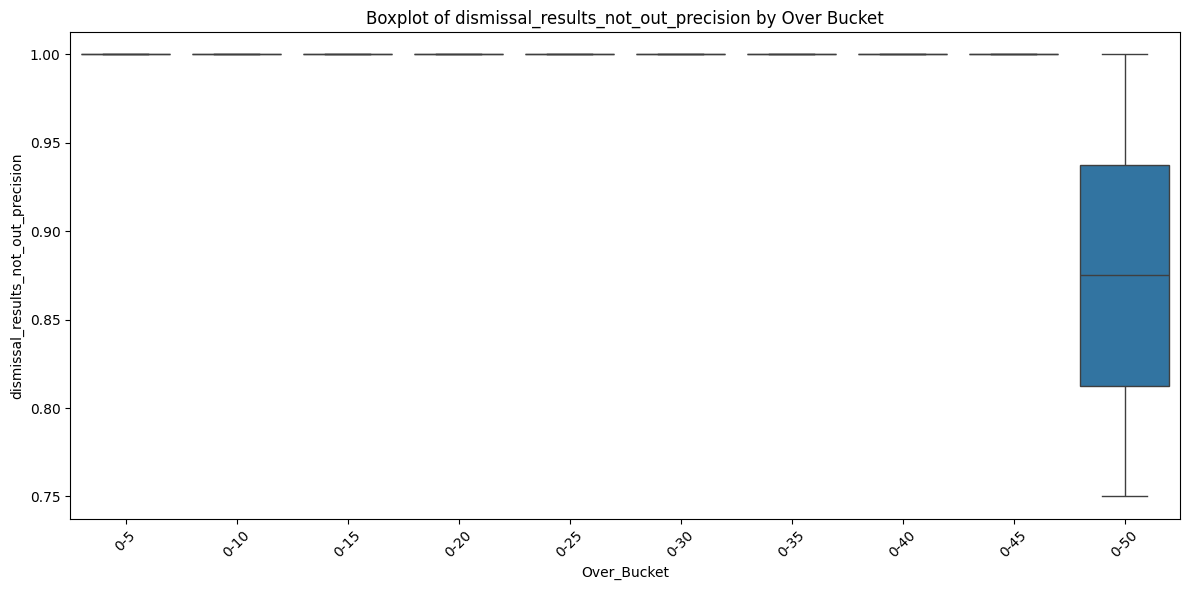

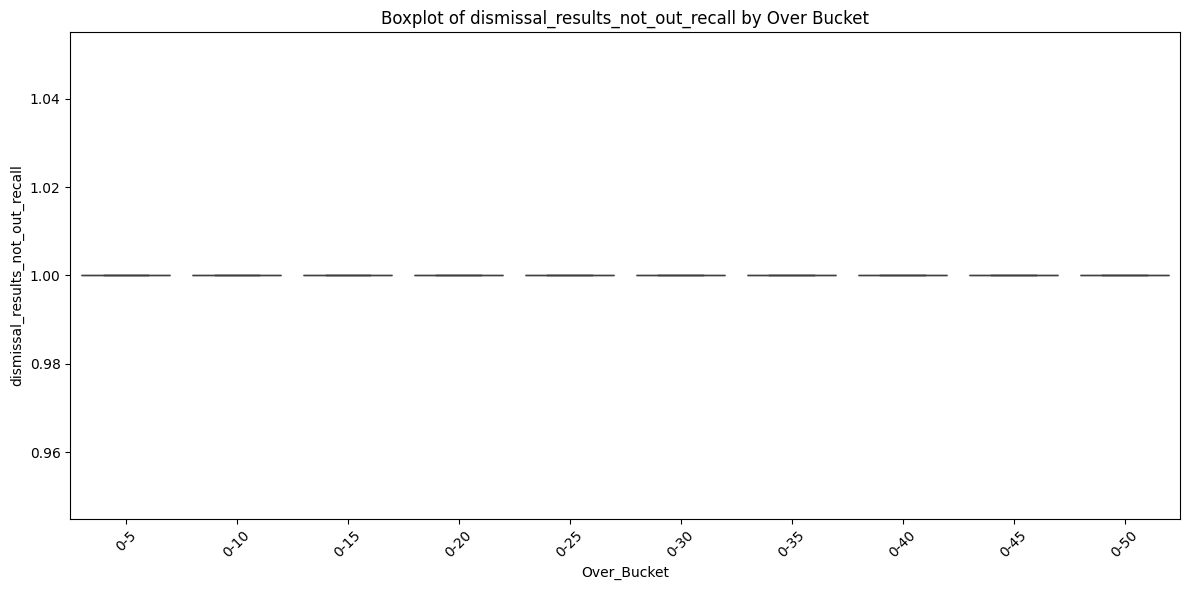

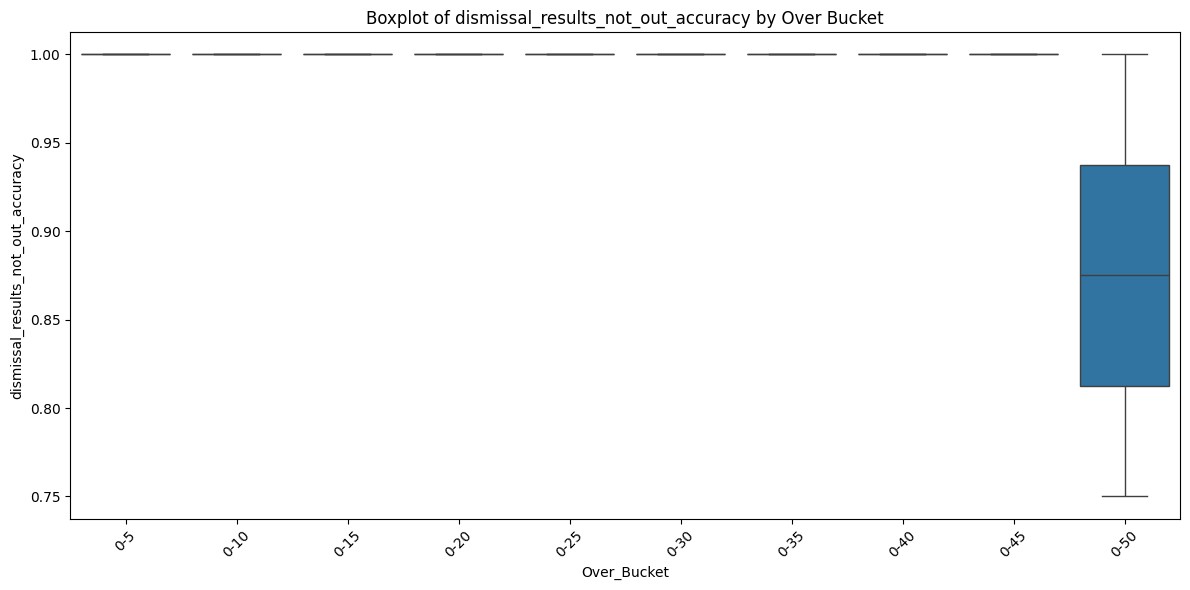

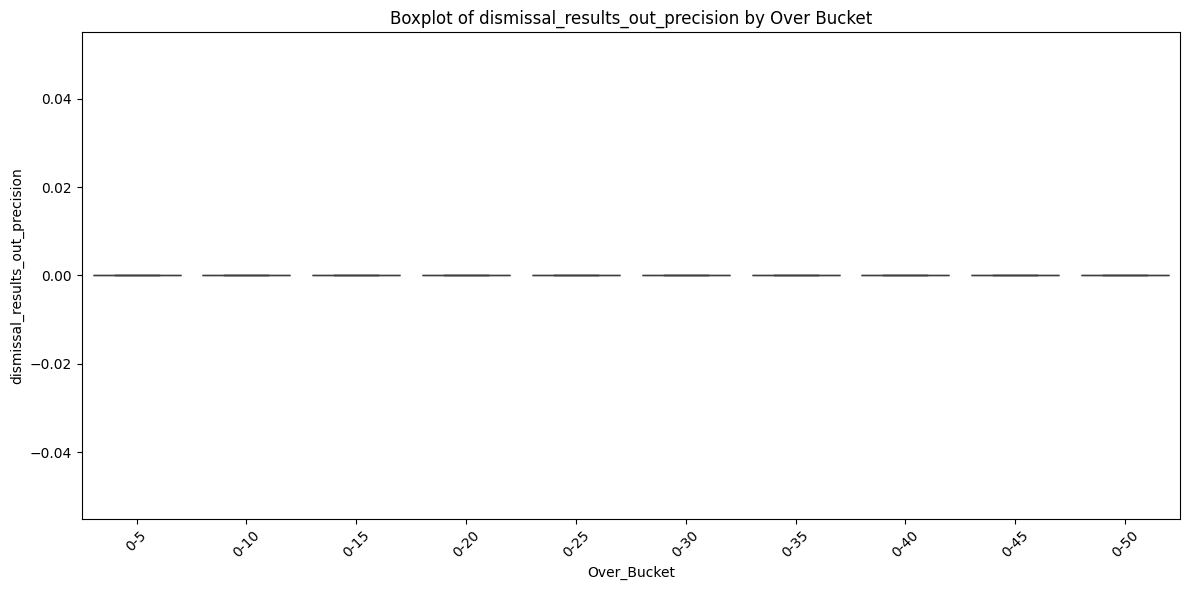

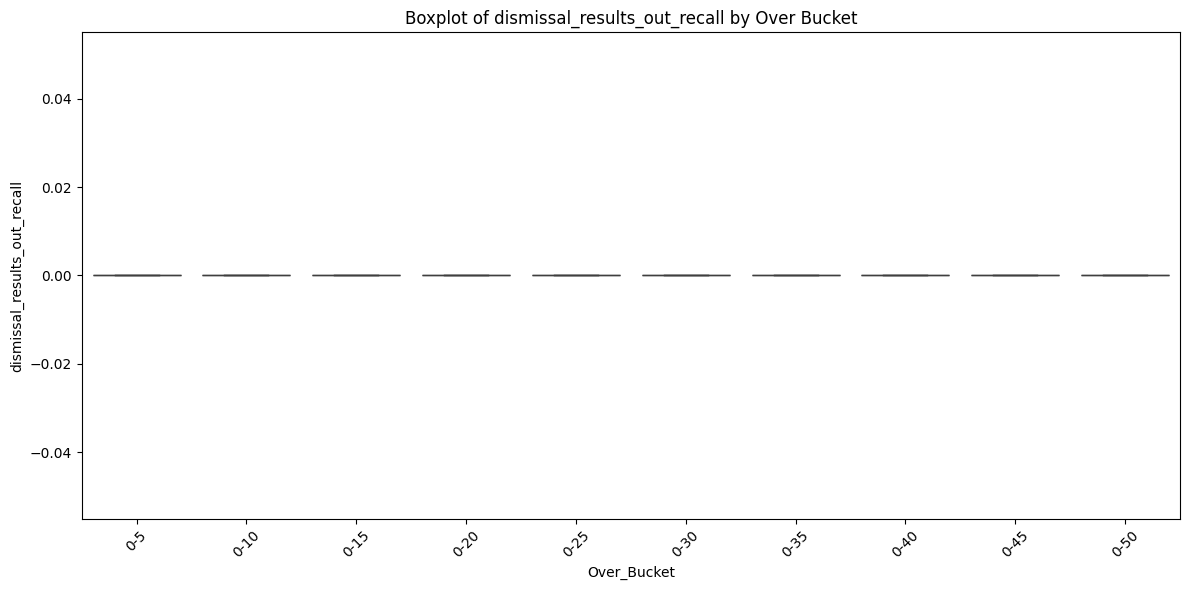

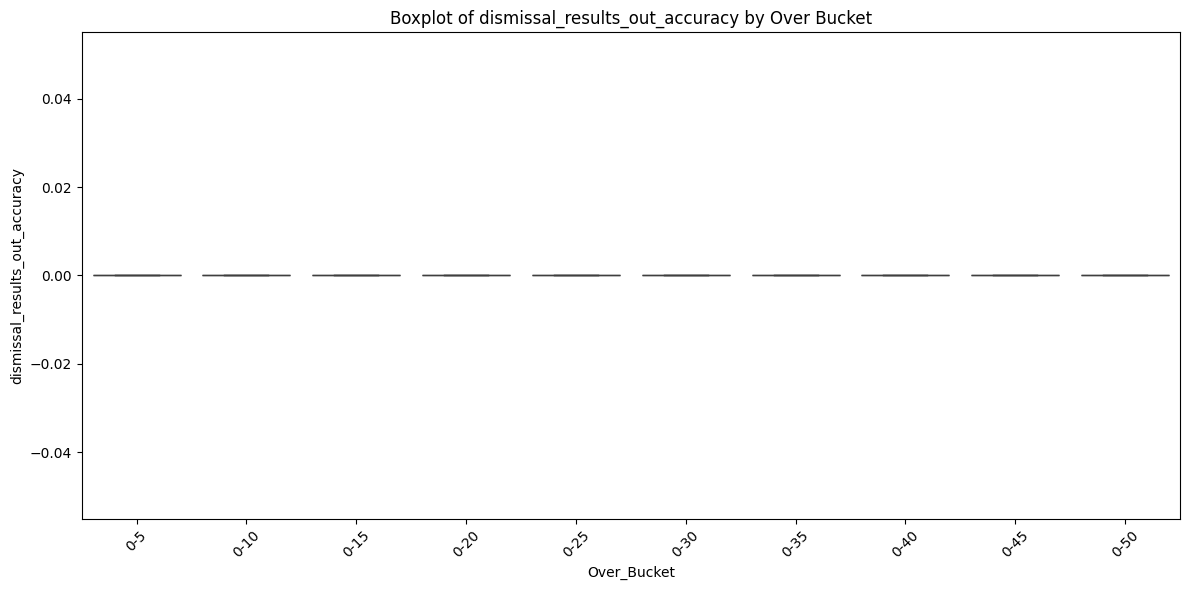

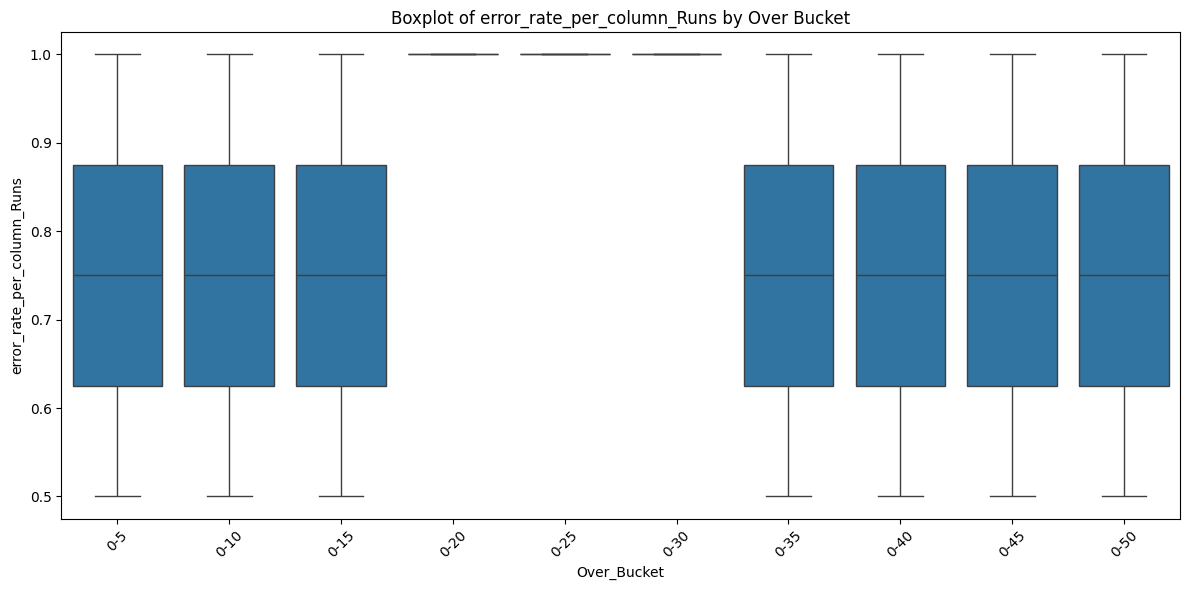

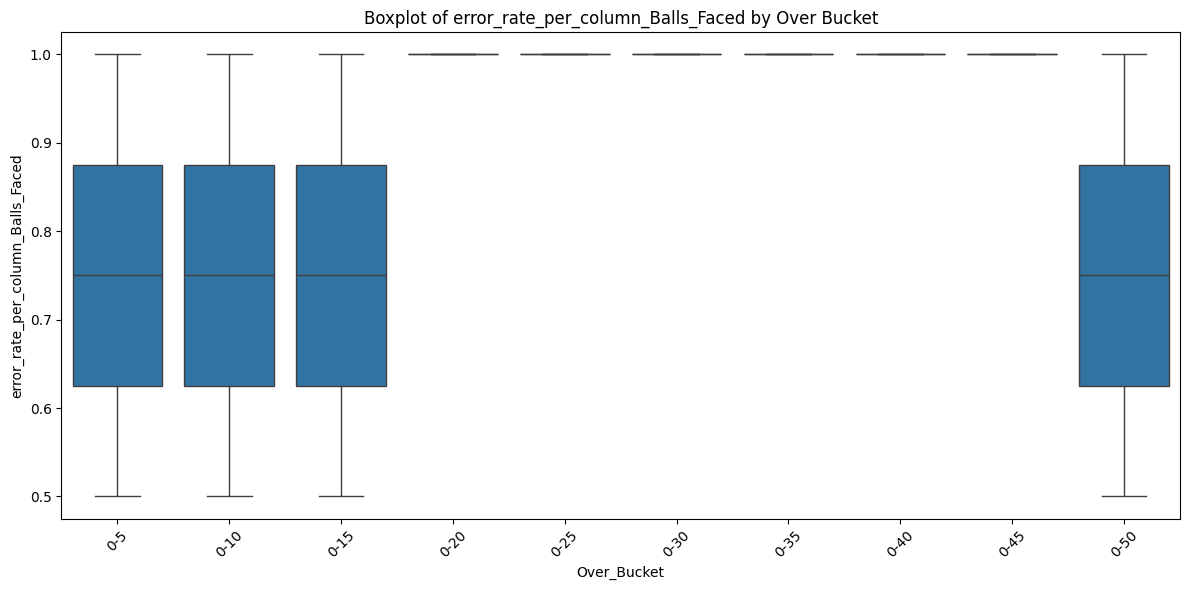

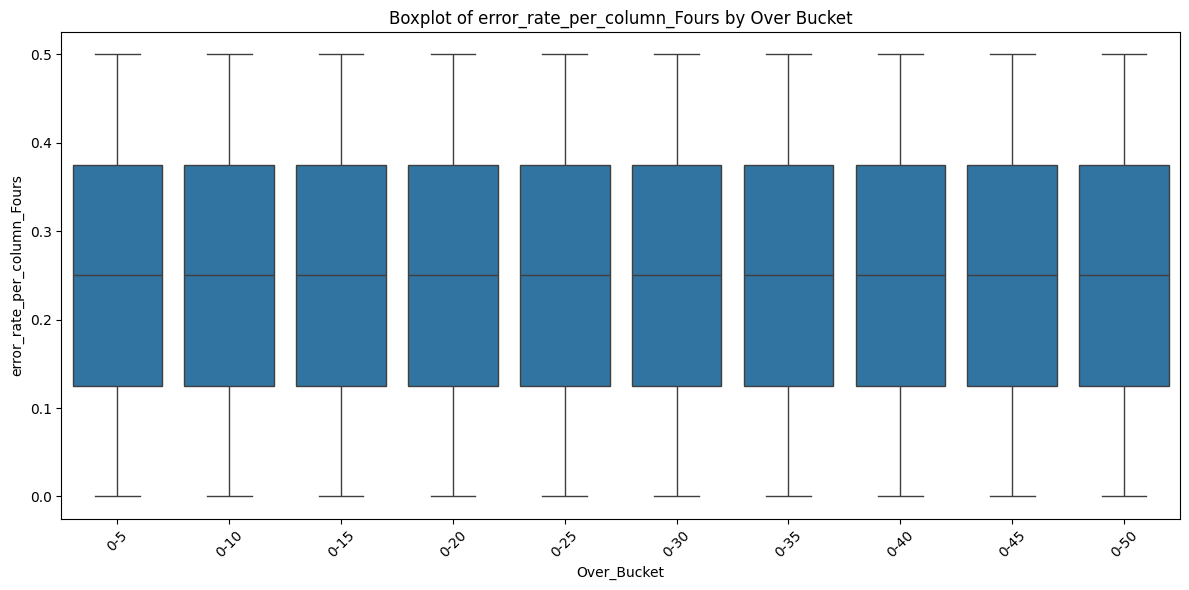

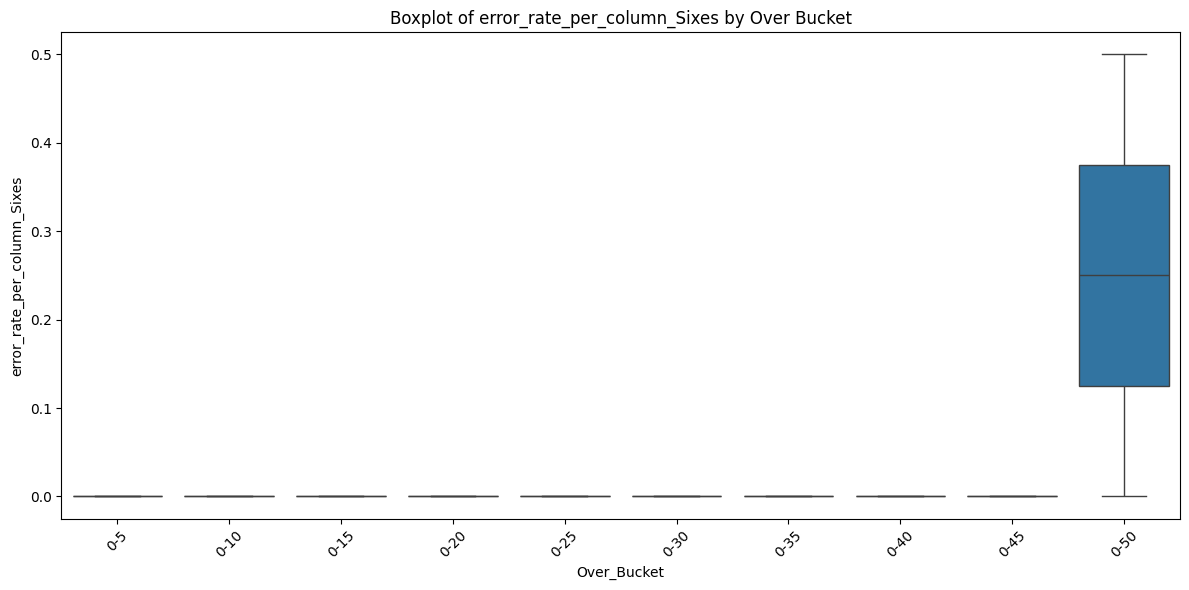

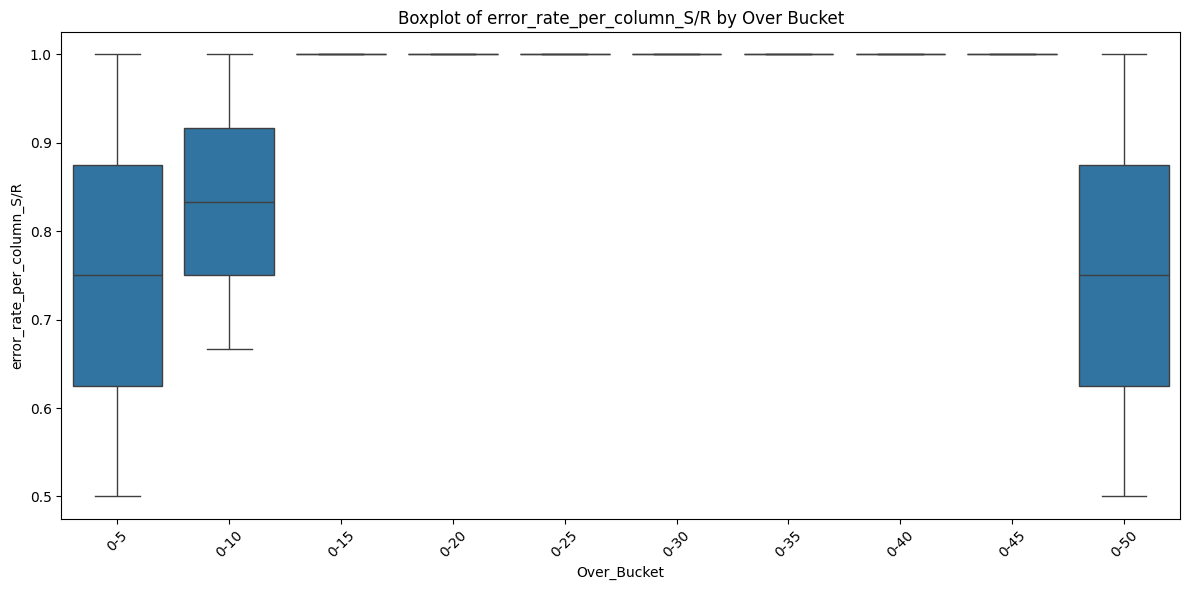

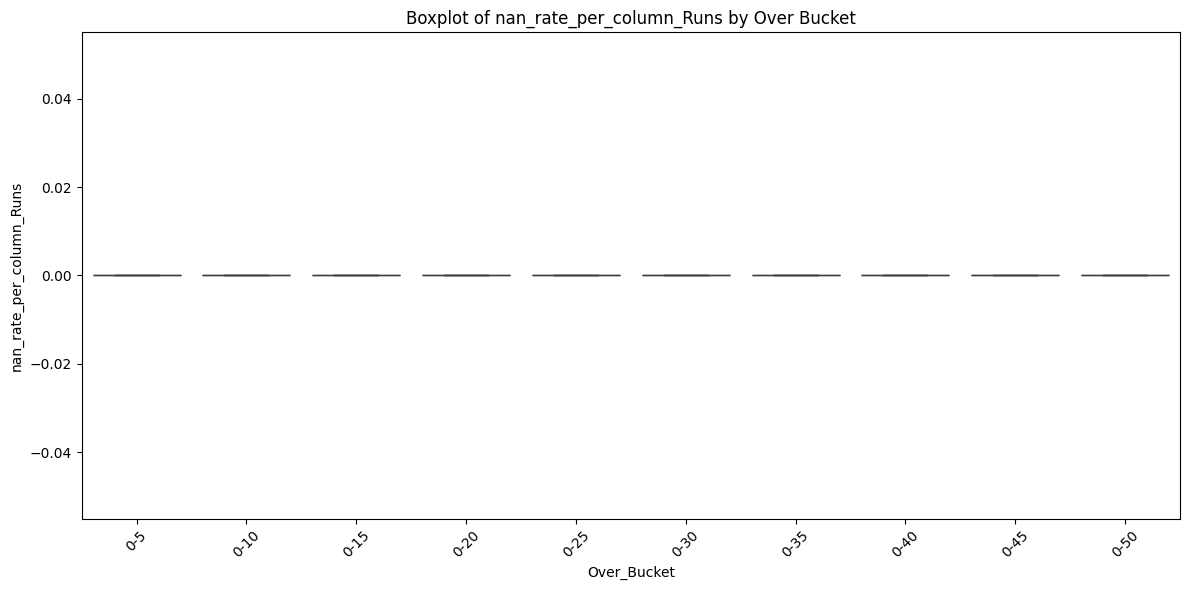

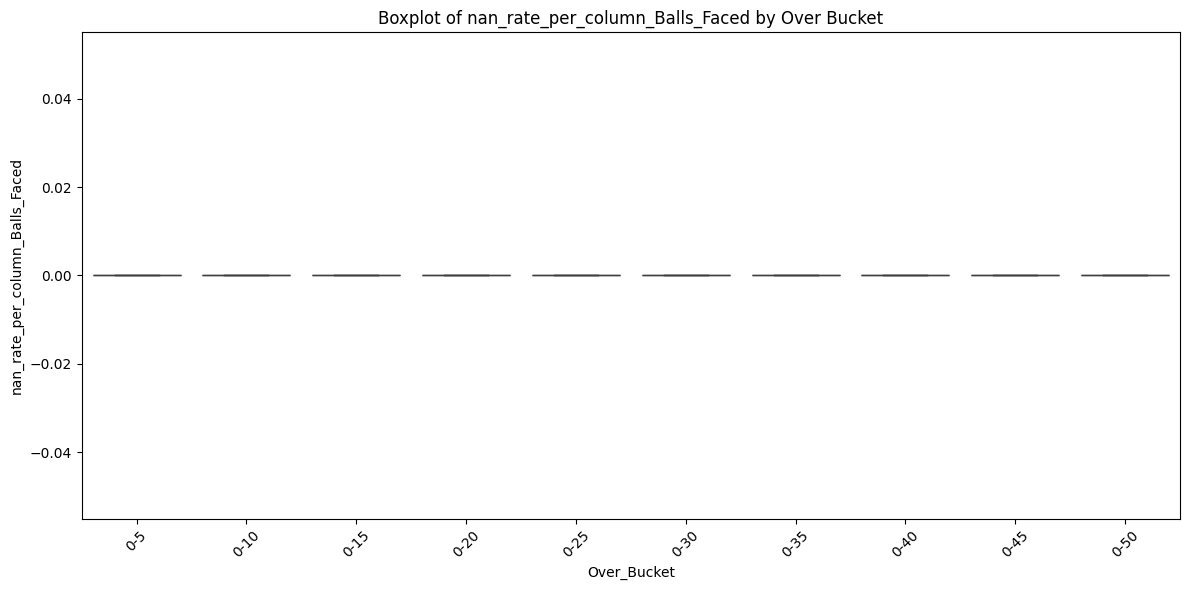

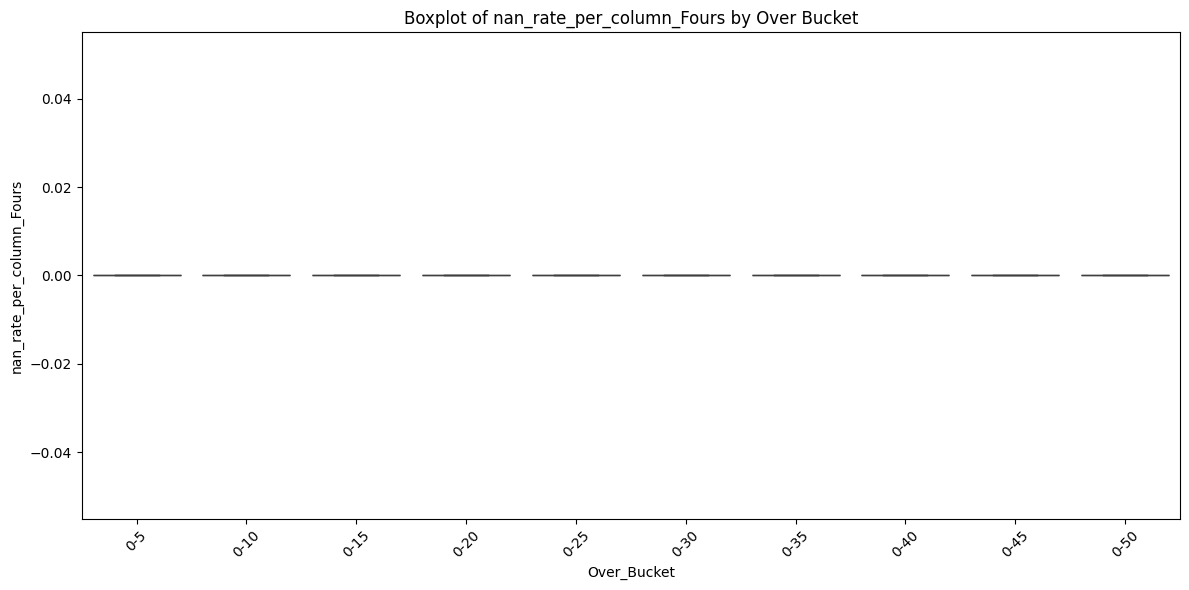

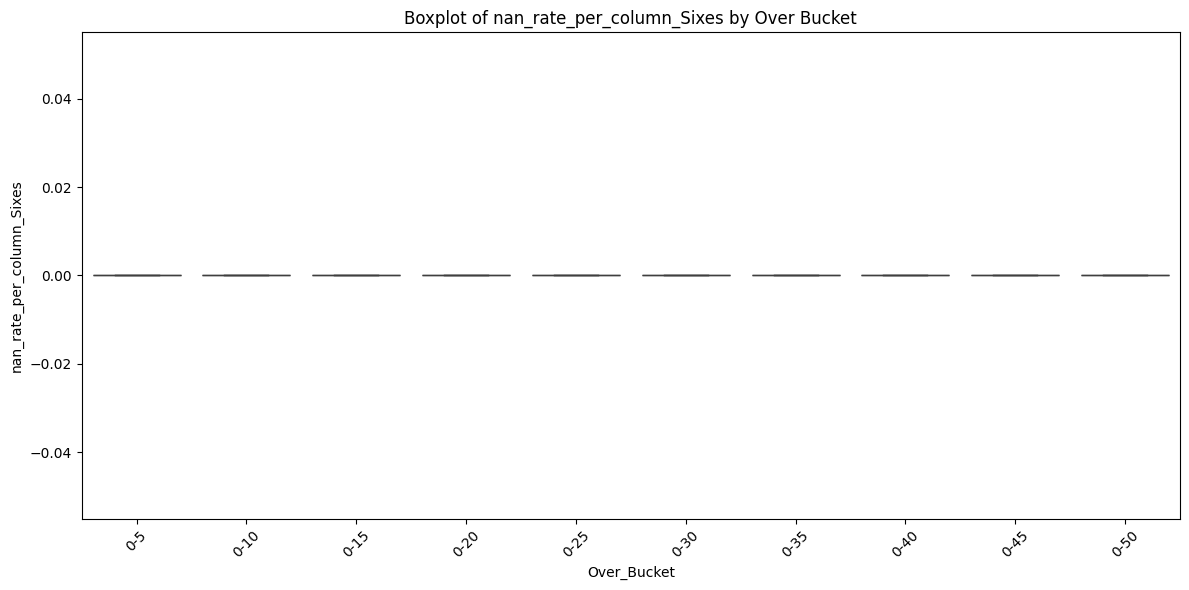

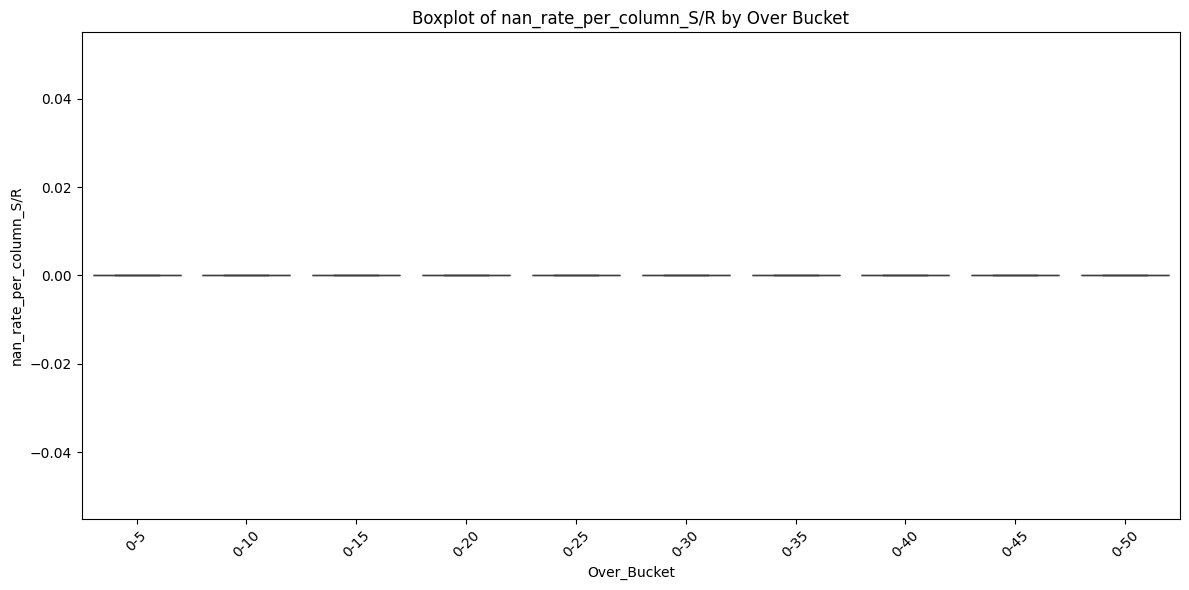

<Figure size 640x480 with 0 Axes>

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume grouped_q1 and grouped_q3 are already loaded in the environment
# We concatenate them first (with a column indicating quantile)
grouped_q1['Quantile'] = 'Q1'
grouped_q3['Quantile'] = 'Q3'
combined = pd.concat([grouped_q1, grouped_q3])

# Convert Over_Bucket to a categorical type to preserve ordering in plots
sorted_buckets = sorted(combined['Over_Bucket'].unique(), key=lambda x: int(str(x).split('-')[1]))


combined['Over_Bucket'] = pd.Categorical(combined['Over_Bucket'], ordered=True, categories=sorted_buckets)

# Plot 1: Boxplot for row_error by Over_Bucket
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined, x='Over_Bucket', y='row_error')
plt.title('Boxplot of Row Error Rate by Over Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Boxplots for other numeric columns (excluding Over_Bucket, row_error, etc.)
exclude_cols = ['Over_Bucket', 'Last_Over', 'Overs', 'row_error', 'Quantile']
numeric_cols = [col for col in combined.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(combined[col])]

# Generate a grid of boxplots
num_cols = len(numeric_cols)
#fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(18, 5 * ((num_cols + 2) // 3)))
#axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    #if col.startswith('percentage') or col.startswith('error'):

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined, x='Over_Bucket', y=col)
    plt.title(f'Boxplot of {col} by Over Bucket')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plt.tight_layout()
plt.show()

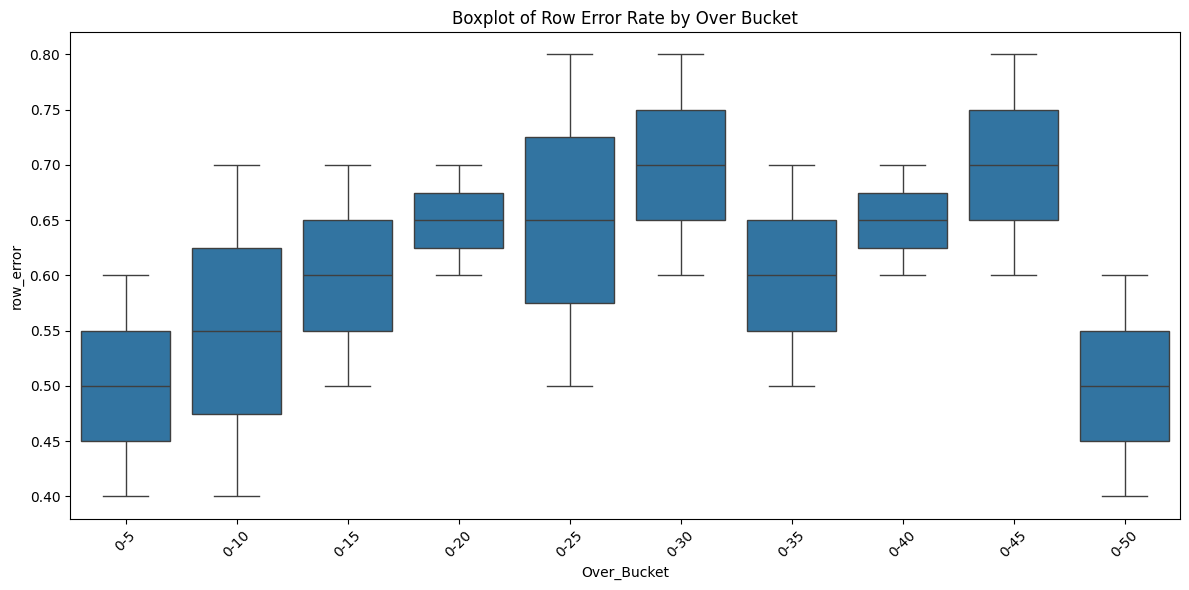

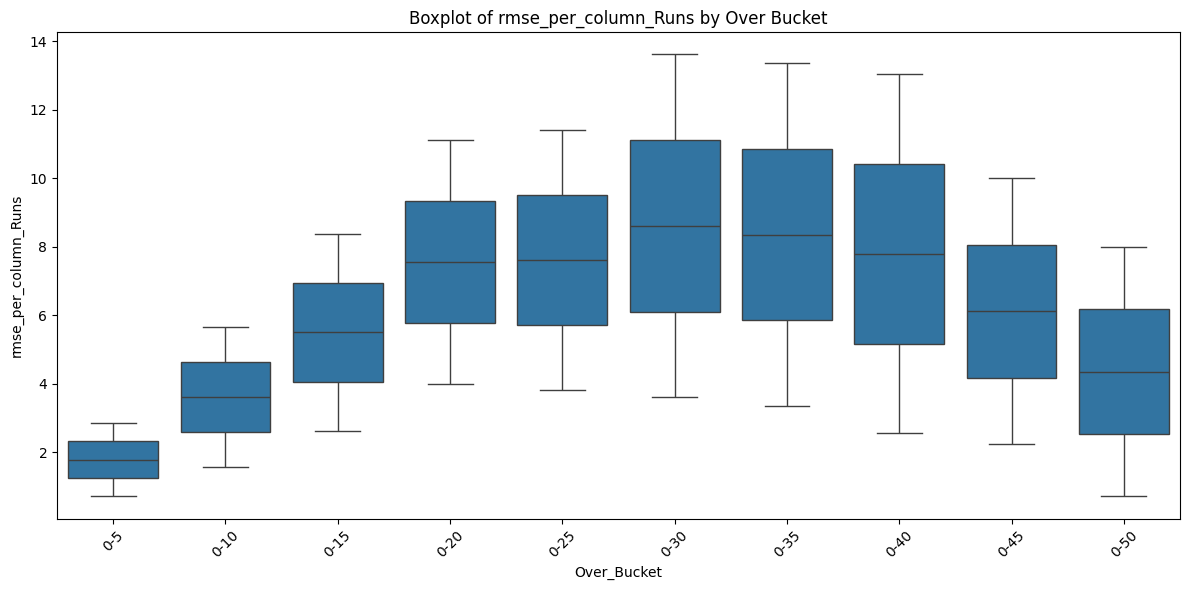

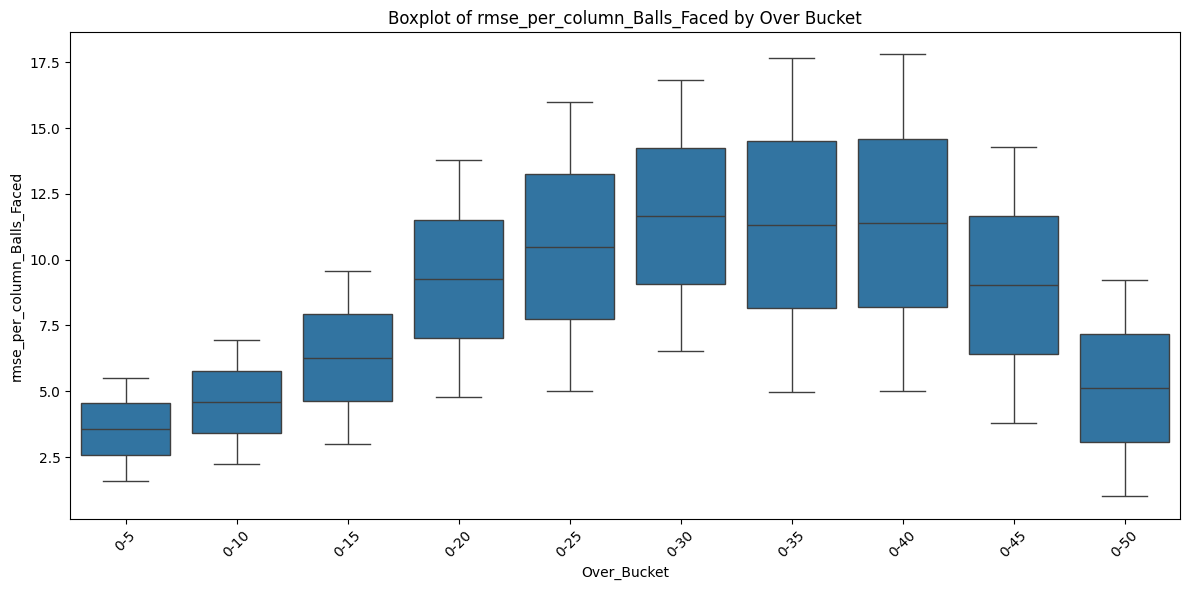

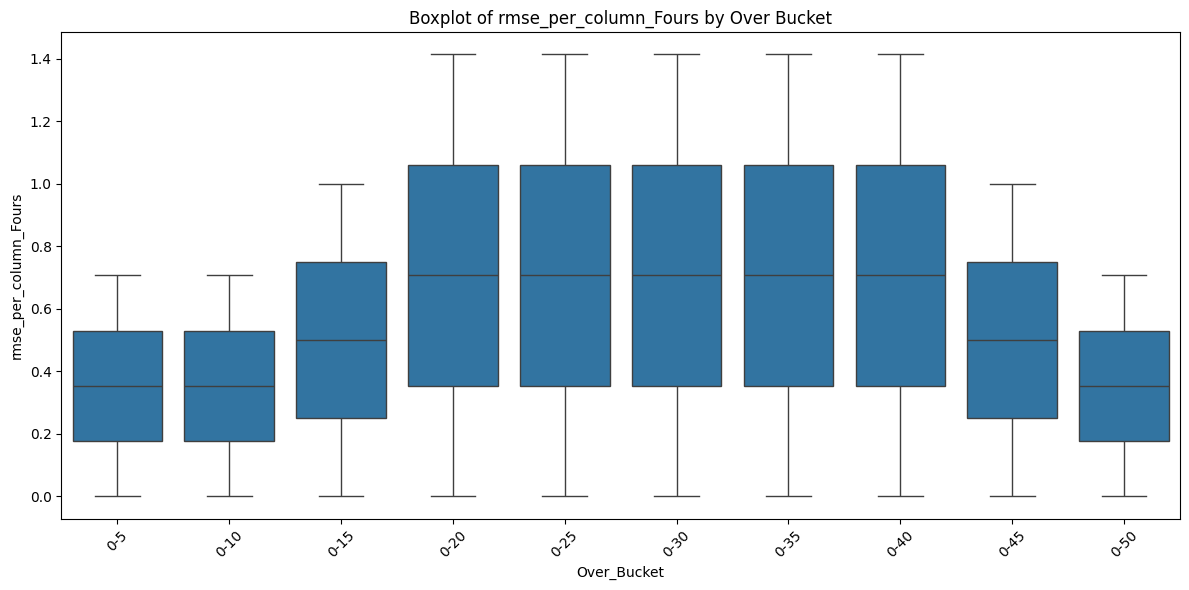

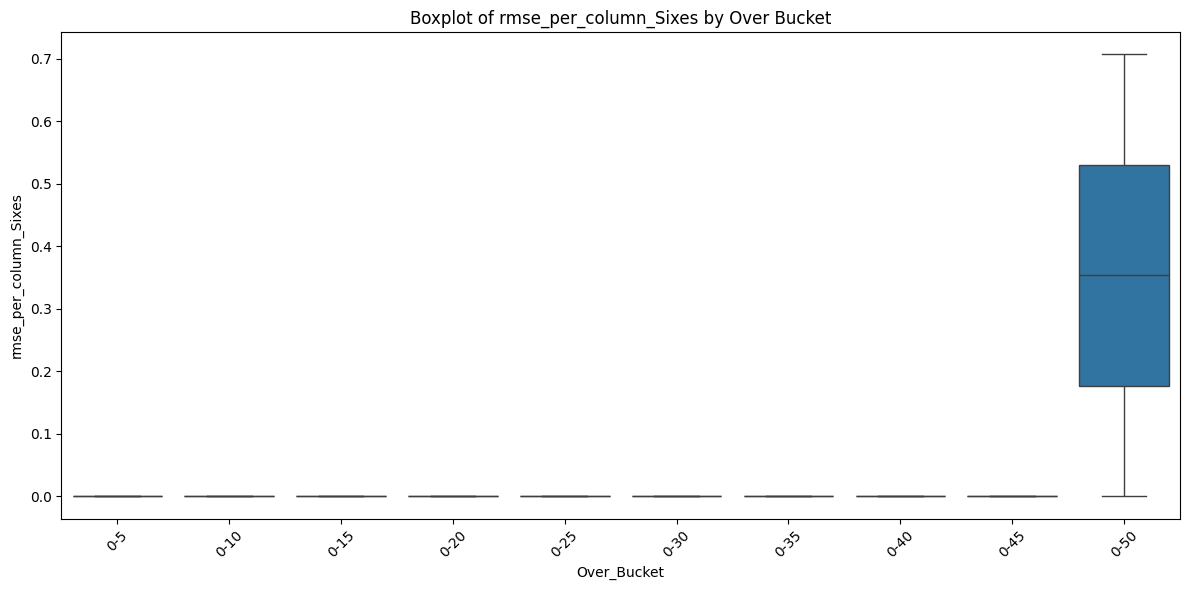

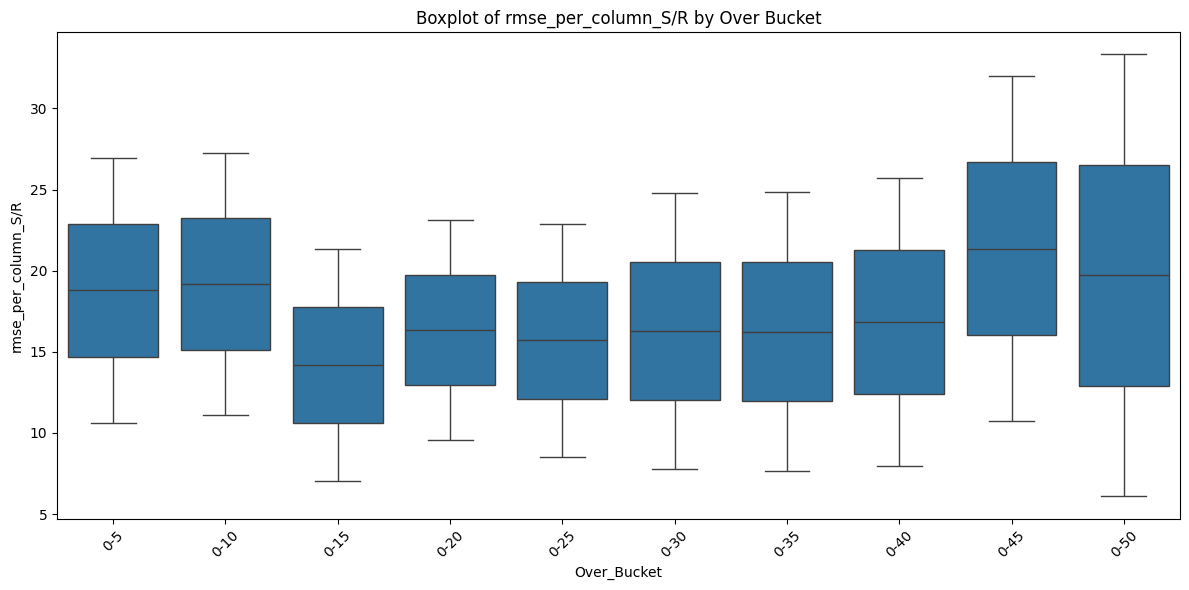

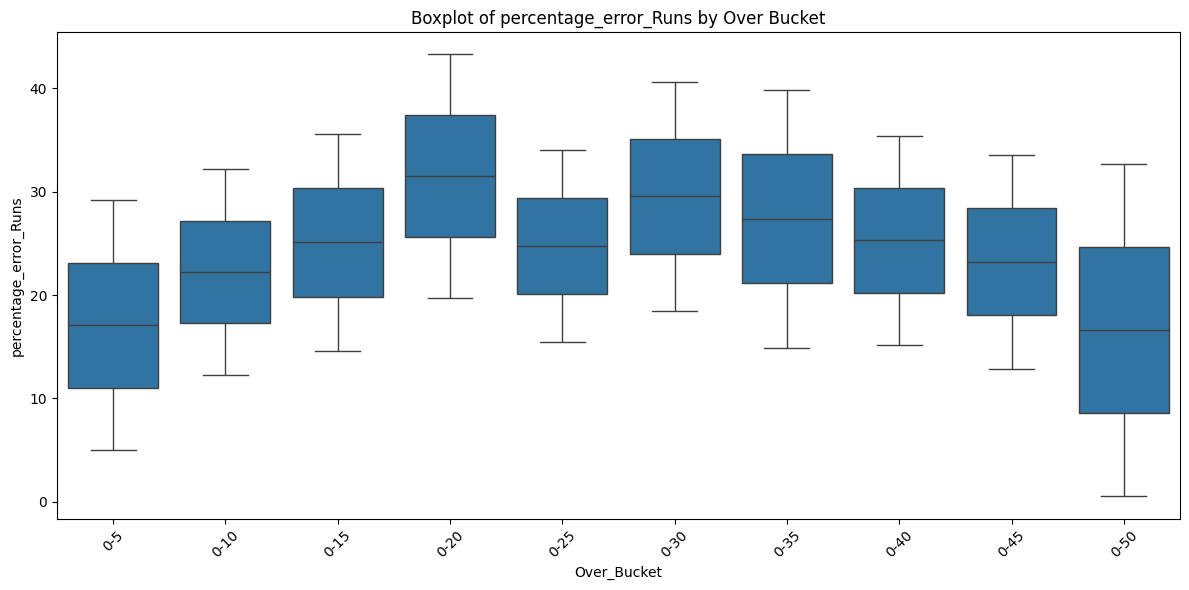

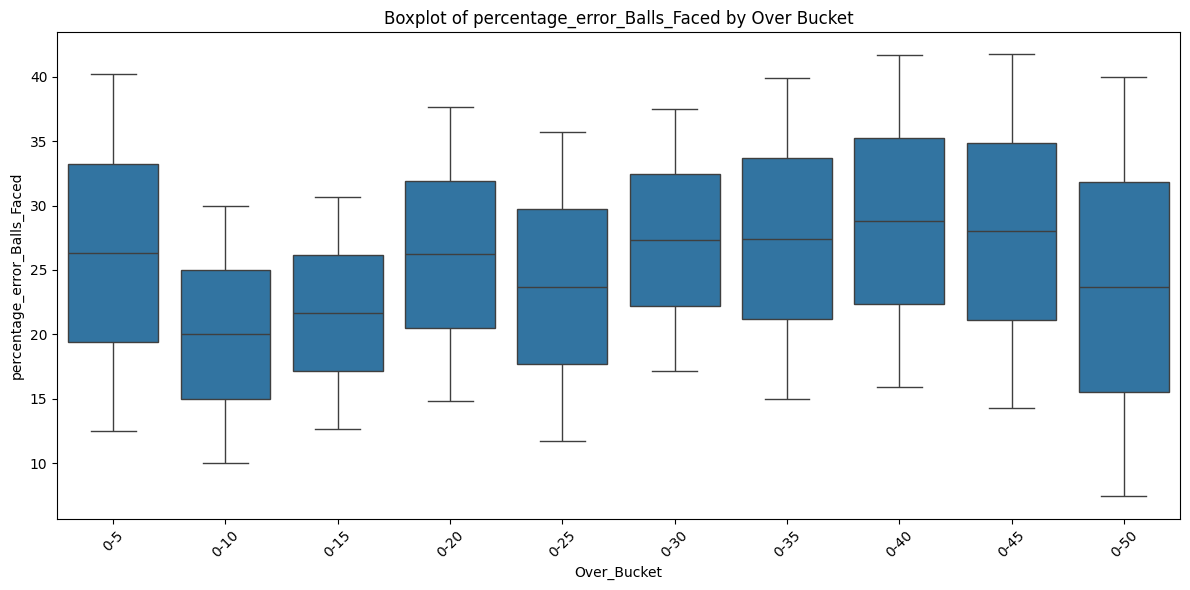

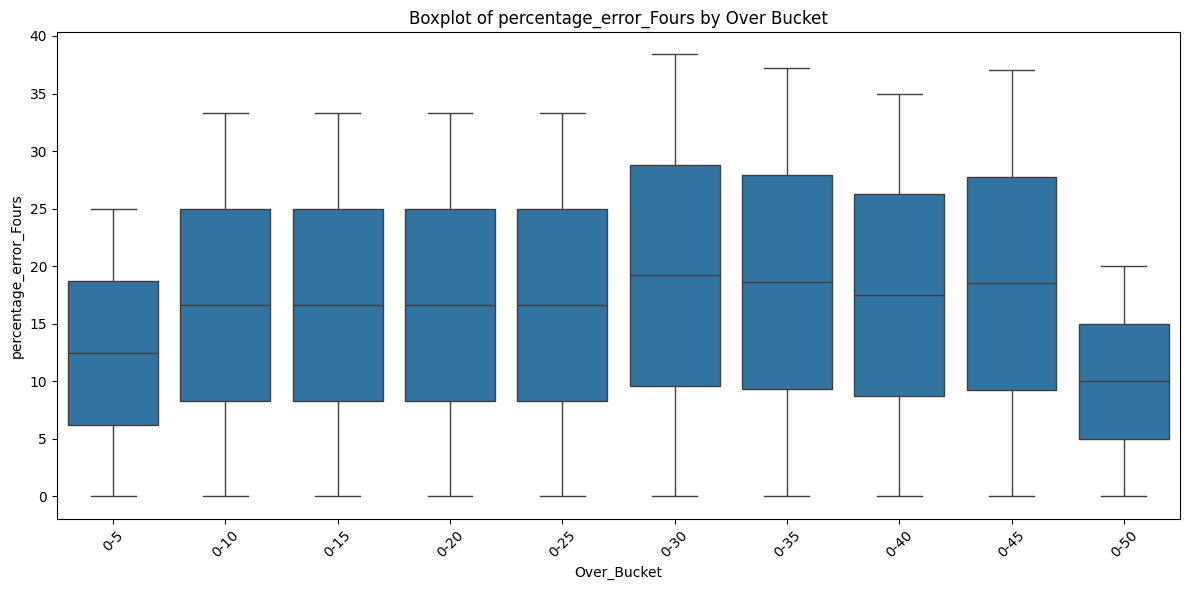

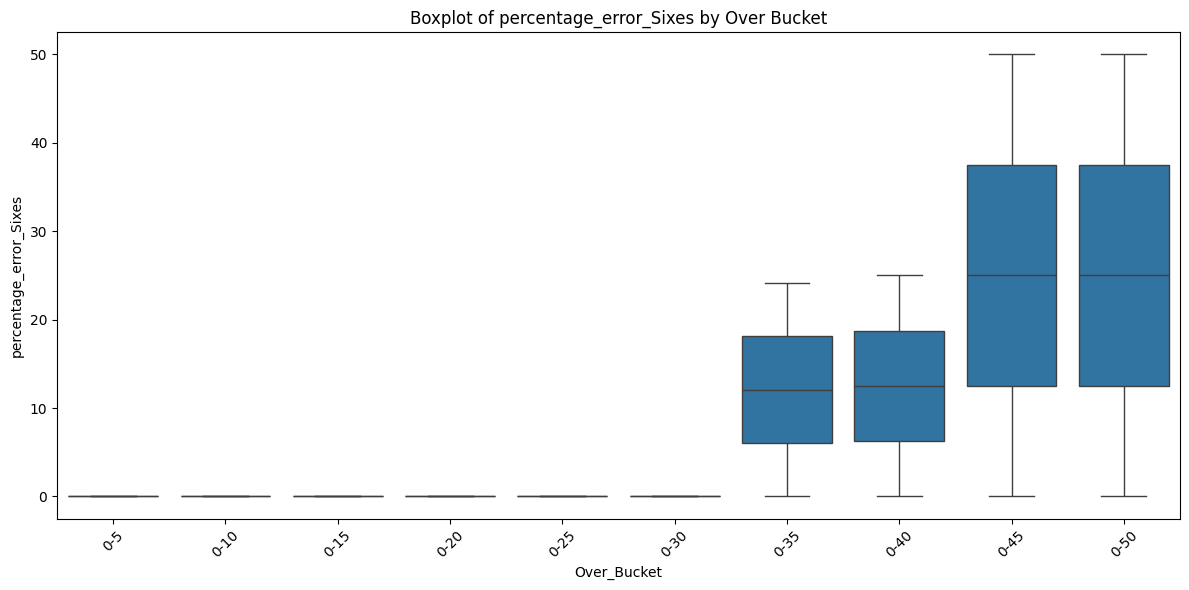

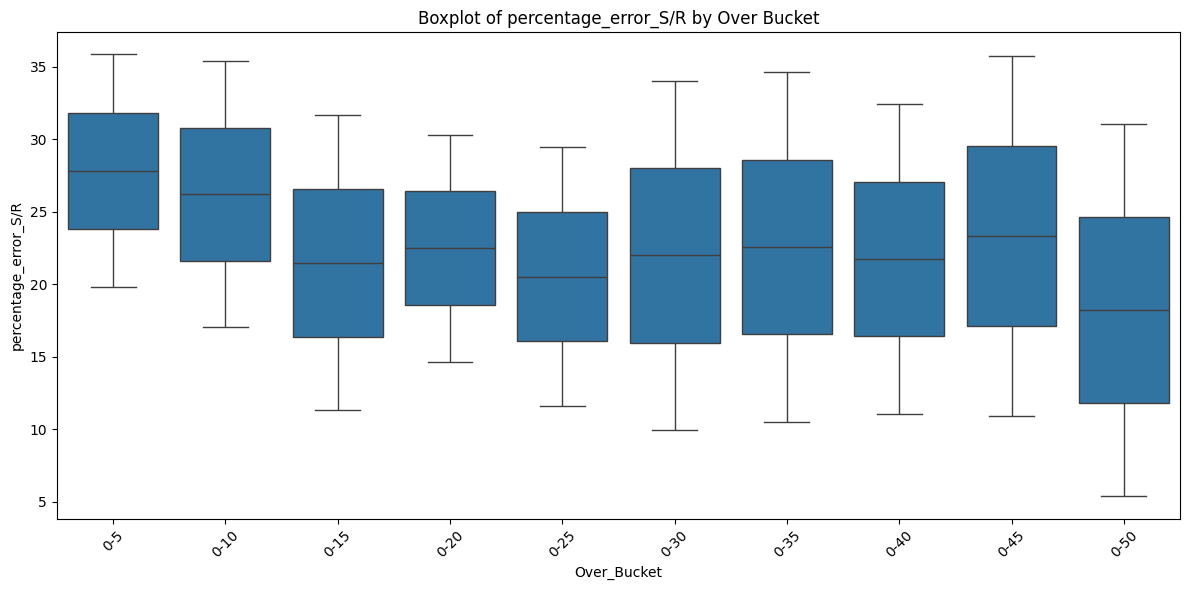

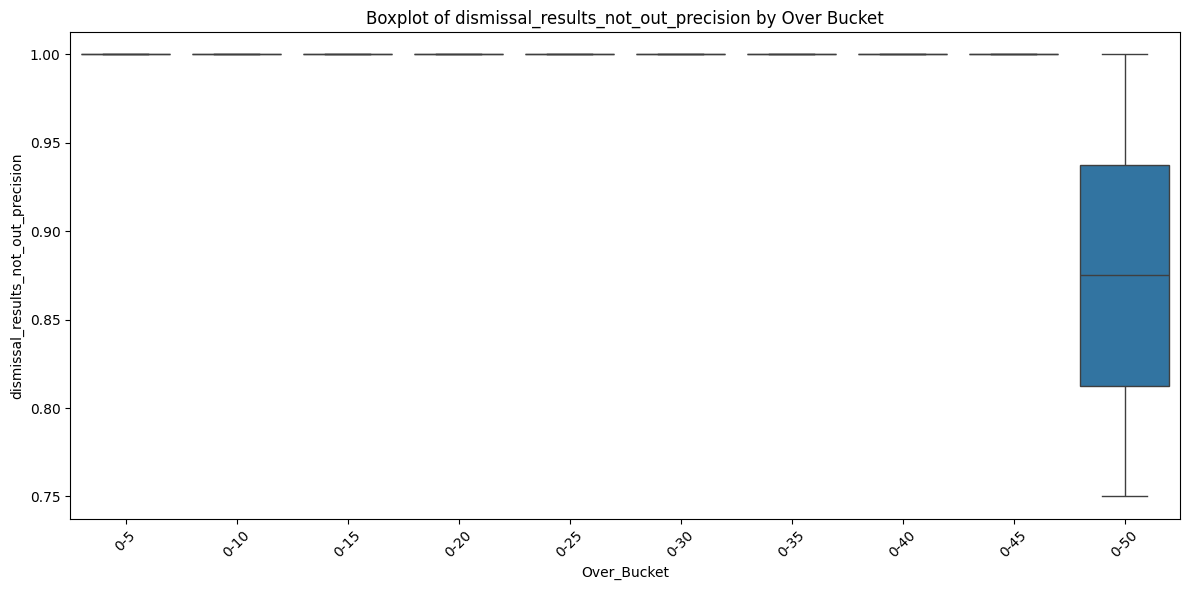

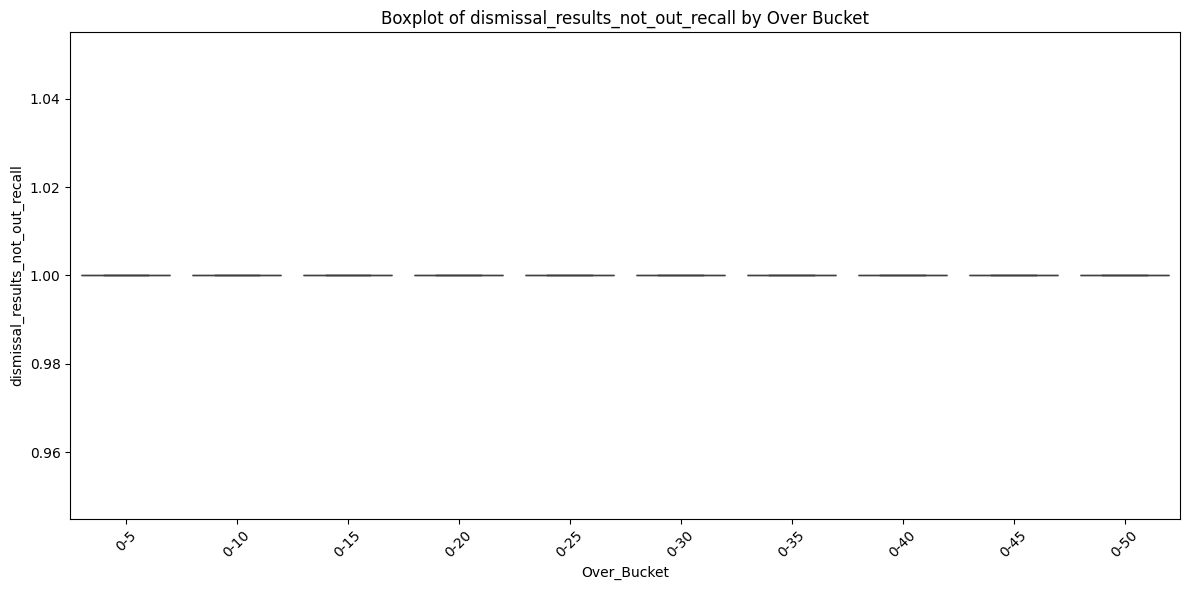

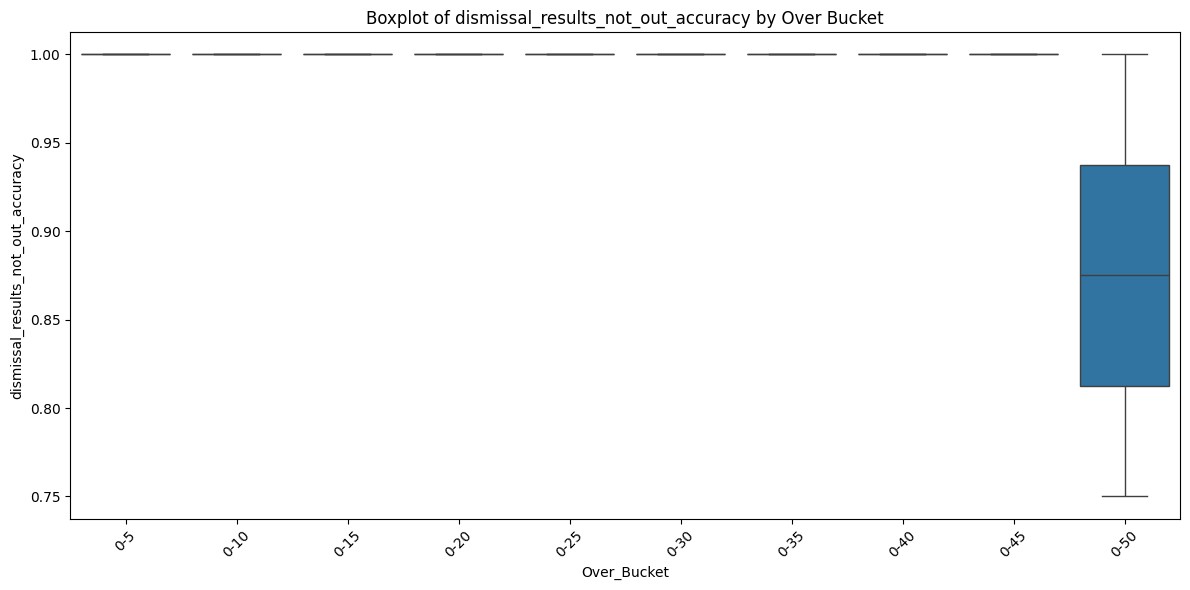

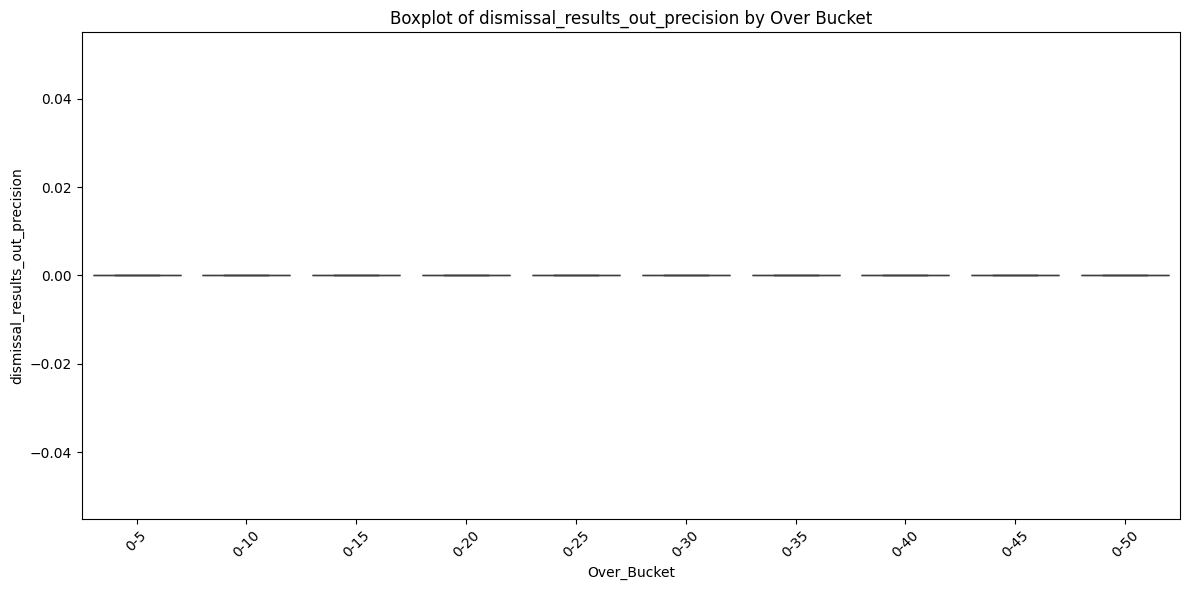

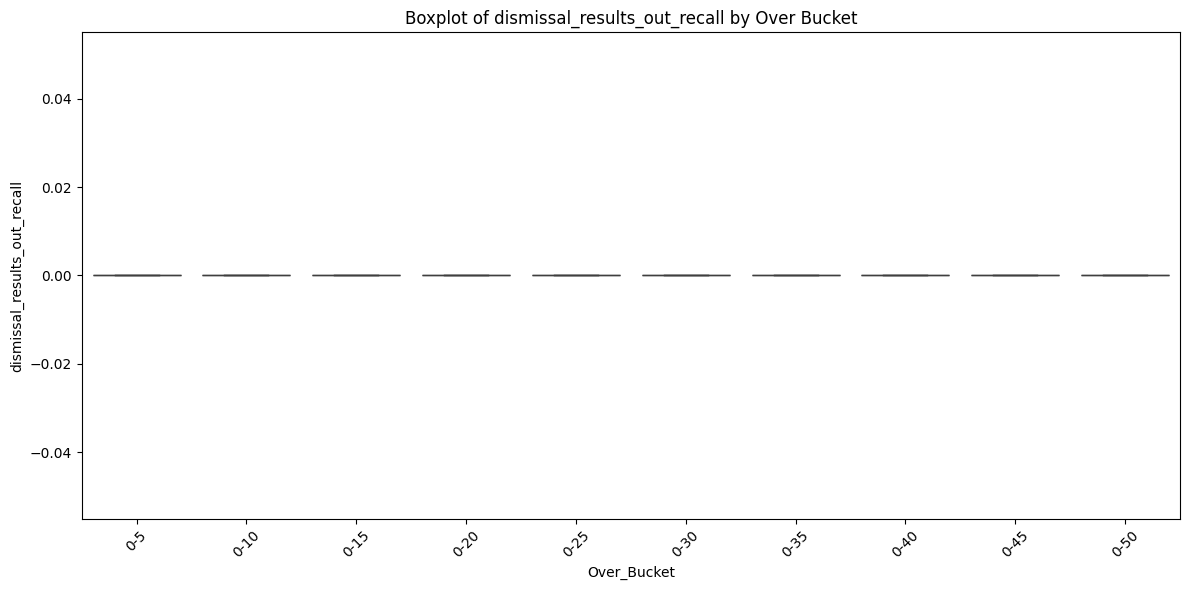

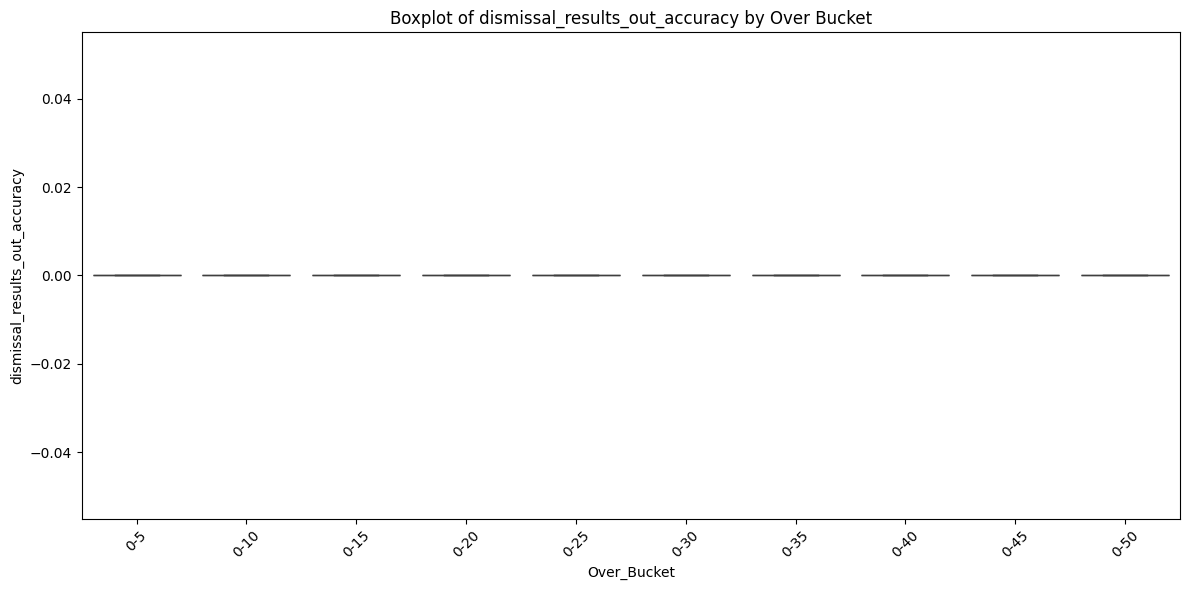

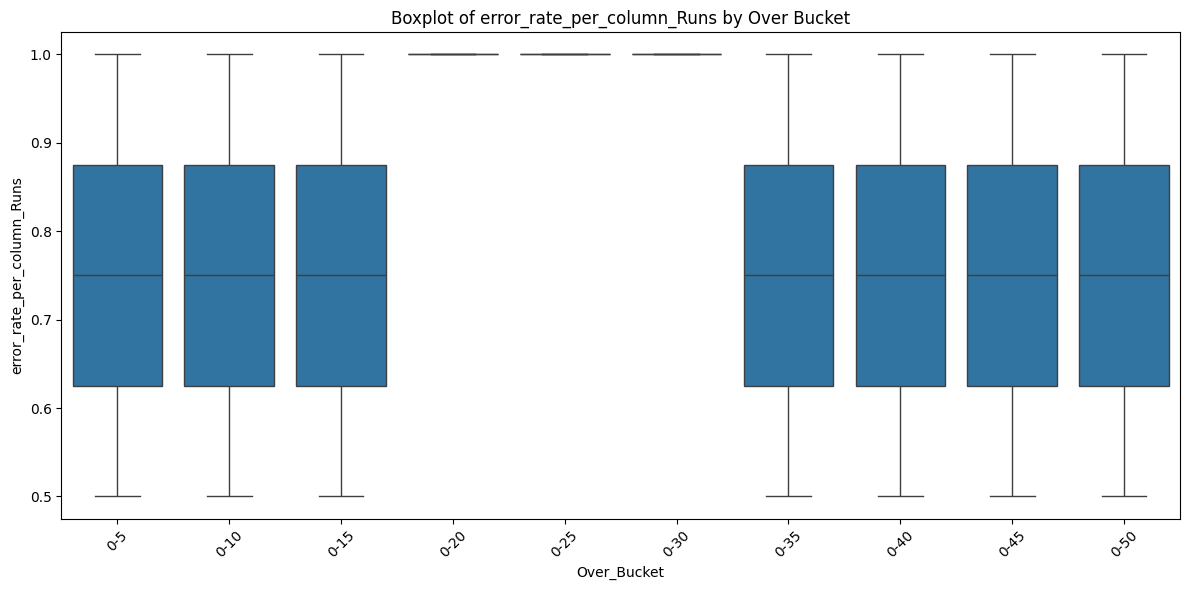

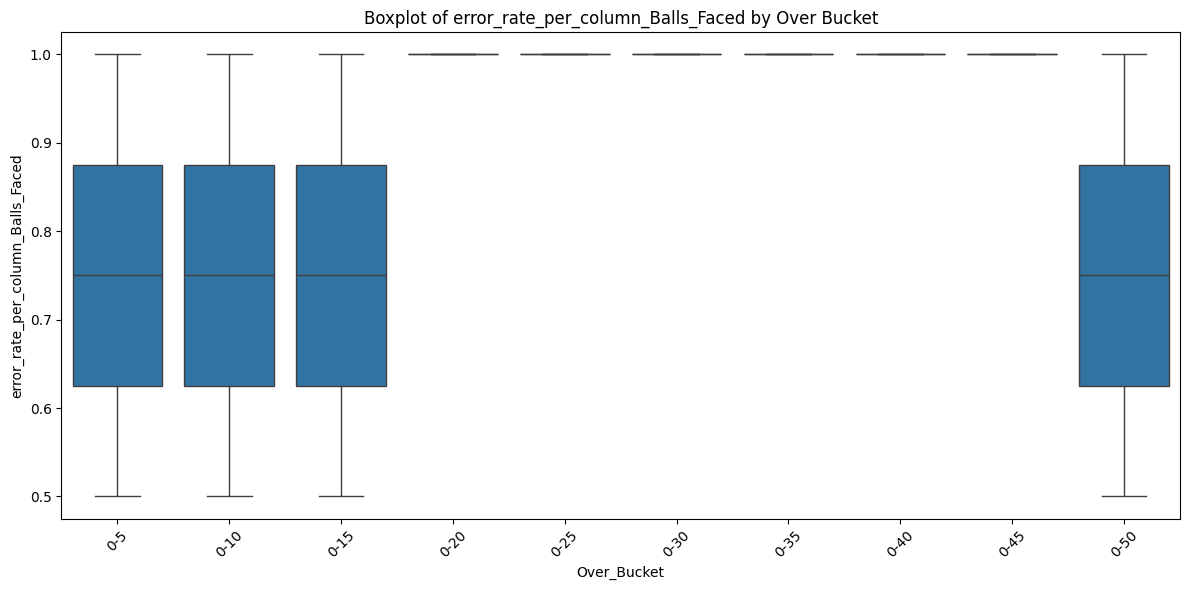

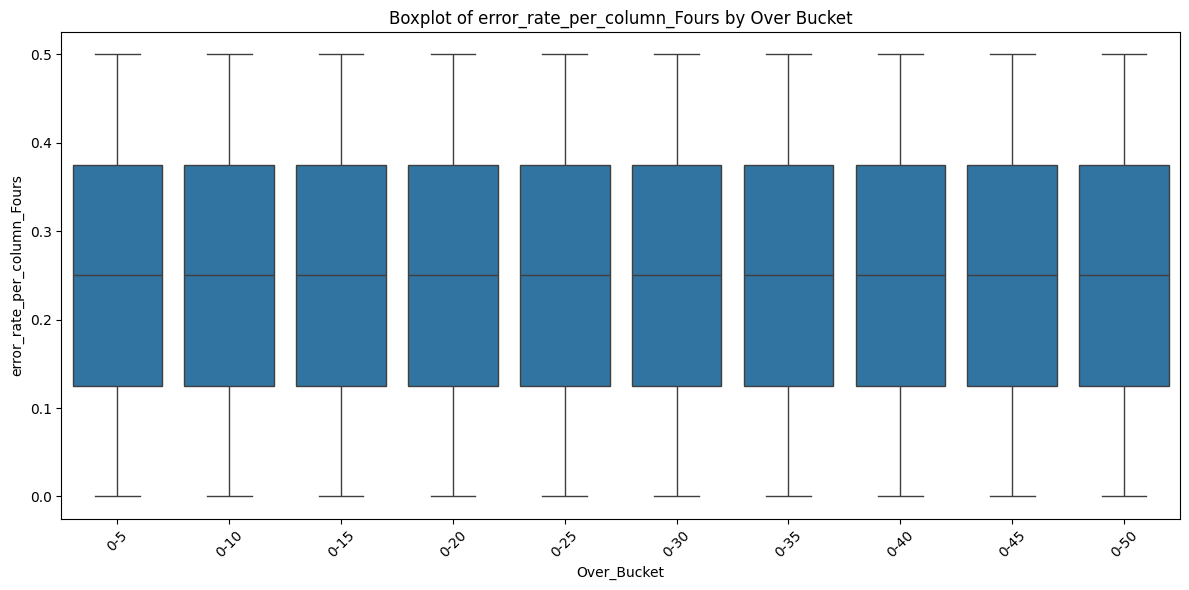

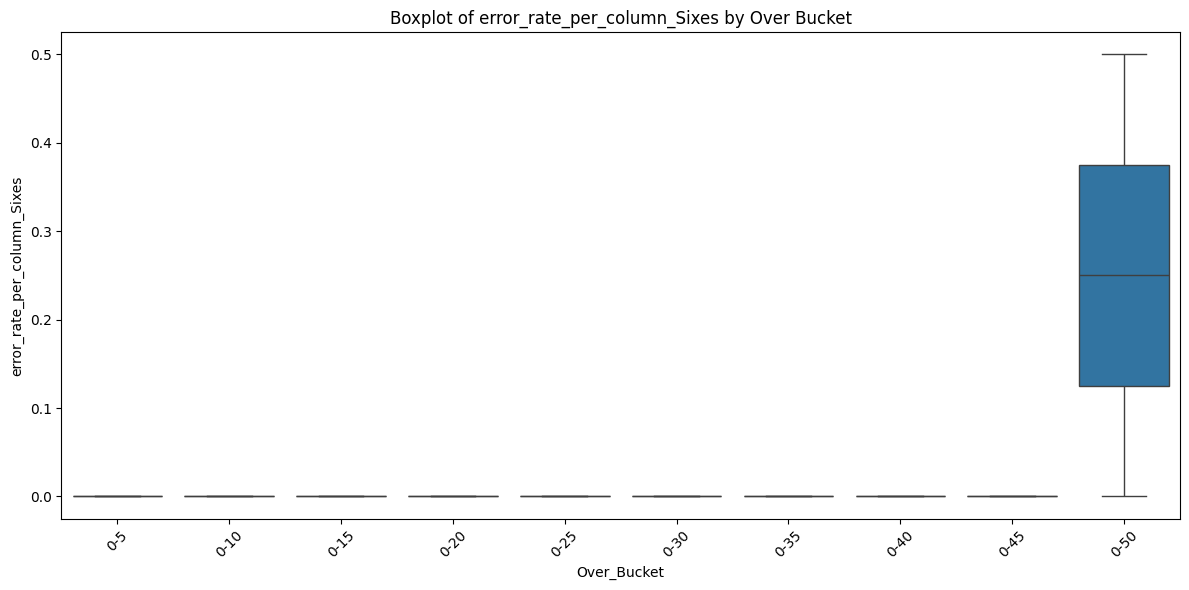

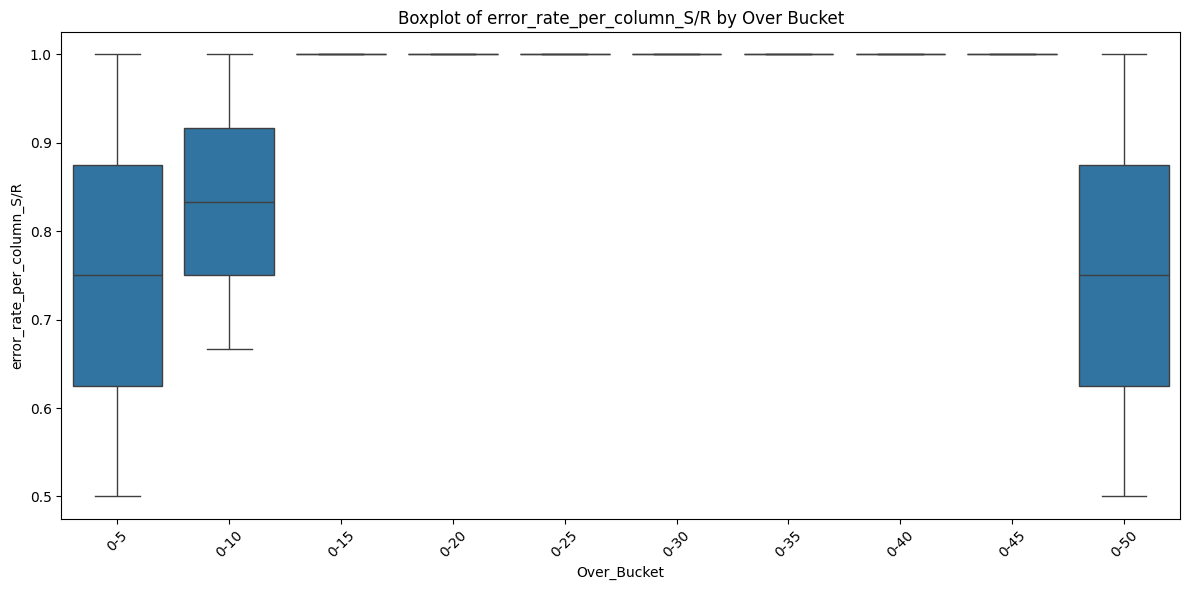

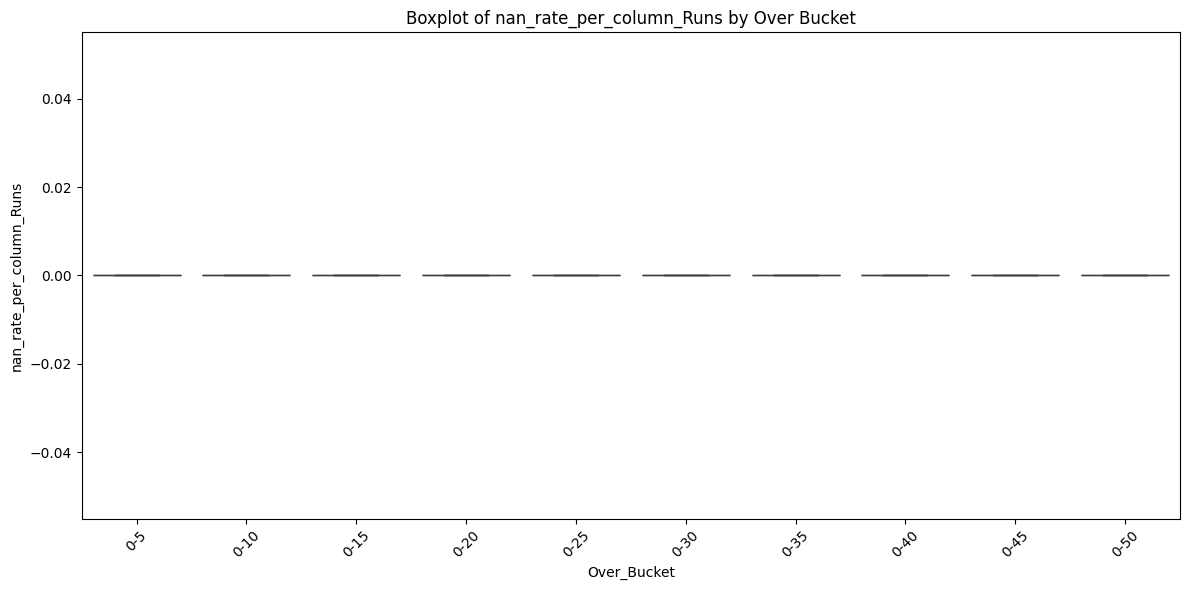

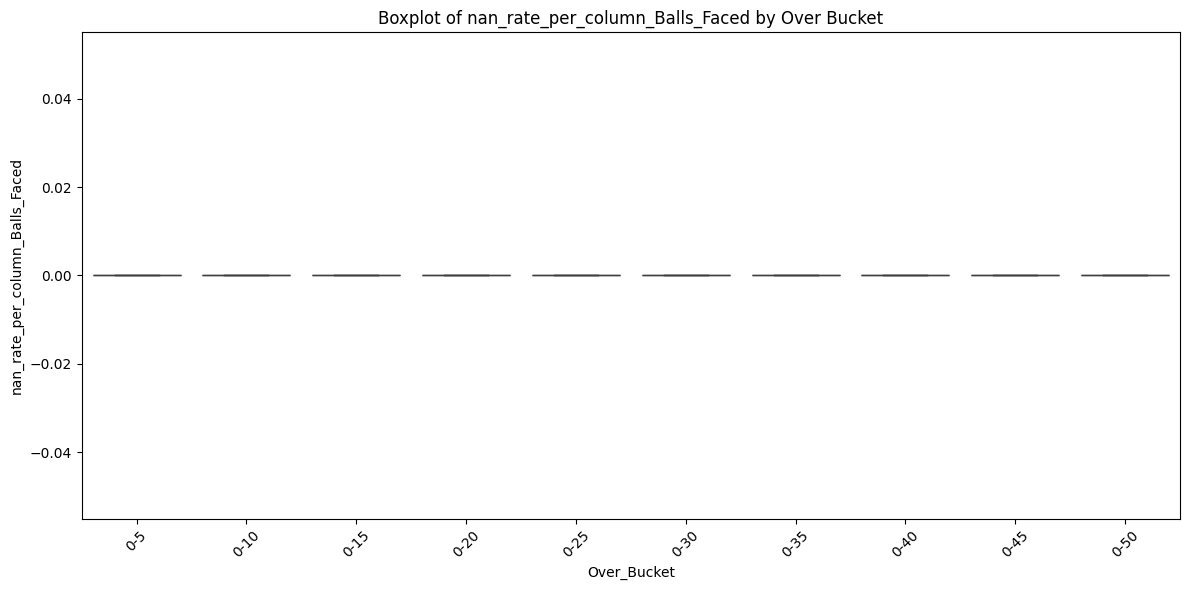

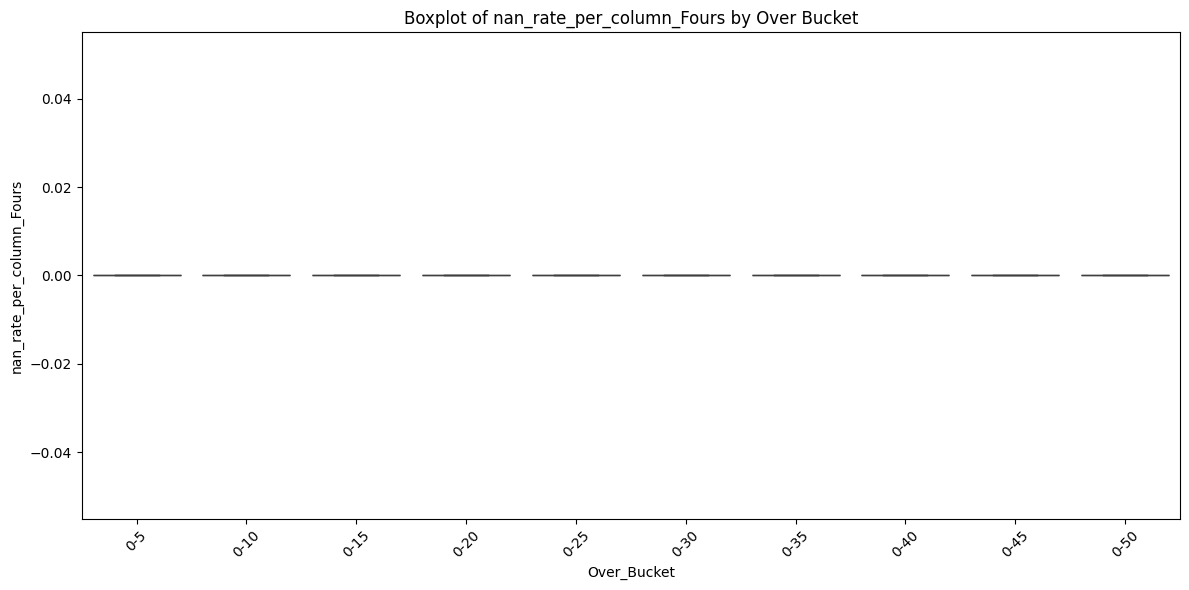

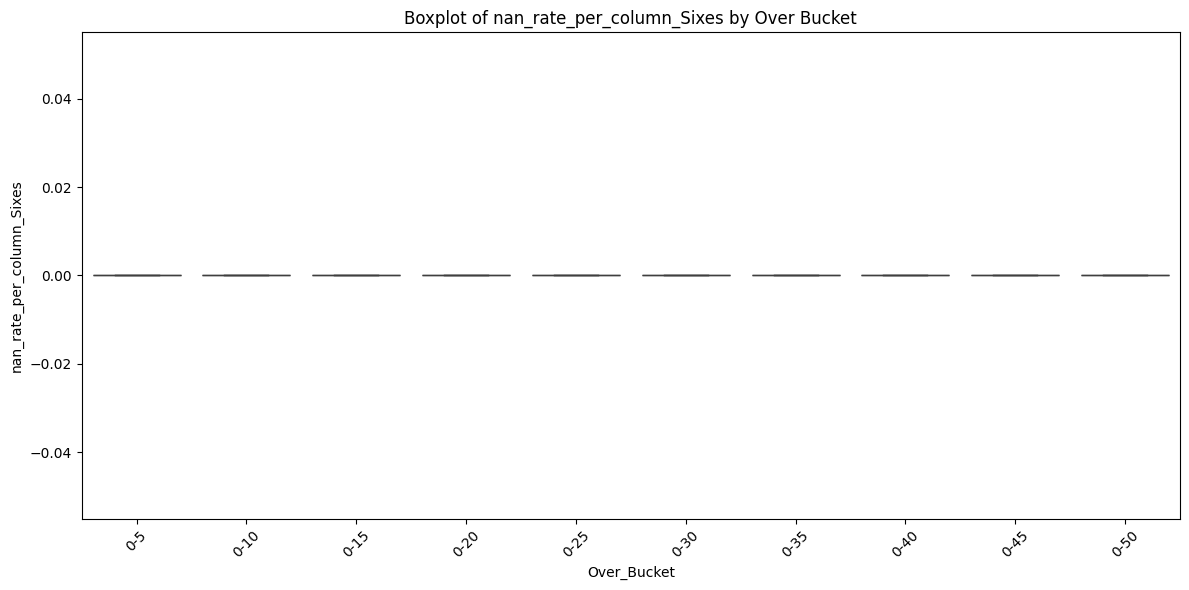

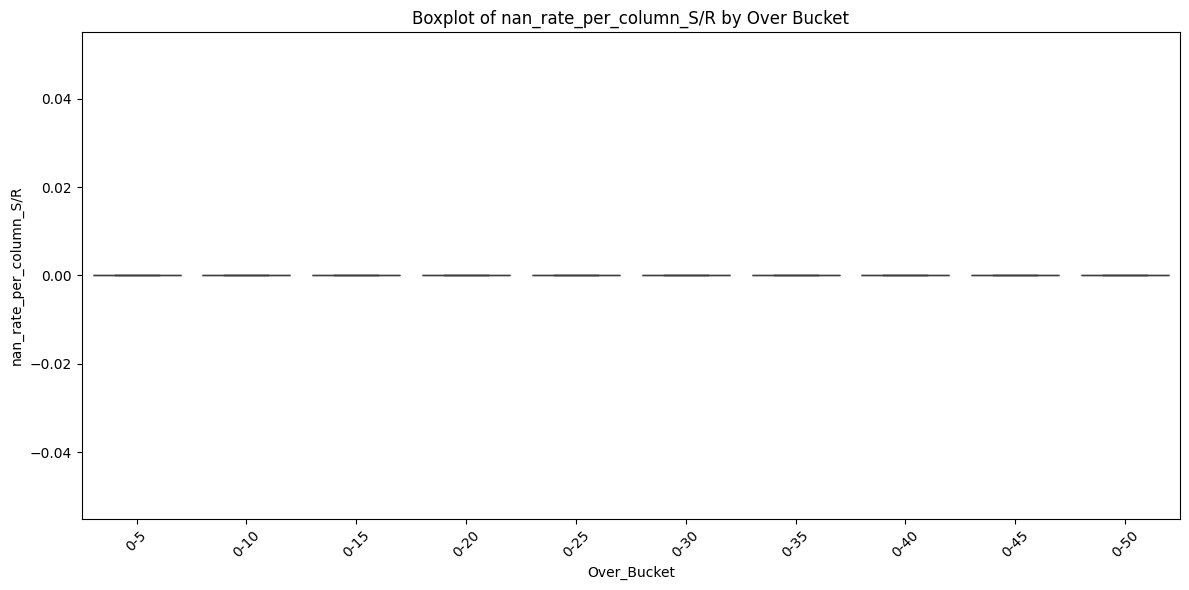

<Figure size 640x480 with 0 Axes>

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume grouped_q1 and grouped_q3 are already loaded in the environment
# We concatenate them first (with a column indicating quantile)
grouped_q1['Quantile'] = 'Q1'
grouped_q3['Quantile'] = 'Q3'
combined = pd.concat([grouped_q1, grouped_q3])

# Convert Over_Bucket to a categorical type to preserve ordering in plots
sorted_buckets = sorted(combined['Over_Bucket'].unique(), key=lambda x: int(str(x).split('-')[1]))


combined['Over_Bucket'] = pd.Categorical(combined['Over_Bucket'], ordered=True, categories=sorted_buckets)

# Plot 1: Boxplot for row_error by Over_Bucket
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined, x='Over_Bucket', y='row_error')
plt.title('Boxplot of Row Error Rate by Over Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Boxplots for other numeric columns (excluding Over_Bucket, row_error, etc.)
exclude_cols = ['Over_Bucket', 'Last_Over', 'Overs', 'row_error', 'Quantile']
numeric_cols = [col for col in combined.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(combined[col])]

# Generate a grid of boxplots
num_cols = len(numeric_cols)
#fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(18, 5 * ((num_cols + 2) // 3)))
#axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    #if col.startswith('percentage') or col.startswith('error'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined, x='Over_Bucket', y=col)
    plt.title(f'Boxplot of {col} by Over Bucket')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plt.tight_layout()
plt.show()


In [379]:
pd.read_csv('data_commentaries/odi/ground_truth_tables/Ball by Ball Commentary & Live Score - CAN vs NZ, 30th Match, Group A_bowler_scorecard_50.csv')

,bowler,Balls,Runs_Given,Wickets,Overs,Maidens
0,Franklin,24,31.0,0,4.0,0
1,McCullum,48,56.0,1,8.0,0
2,Mills,16,2.0,2,2.4,1
3,Oram,60,47.0,3,10.0,1
4,Ryder,8,15.0,1,1.2,0
5,Southee,60,36.0,1,10.0,1
6,Styris,60,41.0,0,10.0,0
7,Williamson,24,26.0,0,4.0,0


In [380]:
df.iloc[1206]['batsman_gnd_truth']

'data_commentaries/odi/ground_truth_tables/Ball by Ball Commentary & Live Score - AUS vs KENYA, 31st Match, Group A_batsman_scorecard_50.csv'

In [381]:
df_combined_ana = pd.concat([df[['bowler_gnd_truth','Last_Over','Overs']], error_flat], axis=1)


In [382]:
df_combined_ana[(df_combined_ana['Overs']==50)&(df_combined_ana['rmse_per_column_Runs']>1)]

,bowler_gnd_truth,Last_Over,Overs,rmse_per_column_Runs,rmse_per_column_Balls_Faced,rmse_per_column_Fours,rmse_per_column_Sixes,rmse_per_column_S/R,percentage_error_Runs,percentage_error_Balls_Faced,...,nan_rate_per_column_Runs,nan_rate_per_column_Balls_Faced,nan_rate_per_column_Fours,nan_rate_per_column_Sixes,nan_rate_per_column_S/R,row_error_not_out,row_error_out,missing_players_in_pred,extra_players_in_pred,matched_df
39,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,4.522670,3.931227,0.301511,0.301511,5.282479,3.731343,11.839323,...,0.0,0.0,0.0,0.0,0.0,0.60,0.000000,"[Younis, Amir, Afridi]","[Shahid Afridi, Younis Khan, Mohammad Amir]",batsman_gt batsman_pred Runs_gt ...
125,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,5.345225,3.722518,1.133893,1.133893,8.173866,5.488682,3.205990,...,0.0,0.0,0.0,0.0,0.0,0.60,0.160000,[],[N. McCullum],batsman_gt batsman_pred Runs_gt Balls_Fac...
135,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,1.566699,2.132007,0.000000,0.000000,0.888246,11.980920,9.440559,...,0.0,0.0,0.0,0.0,0.0,0.50,0.044444,[],[],batsman_gt batsman_pred Runs_gt Balls_F...
155,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,6.800735,14.577380,1.172604,1.000000,39.669299,14.857143,13.647643,...,0.0,0.0,0.0,0.0,0.0,0.60,0.200000,[],[N. McCullum],batsman_gt batsman_pred Runs_gt Balls_Face...
192,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,11.313708,5.303301,2.121320,0.000000,14.074960,8.163265,6.944444,...,0.0,0.0,0.0,0.0,0.0,0.40,0.000000,"[Mitchell, Santner, Williamson, Ravindra, Phil...","[Daryl Mitchell, Kane Williamson, Mitchell San...",batsman_gt batsman_pred Runs_...
202,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,1.457738,7.106335,0.707107,0.000000,27.113566,2.289377,11.111111,...,0.0,0.0,0.0,0.0,0.0,0.70,0.000000,[],[],batsman_gt batsman_pred Runs_gt Ba...
240,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,6.324555,9.486833,0.316228,1.581139,0.003162,2.857143,2.857143,...,0.0,0.0,0.0,0.0,0.0,0.60,0.022222,"[Baidwan, Patel, Surkari, Chohan, Bagai, Cheem...","[Zubin Surkari, Khurram Chohan, Harvir Baidwan...",batsman_gt batsman_pred Runs_gt Ba...
370,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,1.054093,0.471405,0.333333,0.000000,3.628443,2.493261,11.388889,...,0.0,0.0,0.0,0.0,0.0,0.50,0.057143,[Michael Bracewell],[Bracewell],batsman_gt batsman_pred Runs_gt Ba...
453,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,1.333333,1.000000,0.333333,0.333333,5.900003,2.116402,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.80,0.025000,[Rashid],[],batsman_gt batsman_pred Runs_gt Balls_Fa...
463,data_commentaries/odi/ground_truth_tables/Ball...,1,50.0,4.612237,2.576114,0.426401,0.000000,24.778846,19.375000,6.858054,...,0.0,0.0,0.0,0.0,0.0,0.40,0.088889,[],[],batsman_gt batsman_pred Runs_gt Balls_Fac...
